# $\Delta$P

In [1]:
%reset -f 
import ROOT, numpy

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

#rdf = ROOT.RDataFrame("h22","/lustre19/expphy/volatile/clas12/trotta/data/outbending/data_ePipPimX/skim4_005*")
rdf = ROOT.RDataFrame("h22","/lustre19/expphy/volatile/clas12/trotta/wagon/RhoWagon/PyAnalysis/data/outb/epPipPim.outb.qa.nSidis_005*")#.Range(0,5000000)




rdf = rdf.Define("vals","""
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pip = ROOT::Math::PxPyPzMVector(pipx,pipy,pipz,0.1395);
auto pim = ROOT::Math::PxPyPzMVector(pimx,pimy,pimz,0.1395);
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);

    
double elePh = ele.Phi()*TMath::RadToDeg();
/*if(esec >1 && ele.Phi() <0){
    elePh = ele.Phi()*TMath::RadToDeg()+360-(esec-1)*60;
} else {
    elePh = ele.Phi()*TMath::RadToDeg()-(esec-1)*60;
}*/


if(((esec == 4 || esec == 3) && elePh < 0) || (esec > 4 && elePh < 90)){
          elePh = ele.Phi()*TMath::RadToDeg()+360;
    }


    elePh = elePh- (esec - 1)*60;


   
auto elePhi = elePh-30/ele.P();

 double xx[] = {
0.0219879, 0.00406117, 0.000287491, 0.0244179, 0.0169383, 0.000121762,
0.0209204, -0.000675913, -0.00874854, 0.025209, 0.0113607, -0.0104661,
0.0211029, 0.00524283, 0.0116993, 0.0242328, 0.00706621, -0.0185997,
0.0240847, 0.0054933, 0.00358604, 0.0264154, 0.0111607, -0.00691424,
0.0243936, -1.30348e-06, -0.0157793, 0.0222698, 0.0123583, -0.00728148,
0.0224922, 0.0200913, 0.0337443, 0.0262862, 0.0170036, -0.00152548
};

  double pars[6][2][3];
  int ipar=0;
  for(int isec=0;isec<6;isec++)
  for(int ivec=0;ivec<2;ivec++) {
      if (ivec==0) {
      double dp1=xx[ipar++], dp5=xx[ipar++], dp9=xx[ipar++];

      pars[isec][ivec][0] = (dp1 - 2*dp5 + dp9)/32.;
      pars[isec][ivec][1] = (-7*dp1)/16. + (5*dp5)/8. - (3*dp9)/16.;
      pars[isec][ivec][2] = (45*dp1)/32. - (9*dp5)/16. + (5*dp9)/32.;
    } else {
      double dp1=xx[ipar++], dp2=xx[ipar++], dp4=xx[ipar++];

      double a = (dp4 - 3*dp2 + 2*dp1) / 6.0;
      double b = dp2 - dp1 - 3*a;
      double c = dp1 - a -b;

      pars[isec][ivec][0] = a;
      pars[isec][ivec][1] = b;
      pars[isec][ivec][2] = c;
    }
  }


    double pp = sqrt(ex*ex + ey*ey + ez*ez);
    auto sec = (int) esec;

    int ivec = 0==1 ? 1 : 0;
    double a=pars[sec-1][ivec][0],
           b=pars[sec-1][ivec][1],
           c=pars[sec-1][ivec][2];

    double dpEle = a*pp*pp + b*pp + c;
                

                if(sec == 1){
                    dpEle = ((-7.68e-06)*elePhi*elePhi + (4.636e-05)*elePhi + (4.7165e-04))*pp*pp + ((1.2086e-04)*elePhi*elePhi + (2.09591e-05)*elePhi + (-0.01582))*pp + ((-4.1002e-04)*elePhi*elePhi + (1.7298e-04)*elePhi + (0.10544));
                    dpEle = dpEle + ((7.51e-06)*elePhi*elePhi + (6.45e-06)*elePhi + (-0.00152778))*pp*pp + ((-0.00011089)*elePhi*elePhi + (-0.00017683)*elePhi + (0.02131197))*pp + ((0.00037962)*elePhi*elePhi + (0.00060197)*elePhi + (-0.06886547));

                }

                if(sec == 2){
                    dpEle = ((-2.69e-06)*elePhi*elePhi + (9.252e-05)*elePhi + (5.1693e-04))*pp*pp + ((3.016e-05)*elePhi*elePhi + (-6.0141e-04)*elePhi + (-0.0146))*pp + ((-6.09e-05)*elePhi*elePhi + (1.604e-03)*elePhi + (0.09208));
                    dpEle = dpEle + ((1.24e-06)*elePhi*elePhi + (-4.735e-05)*elePhi + (-0.00150312))*pp*pp + ((-2.097e-05)*elePhi*elePhi + (0.00049518)*elePhi + (0.01920915))*pp + ((7.474e-05)*elePhi*elePhi + (-0.00132086)*elePhi + (-0.05686766));

                }

                if(sec == 3){
                    dpEle = ((-1.045e-05)*elePhi*elePhi + (-6.491e-05)*elePhi + (1.1362e-03))*pp*pp + ((1.2512e-04)*elePhi*elePhi + (5.3421e-04)*elePhi + (-0.0174))*pp + ((-3.0891e-04)*elePhi*elePhi + (-1.5332e-03)*elePhi + (0.09389));
                    dpEle = dpEle + ((6.94e-06)*elePhi*elePhi + (4.271e-05)*elePhi + (-0.00182765))*pp*pp + ((-8.322e-05)*elePhi*elePhi + (-0.00042238)*elePhi + (0.01994986))*pp + ((0.00021956)*elePhi*elePhi + (0.00103844)*elePhi + (-0.04956505));

                }

                if(sec == 4){
                    dpEle = ((-7.37e-06)*elePhi*elePhi + (-8.13e-06)*elePhi + (9.2425e-04))*pp*pp + ((1.1312e-04)*elePhi*elePhi + (-5.24444e-05)*elePhi + (-0.022944))*pp + ((-3.518e-04)*elePhi*elePhi + (3.1893e-04)*elePhi + (0.1323));
                    dpEle = dpEle + ((8.74e-06)*elePhi*elePhi + (-1.617e-05)*elePhi + (-0.00173764))*pp*pp + ((-0.00011774)*elePhi*elePhi + (0.00024329)*elePhi + (0.02310896))*pp + ((0.00036368)*elePhi*elePhi + (-0.00076238)*elePhi + (-0.07050779));

                }

                if(sec == 5){
                    dpEle = ((-8.17e-06)*elePhi*elePhi + (-1.681e-05)*elePhi + (7.8066e-04))*pp*pp + ((1.4176e-04)*elePhi*elePhi + (4.1096e-04)*elePhi + (-0.026944))*pp + ((-4.4153e-04)*elePhi*elePhi + (-1.3535e-03)*elePhi + (0.1486));
                    dpEle = dpEle + ((7.69e-06)*elePhi*elePhi + (1.774e-05)*elePhi + (-1.57552e-03))*pp*pp + ((-1.0778e-04)*elePhi*elePhi + (-2.6133e-04)*elePhi + (0.02076174))*pp + ((3.196e-04)*elePhi*elePhi + (8.8134e-04)*elePhi + (-0.06204126));

                }

                if(sec == 6){
                    dpEle = ((1.63e-06)*elePhi*elePhi + (6.251e-05)*elePhi + (-2.2457e-04))*pp*pp + ((8.18e-06)*elePhi*elePhi + (-6.688e-04)*elePhi + (4.2875e-04))*pp + ((-2.172e-05)*elePhi*elePhi + (1.5467e-03)*elePhi + (0.05676));
                    dpEle = dpEle + ((1.34e-06)*elePhi*elePhi + (-1.574e-05)*elePhi + (-0.00133653))*pp*pp + ((-1.991e-05)*elePhi*elePhi + (0.00024404)*elePhi + (0.01428837))*pp + ((5.149e-05)*elePhi*elePhi + (-0.0007992)*elePhi + (-0.03467815));

                }

            



    
double pipPh = pip.Phi()*TMath::RadToDeg();

auto pppip = pip.P();
 
 
   if(((pipsec == 4 || pipsec == 3) && pipPh < 0) || (pipsec > 4 && pipPh < 90)){
          pipPh = pip.Phi()*TMath::RadToDeg()+360;
    }


    pipPh = pipPh- (pipsec - 1)*60;
 

auto pipphi = pipPh + (32/(pip.P()-0.05));
double dppip;


            if(pipsec == 1){
                    dppip = ((5.7e-07)*pipphi*pipphi + (-2.531e-05)*pipphi + (3.2253e-04))*pppip*pppip + ((2.12e-06)*pipphi*pipphi + (-3.6741e-04)*pipphi + (-0.01378))*pppip + ((-1.215e-05)*pipphi*pipphi + (4.275e-04)*pipphi + (0.04561));
                    dppip = dppip + ((-2.12e-06)*pipphi*pipphi + (3.185e-05)*pipphi + (0.00178389))*pppip*pppip + ((1.262e-05)*pipphi*pipphi + (-0.00012324)*pipphi + (-0.01494883))*pppip + ((-1.422e-05)*pipphi*pipphi + (0.00021045)*pipphi + (0.02590949));

                }

                if(pipsec == 2){
                    dppip = ((-4e-08)*pipphi*pipphi + (-9.836e-05)*pipphi + (3.142e-04))*pppip*pppip + ((8.6e-07)*pipphi*pipphi + (4.6073e-04)*pipphi + (-0.0136))*pppip + ((8.09e-06)*pipphi*pipphi + (-6.0253e-04)*pipphi + (0.03594));
                    dppip = dppip + ((-9.8e-07)*pipphi*pipphi + (3.974e-05)*pipphi + (0.00159441))*pppip*pppip + ((6.61e-06)*pipphi*pipphi + (-0.00023934)*pipphi + (-0.01295355))*pppip + ((-1.087e-05)*pipphi*pipphi + (0.00027704)*pipphi + (0.02013232));

                }

                if(pipsec == 3){
                    dppip = ((-1.37e-06)*pipphi*pipphi + (3.759e-05)*pipphi + (7.4895e-04))*pppip*pppip + ((8.45e-06)*pipphi*pipphi + (1.464e-04)*pipphi + (-0.01952))*pppip + ((-1.41e-06)*pipphi*pipphi + (-3.5781e-04)*pipphi + (0.0353));
                    dppip = dppip + ((-3.2e-07)*pipphi*pipphi + (-2.98e-06)*pipphi + (0.00144252))*pppip*pppip + ((2.9e-06)*pipphi*pipphi + (-5.719e-05)*pipphi + (-0.01197579))*pppip + ((-5.74e-06)*pipphi*pipphi + (0.00024614)*pipphi + (0.02228774));

                }

                if(pipsec == 4){
                    dppip = ((2.7e-06)*pipphi*pipphi + (5.028e-05)*pipphi + (9.007e-04))*pppip*pppip + ((-1.548e-05)*pipphi*pipphi + (-6.141e-05)*pipphi + (-0.0151))*pppip + ((2.063e-05)*pipphi*pipphi + (1.7882e-04)*pipphi + (0.03522));
                    dppip = dppip + ((-8.2e-07)*pipphi*pipphi + (-2.606e-05)*pipphi + (0.00102121))*pppip*pppip + ((6.32e-06)*pipphi*pipphi + (0.00013252)*pipphi + (-0.00898872))*pppip + ((-9.79e-06)*pipphi*pipphi + (-0.00017861)*pipphi + (0.01654247));

                }

                if(pipsec == 5){
                    dppip = ((2.2e-06)*pipphi*pipphi + (-1.554e-05)*pipphi + (5.465e-04))*pppip*pppip + ((-1.06e-05)*pipphi*pipphi + (1.226e-04)*pipphi + (-0.01651))*pppip + ((1.039e-05)*pipphi*pipphi + (-2.062e-04)*pipphi + (0.0436));
                    dppip = dppip + ((-5.8e-07)*pipphi*pipphi + (-1.4e-07)*pipphi + (0.00129068))*pppip*pppip + ((5.43e-06)*pipphi*pipphi + (-2.262e-05)*pipphi + (-0.01076443))*pppip + ((-7.78e-06)*pipphi*pipphi + (0.00010021)*pipphi + (0.01975448));

                }

                if(pipsec == 6){
                    dppip = ((1.11e-06)*pipphi*pipphi + (-1e-08)*pipphi + (6.88e-05))*pppip*pppip + ((-8.86e-06)*pipphi*pipphi + (-5.94e-05)*pipphi + (-0.01133))*pppip + ((1.919e-05)*pipphi*pipphi + (-2.444e-04)*pipphi + (0.03491));
                    dppip = dppip + ((-1.15e-06)*pipphi*pipphi + (6.34e-06)*pipphi + (0.00196799))*pppip*pppip + ((1.196e-05)*pipphi*pipphi + (-0.00010685)*pipphi + (-0.01774286))*pppip + ((-2.573e-05)*pipphi*pipphi + (0.00042626)*pipphi + (0.03688378));

                }


        
    
    



double pimPh = pim.Phi()*TMath::RadToDeg();
 
if(((pimsec == 4 || pimsec == 3) && pimPh < 0) || (pimsec > 4 && pimPh < 90)){
          pimPh = pim.Phi()*TMath::RadToDeg()+360;
    }


    pimPh = pimPh- (pimsec - 1)*60;

auto pimPhi = pimPh - (32/(pim.P()-0.05));


pp = ele.P();
auto fpip = (dppip/pppip) +1;
auto fe = (dpEle/pp)+1;
//auto fpim = (dppim/ppPim) +1;

auto exC = ex*fe;
auto eyC = ey*fe;
auto ezC = ez*fe;

auto pipxC = pipx*fpip;
auto pipyC = pipy*fpip;
auto pipzC = pipz*fpip;

/*auto pimxC = pimx*fpim;
auto pimyC = pimy*fpim;
auto pimzC = pimz*fpim;*/

auto eleC = ROOT::Math::PxPyPzMVector(exC,eyC,ezC,0);
auto pipC = ROOT::Math::PxPyPzMVector(pipxC,pipyC,pipzC,0.13957);
//auto pimC = ROOT::Math::PxPyPzMVector(pimxC,pimyC,pimzC,0.13957);


auto TbeamPim = ROOT::Math::VectorUtil::Angle(beam,pim);
auto TelePim = ROOT::Math::VectorUtil::Angle(eleC,pim);
auto TpipPim = ROOT::Math::VectorUtil::Angle(pipC,pim);
auto TbeamEle = ROOT::Math::VectorUtil::Angle(eleC,beam);
auto TbeamPip = ROOT::Math::VectorUtil::Angle(beam,pipC);
auto TelePip = ROOT::Math::VectorUtil::Angle(eleC,pipC);

auto K = 2*(eleC.E()+pipC.E()-beam.E()-targ.E());
auto Q = 2*(beam.P()*cos(TbeamPim)-eleC.P()*cos(TelePim)-pipC.P()*cos(TpipPim));
auto W1 = (pipC.M()*pipC.M()+pim.M()*pim.M()-2*beam.E()*eleC.E()+2*beam.P()*eleC.P()*cos(TbeamEle)-2*pipC.E()*beam.E()+2*beam.P()*pipC.P()*cos(TbeamPip));
auto W2 = -2*targ.E()*eleC.E()-2*targ.E()*pipC.E()+2*targ.E()*beam.E()+2*eleC.E()*pipC.E()-2*eleC.P()*pipC.P()*cos(TelePip);
auto W = W1+W2;


auto A = Q*Q-K*K;
auto B = 2*Q*W;
auto C = W*W - (pim.M()*pim.M())*(K*K);


auto pimP1 = (-B+sqrt(B*B-4*A*C))/(2*A);
auto pimP2 = (-B-sqrt(B*B-4*A*C))/(2*A);

auto dp = pimP1-pim.P();

if(abs(pimP1 - pim.P()) > abs(pimP2 - pim.P())){
    dp =pimP2 - pim.P();
}

if(abs(pimP1 - pim.P()) < abs(pimP2 - pim.P())){
    dp = pimP1 - pim.P();
    
} 


auto ePipPimX = beam + targ - eleC- pip - pim;
auto ePipPimXC = beam + targ - eleC - pipC - pim;


std::vector<double> vals = {ePipPimXC.M(),pip.P(),pipphi,pim.P(),dp,pimPhi,ePipPimX.M()};
return vals;
""")


rdf = rdf.Define("eppxMC","vals[0]")

rdf = rdf.Define("eppxM","vals[6]")
rdf = rdf.Define("pipP","vals[1]")
rdf = rdf.Define("pipphi","vals[2]")
rdf = rdf.Define("pimP","vals[3]")
rdf = rdf.Define("dp","vals[4]")
rdf = rdf.Define("pimphi","vals[5]")

Welcome to JupyROOT 6.22/06


In [2]:

def fit2d(h2,sec):
    #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(0.5,3,0.5), numpy.arange(3, 4.5, 0.5)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-5,mx+5)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, 0.05) 
       # gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1)) 
        hy.Fit(fy,"QR")
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    fdp = ROOT.TF1("fdp","pol2(0)",0.5,5)
    fdp.SetParameters(0,0,0)
    setattr(h2,"fdp",fdp)
    fdp.SetLineColor(6)
    gr.Fit(fdp, "QR")
    
    
    



rdf = rdf.Filter("vals[0] < 1.1")
#rdf = rdf.Filter("vals[6] < 1.1")
#rdf = rdf.Filter("vals[2] < 40 && vals[5] < 40")

nbins = 200#350
d11 = rdf.Filter("pimsec == 1 && pimphi < -10")
dpp11 = d11.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d12 = rdf.Filter("pimsec == 1 && pimphi > -10 && pimphi < 10")
dpp12 = d12.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d13 = rdf.Filter("pimsec == 1 && pimphi > 10")
dpp13 = d13.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d21 = rdf.Filter("pimsec == 2 && pimphi < -10")
dpp21 = d21.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d22 = rdf.Filter("pimsec == 2 && pimphi > -10 && pimphi < 10")
dpp22 = d22.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d23 = rdf.Filter("pimsec == 2 && pimphi > 10")
dpp23 = d23.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")


d31 = rdf.Filter("pimsec == 3 && pimphi < -10")
dpp31 = d31.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d32 = rdf.Filter("pimsec == 3 && pimphi > -10 && pimphi < 10")
dpp32 = d32.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d33 = rdf.Filter("pimsec == 3 && pimphi > 10")
dpp33 = d33.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d41 = rdf.Filter("pimsec == 4 && pimphi < -10")
dpp41 = d41.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d42 = rdf.Filter("pimsec == 4 && pimphi > -10 && pimphi < 10")
dpp42 = d42.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d43 = rdf.Filter("pimsec == 4 && pimphi > 10")
dpp43 = d43.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d51 = rdf.Filter("pimsec == 5 && pimphi < -10")
dpp51 = d51.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 5 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d52 = rdf.Filter("pimsec == 5 && pimphi > -10 && pimphi < 10")
dpp52 = d52.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d53 = rdf.Filter("pimsec == 5 && pimphi > 10")
dpp53 = d53.Histo2D(("hpth","#DeltaP vs P for #pi- (sec5phi >10);p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d61 = rdf.Filter("pimsec == 6 && pimphi < -10")
dpp61 = d61.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d62 = rdf.Filter("pimsec == 6 && pimphi > -10 && pimphi < 10")
dpp62 = d62.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d63 = rdf.Filter("pimsec == 6 && pimphi > 10")
dpp63 = d63.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")


fit2d(dpp11,1)
fit2d(dpp21,2)
fit2d(dpp31,3)
fit2d(dpp41,4)
fit2d(dpp51,5)
fit2d(dpp61,6)

fit2d(dpp12,1)
fit2d(dpp22,2)
fit2d(dpp32,3)
fit2d(dpp42,4)
fit2d(dpp52,5)
fit2d(dpp62,6)



fit2d(dpp13,1)
fit2d(dpp23,2)
fit2d(dpp33,3)
fit2d(dpp43,4)
fit2d(dpp53,5)
fit2d(dpp63,6)




In [9]:
rdf.Count()
print(rdf.Count().GetValue())

603406


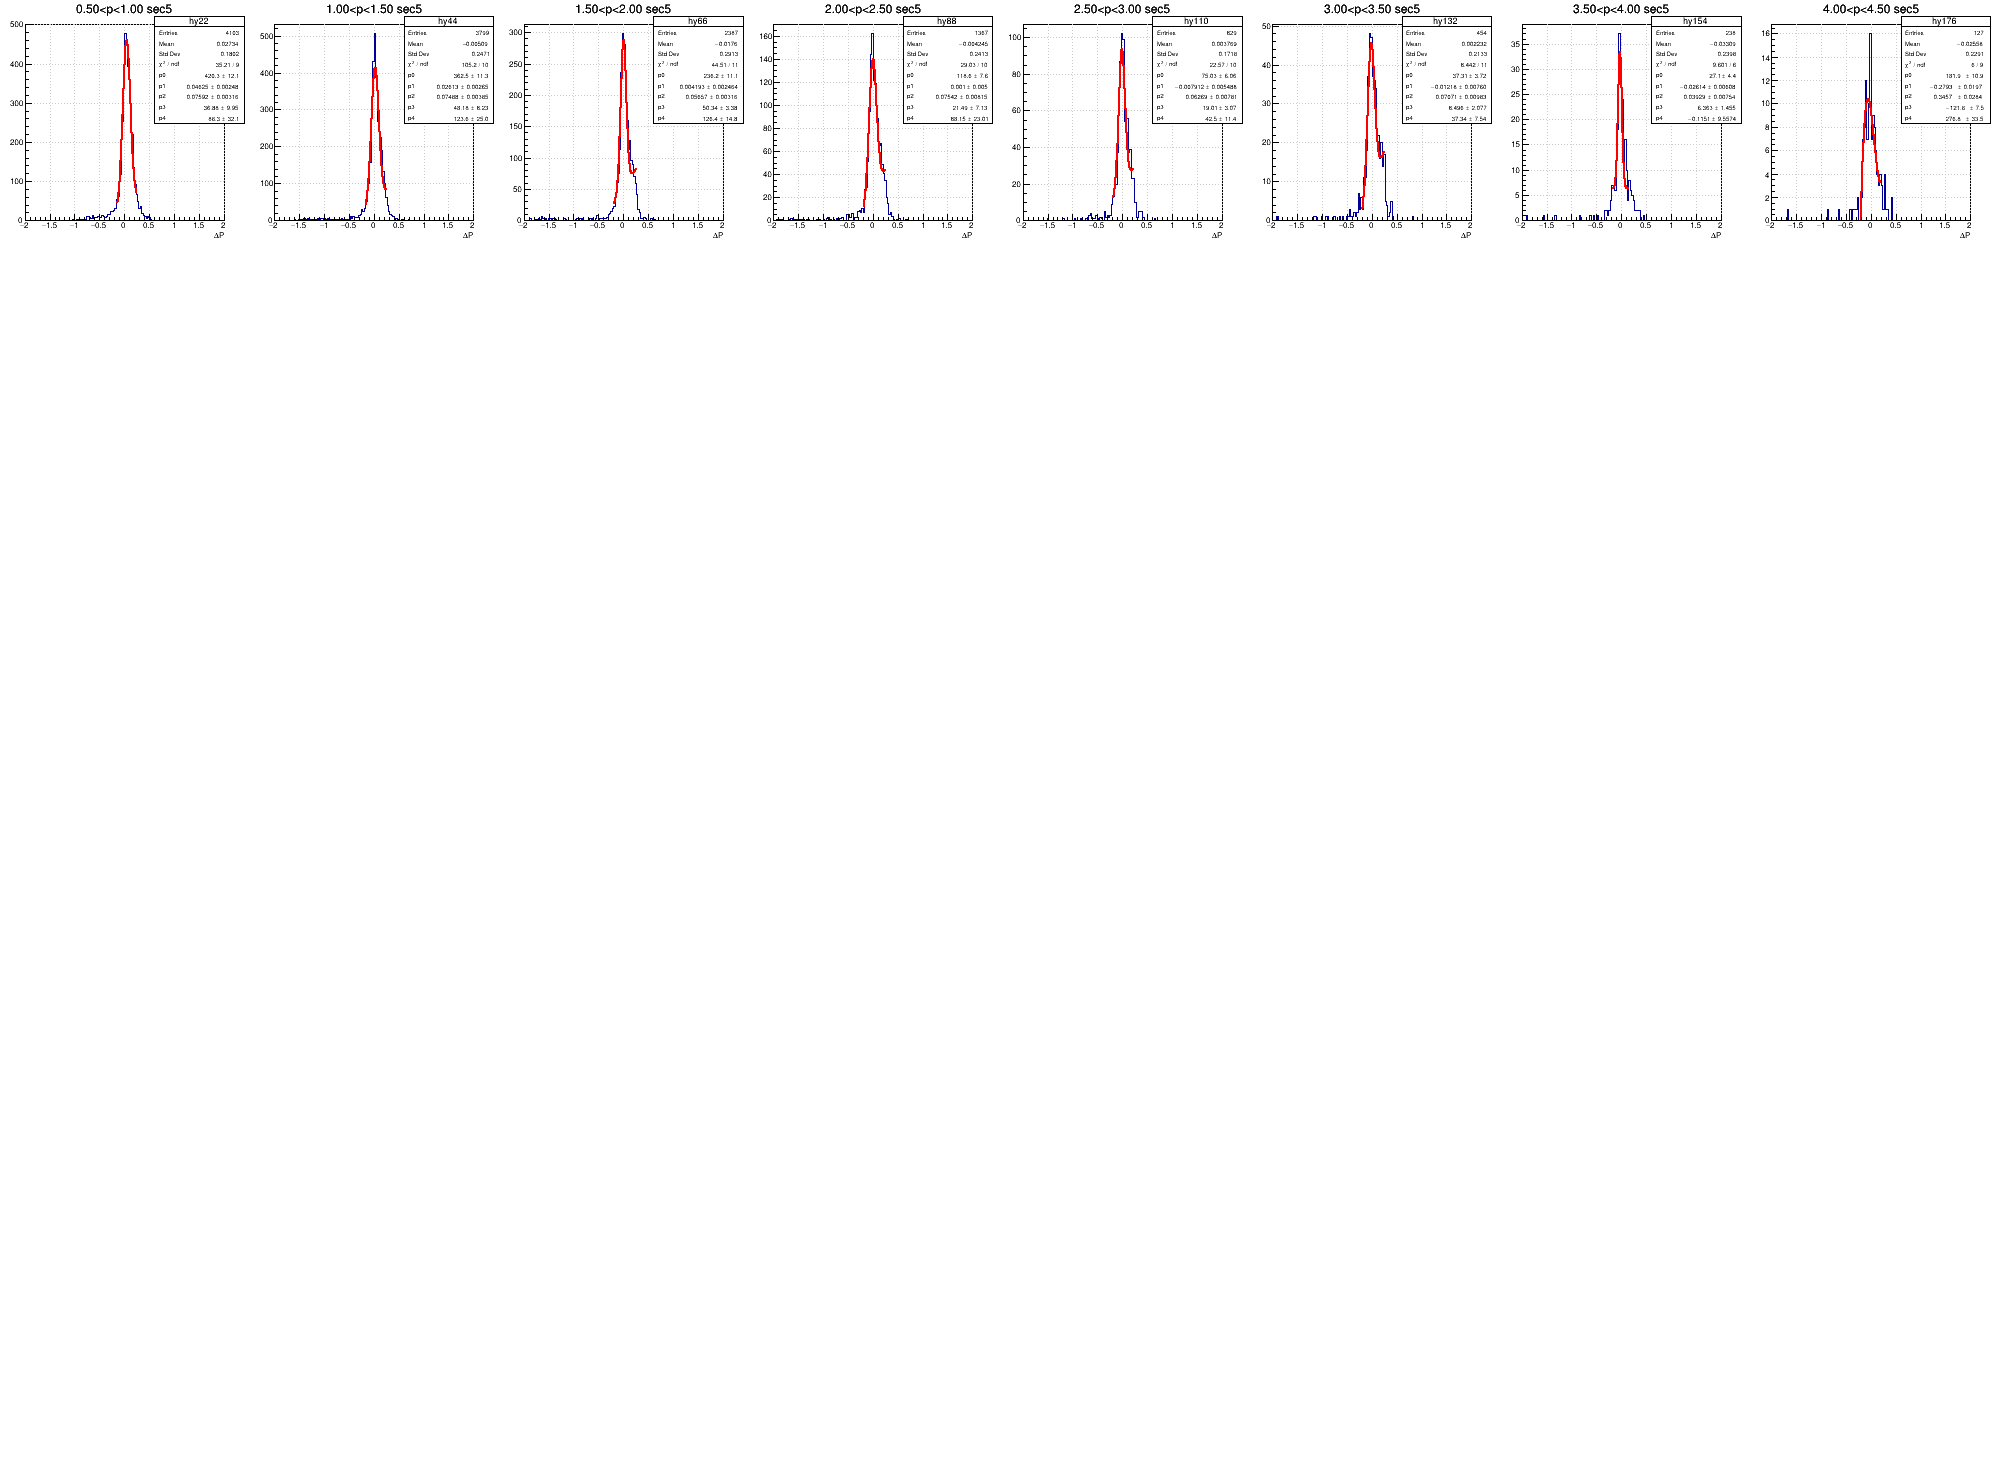

In [15]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(8,6,0.0001,0.0001)
c2.Draw()


#for i in range(5):
#    c2.cd(i+1)
#    #dpp11.hys[i].Rebin(2)
#    dpp11.hys[i].GetXaxis().SetRangeUser(-2,2)
#    dpp11.hys[i].Draw()   
#for i in range(5):
#    c2.cd(i+6)
#    dpp21.hys[i].GetXaxis().SetRangeUser(-2,2)
#    dpp21.hys[i].Draw()   
#for i in range(5):
#    c2.cd(i+11)
#    dpp31.hys[i].GetXaxis().SetRangeUser(-2,2)
#    dpp31.hys[i].Draw()   
#for i in range(5):
#    c2.cd(i+16)
#    dpp41.hys[i].GetXaxis().SetRangeUser(-2,2)
#    dpp41.hys[i].Draw()   
for i in range(8):
    c2.cd(i+1)
    dpp51.hys[i].GetXaxis().SetRangeUser(-2,2)
    dpp51.hys[i].Draw()   
#for i in range(5):
#    c2.cd(i+26)
#    dpp61.hys[i].GetXaxis().SetRangeUser(-2,2)
#    dpp61.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_New.png")

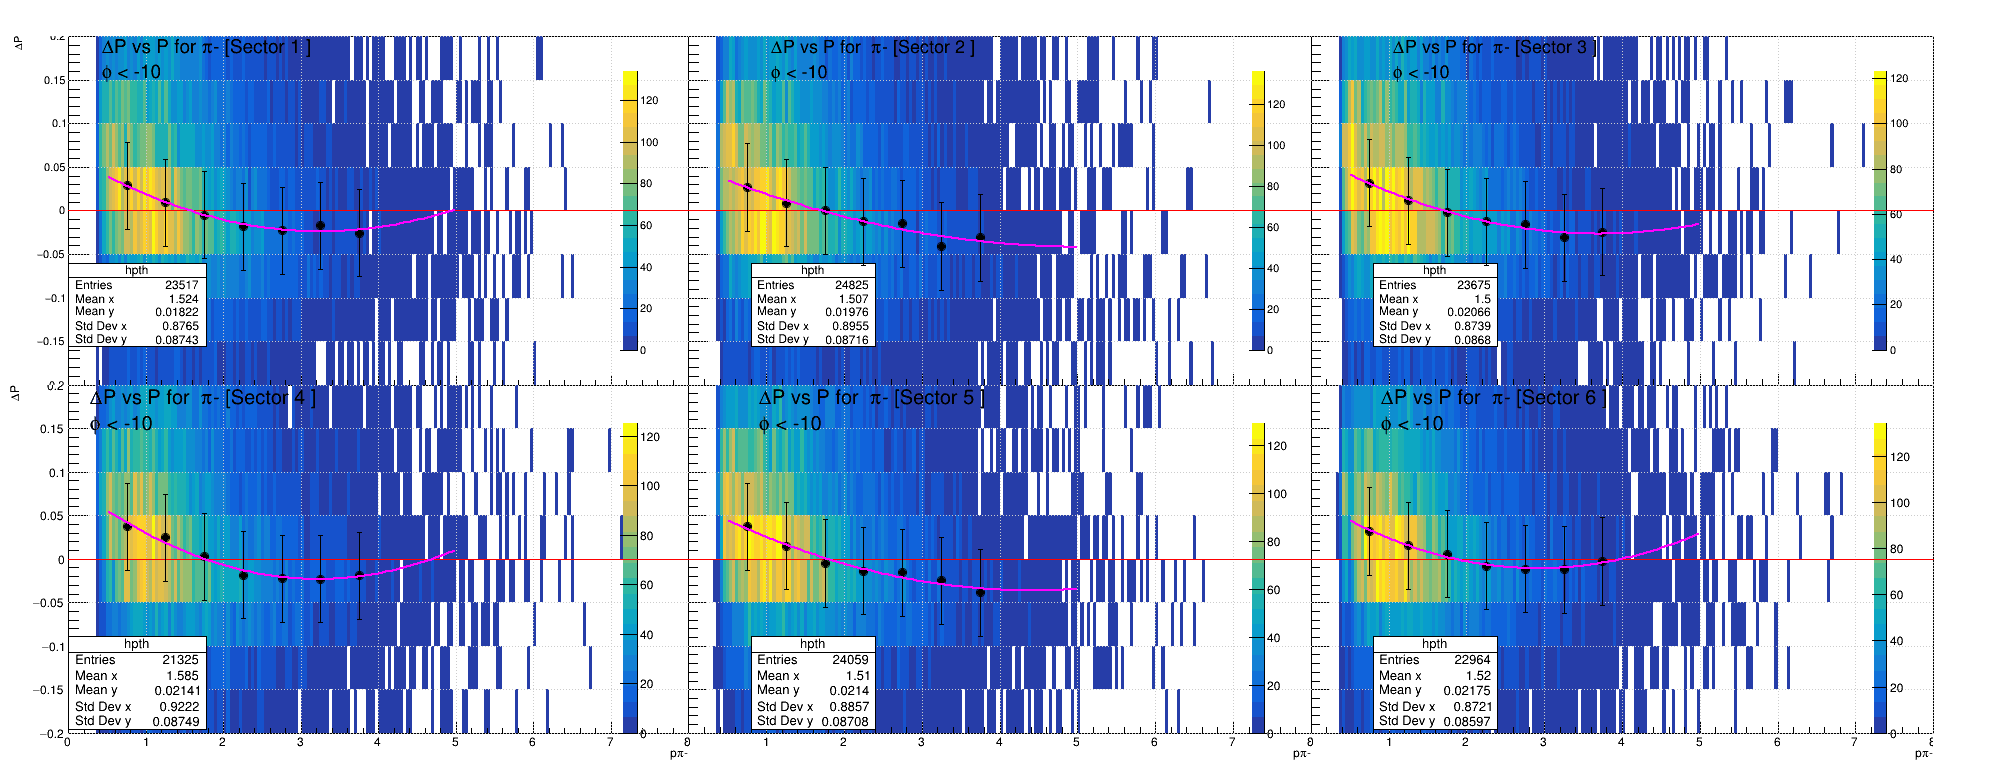

In [4]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
#ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)

ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
c1.Draw()
c1.cd(1)
dpp11.Draw("colz")
dpp11.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp11.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp11.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.cd(2)
dpp21.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp21.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp21.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp21.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp31.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp31.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp31.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp31.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(4)
dpp41.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp41.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp41.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp41.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp51.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp51.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp51.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp51.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(6)
dpp61.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp61.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp61.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp61.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.Print("pics/Cont_phi/phi_dp2d_1.png")

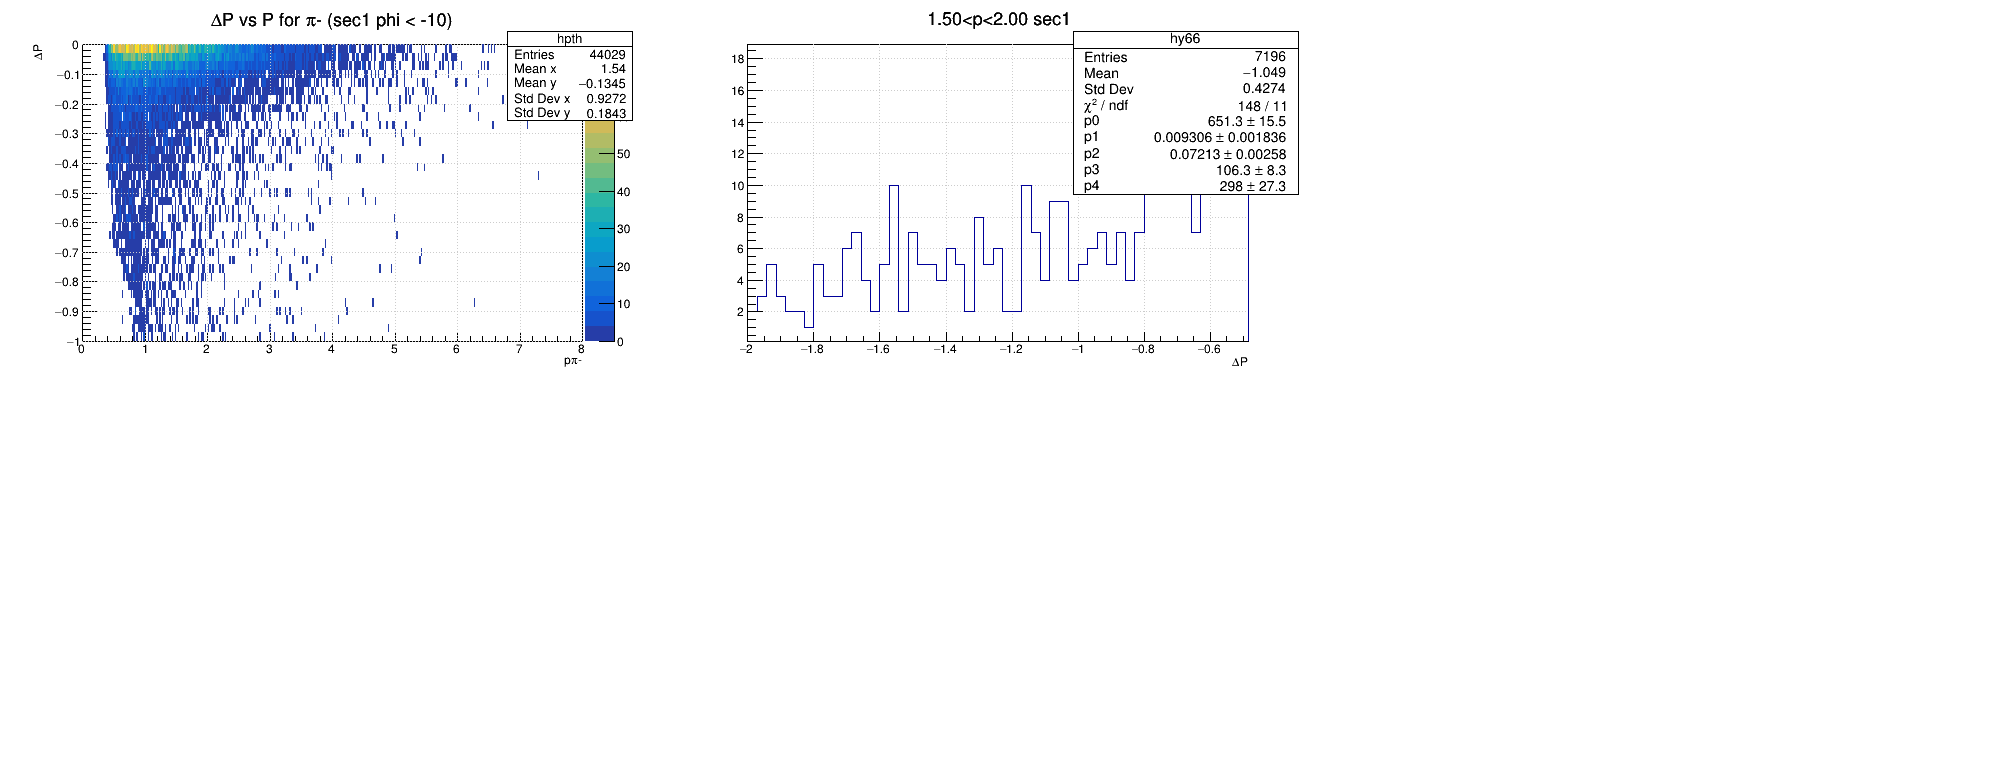

In [8]:
#line =  ROOT.TLine(0, 0, 8, 0)

c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.01,0.01)
c1.Draw()
c1.cd(1)
dpp11.GetYaxis().SetRangeUser(-1,0)
dpp11.Draw("colz")
#dpp11.GetXaxis().SetRangeUser(0,7)
#line.SetLineColor(2)
#line.Draw("")

#test.gr.Draw("P")

c1.cd(2)
dpp11.hys[2].GetXaxis().SetRangeUser(-2,-0.5)
dpp11.hys[2].Draw()   


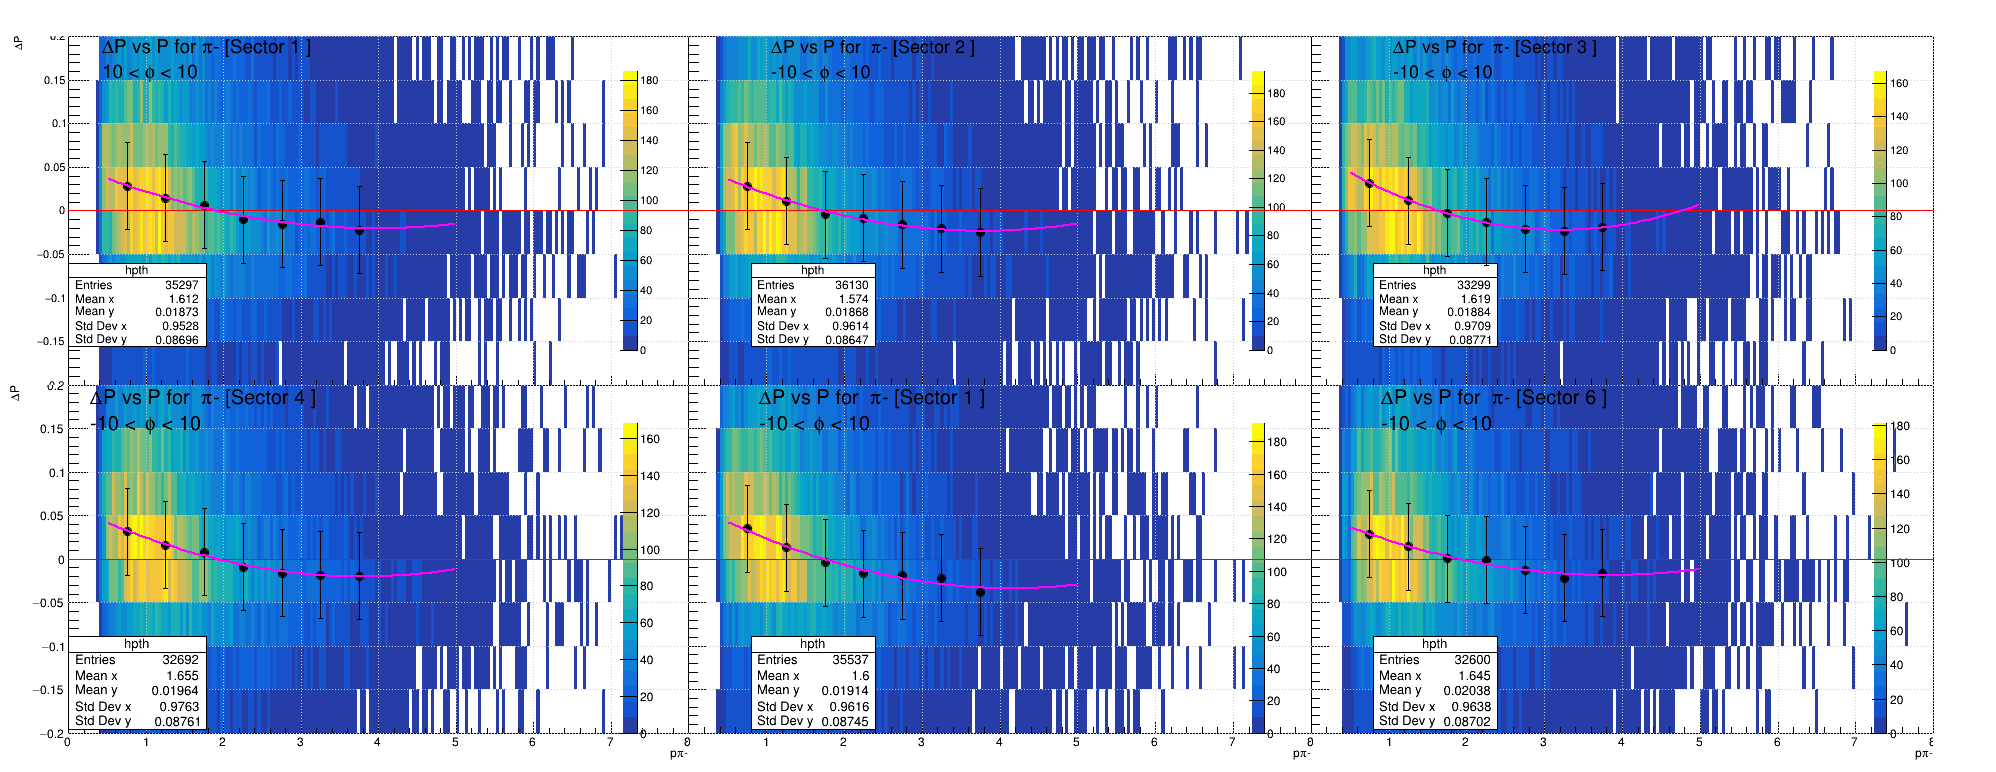

In [7]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)
c1.Draw()
c1.cd(1)
dpp12.Draw("colz")
dpp12.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp12.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp12.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)




c1.cd(2)
dpp22.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp22.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp22.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp22.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp32.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp32.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp32.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp32.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(4)
dpp42.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp42.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp42.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp42.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp52.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp52.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp52.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp52.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(6)
dpp62.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp62.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp62.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp62.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.Print("pics/Cont_phi/phi_dp2d_2.png")


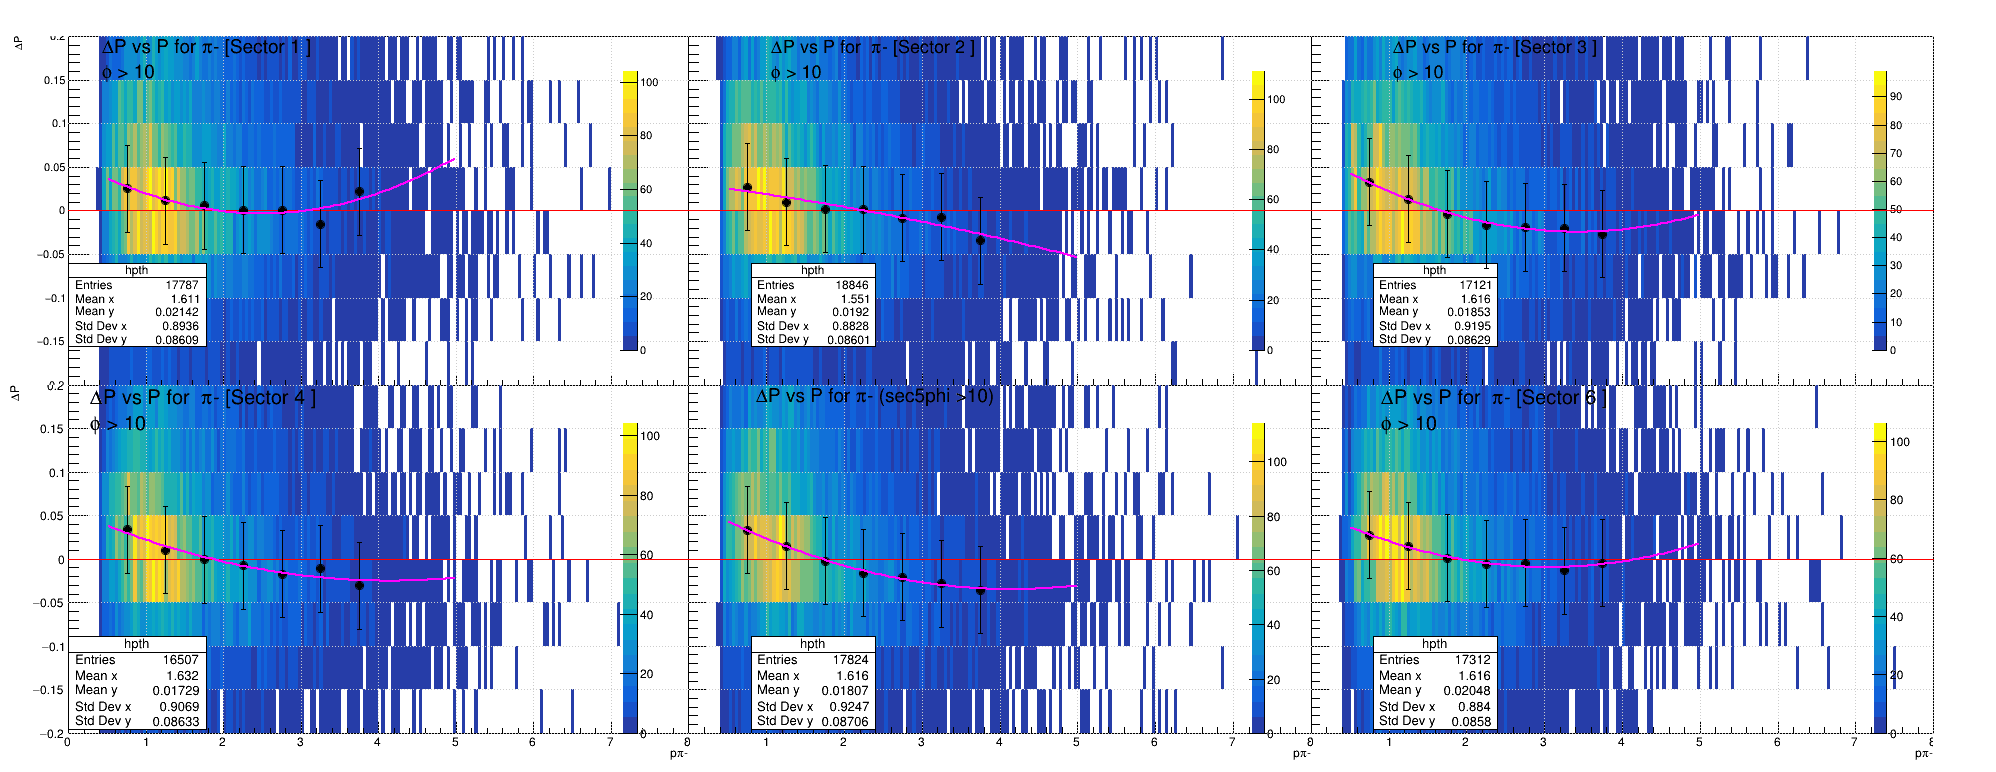

In [9]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)
c1.Draw()
c1.cd(1)
dpp13.Draw("colz")
dpp13.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp13.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp13.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)




c1.cd(2)
dpp23.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp23.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp23.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp23.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp33.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp33.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp33.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp33.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(4)
dpp43.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp43.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp43.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp43.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp53.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp53.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp53.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp53.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(6)
dpp63.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp63.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp63.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp63.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.Print("pics/Cont_phi/phi_dp2d_3.png")



In [15]:
def NewFit(dpphi,y):
    xlims = [-20,0,20]
    temp = 0
    for x1,x2 in zip(xlims[:-1], xlims[1:]):
            temp = temp +1
            dpphi.SetPoint(dpphi11.GetN(), x1/2+x2/2, y[temp])
            #temp.SetPointError(temp.GetN()-1, 0, fy.GetParError(1))  
    fdp = ROOT.TF1("fdp","gaus(0)+pol1(0)",0.5,6)
    #fdp.SetParameters(0,0,0)
    fdp.SetLineColor(6)
    dpphi.Fit(fdp, "S")



In [3]:
print(dpp11.fdp.GetParameter(0))

0.05492209008058602


Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed


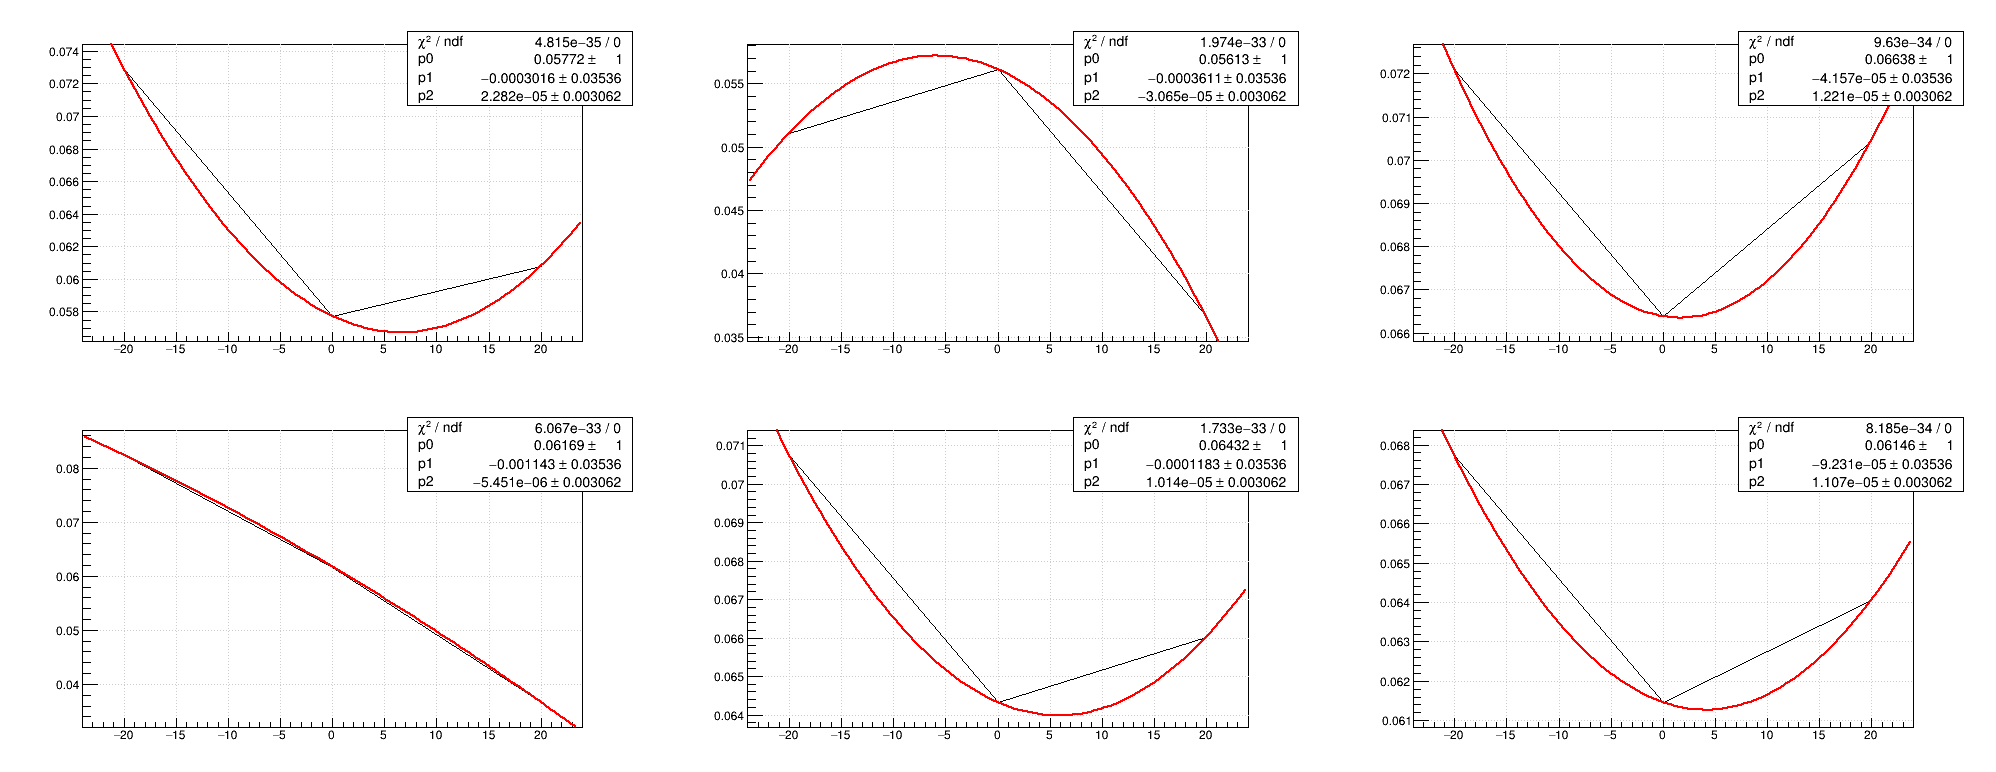

In [15]:
line =  ROOT.TLine(-20, 0, 0, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.01,0.01)
c1.Draw()
c1.cd(1)
xlims = [-20,0,20]
y1 = [dpp11.fdp.GetParameter(0),dpp12.fdp.GetParameter(0),dpp13.fdp.GetParameter(0)]

dpphi11 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi11.SetPoint(dpphi11.GetN(),x,y)
    count = count + 1
    t10 = ROOT.TF1("f1","pol2",-200,200)
    dpphi11.Fit(t10,"QA")#NewFit(dpphi11,y1)
dpphi11.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(2)
xlims = [-20,0,20]
y1 = [dpp21.fdp.GetParameter(0),dpp22.fdp.GetParameter(0),dpp23.fdp.GetParameter(0)]

dpphi21 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi21.SetPoint(dpphi21.GetN(),x,y)
    count = count + 1
    t20 = ROOT.TF1("f1","pol2",-200,200)
    dpphi21.Fit(t20,"QA")#NewFit(dpphi11,y1)
dpphi21.Draw("")
#line.SetLineColor(2)
#line.Draw("")


c1.cd(3)
xlims = [-20,0,20]
y1 = [dpp31.fdp.GetParameter(0),dpp32.fdp.GetParameter(0),dpp33.fdp.GetParameter(0)]

dpphi31 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi31.SetPoint(dpphi31.GetN(),x,y)
    count = count + 1
    t30 = ROOT.TF1("f1","pol2",-200,200)
    dpphi31.Fit(t30,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi31.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(4)
xlims = [-20,0,20]
y1 = [dpp41.fdp.GetParameter(0),dpp42.fdp.GetParameter(0),dpp43.fdp.GetParameter(0)]

dpphi41 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi41.SetPoint(dpphi41.GetN(),x,y)
    count = count + 1
    t40 = ROOT.TF1("f1","pol2",-200,200)
    dpphi41.Fit(t40,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi41.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(5)
xlims = [-20,0,20]
y1 = [dpp51.fdp.GetParameter(0),dpp52.fdp.GetParameter(0),dpp53.fdp.GetParameter(0)]

dpphi51 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi51.SetPoint(dpphi51.GetN(),x,y)
    count = count + 1
    t50 = ROOT.TF1("f1","pol2",-200,200)
    dpphi51.Fit(t50,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi51.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(6)
xlims = [-20,0,20]
y1 = [dpp61.fdp.GetParameter(0),dpp62.fdp.GetParameter(0),dpp63.fdp.GetParameter(0)]

dpphi61 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi61.SetPoint(dpphi61.GetN(),x,y)
    count = count + 1
    t60 = ROOT.TF1("f1","pol2",-200,200)
    dpphi61.Fit(t60,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi61.Draw("")
#line.SetLineColor(2)
#line.Draw("")


(-2.9510E-05*pimPhi*pimPhi + 4.0965E-04*pimPhi + -3.9091E-02)*ppPim + 2.2818E-05*pimPhi*pimPhi + -3.0163E-04*pimPhi + 5.7720E-02
(4.1503E-05*pimPhi*pimPhi + 3.7803E-04*pimPhi + -4.0465E-02)*ppPim  + -3.0650E-05*pimPhi*pimPhi + -3.6109E-04*pimPhi + 5.6128E-02
(-1.5355E-05*pimPhi*pimPhi + 1.1692E-05*pimPhi + -4.8549E-02)*ppPim  + 1.2213E-05*pimPhi*pimPhi + -4.1566E-05*pimPhi + 6.6383E-02
(7.7809E-06*pimPhi*pimPhi + 1.1273E-03*pimPhi + -4.1962E-02)*ppPim  + -5.4515E-06*pimPhi*pimPhi + -1.1430E-03*pimPhi + 6.1686E-02
(-9.8032E-06*pimPhi*pimPhi + 4.9079E-05*pimPhi + -4.3290E-02)*ppPim  + 1.0140E-05*pimPhi*pimPhi + -1.1833E-04*pimPhi + 6.4325E-02
(-1.7214E-05*pimPhi*pimPhi + 5.4390E-05*pimPhi + -4.2698E-02)*ppPim  + 1.1067E-05*pimPhi*pimPhi + -9.2312E-05*pimPhi + 6.1462E-02


Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed


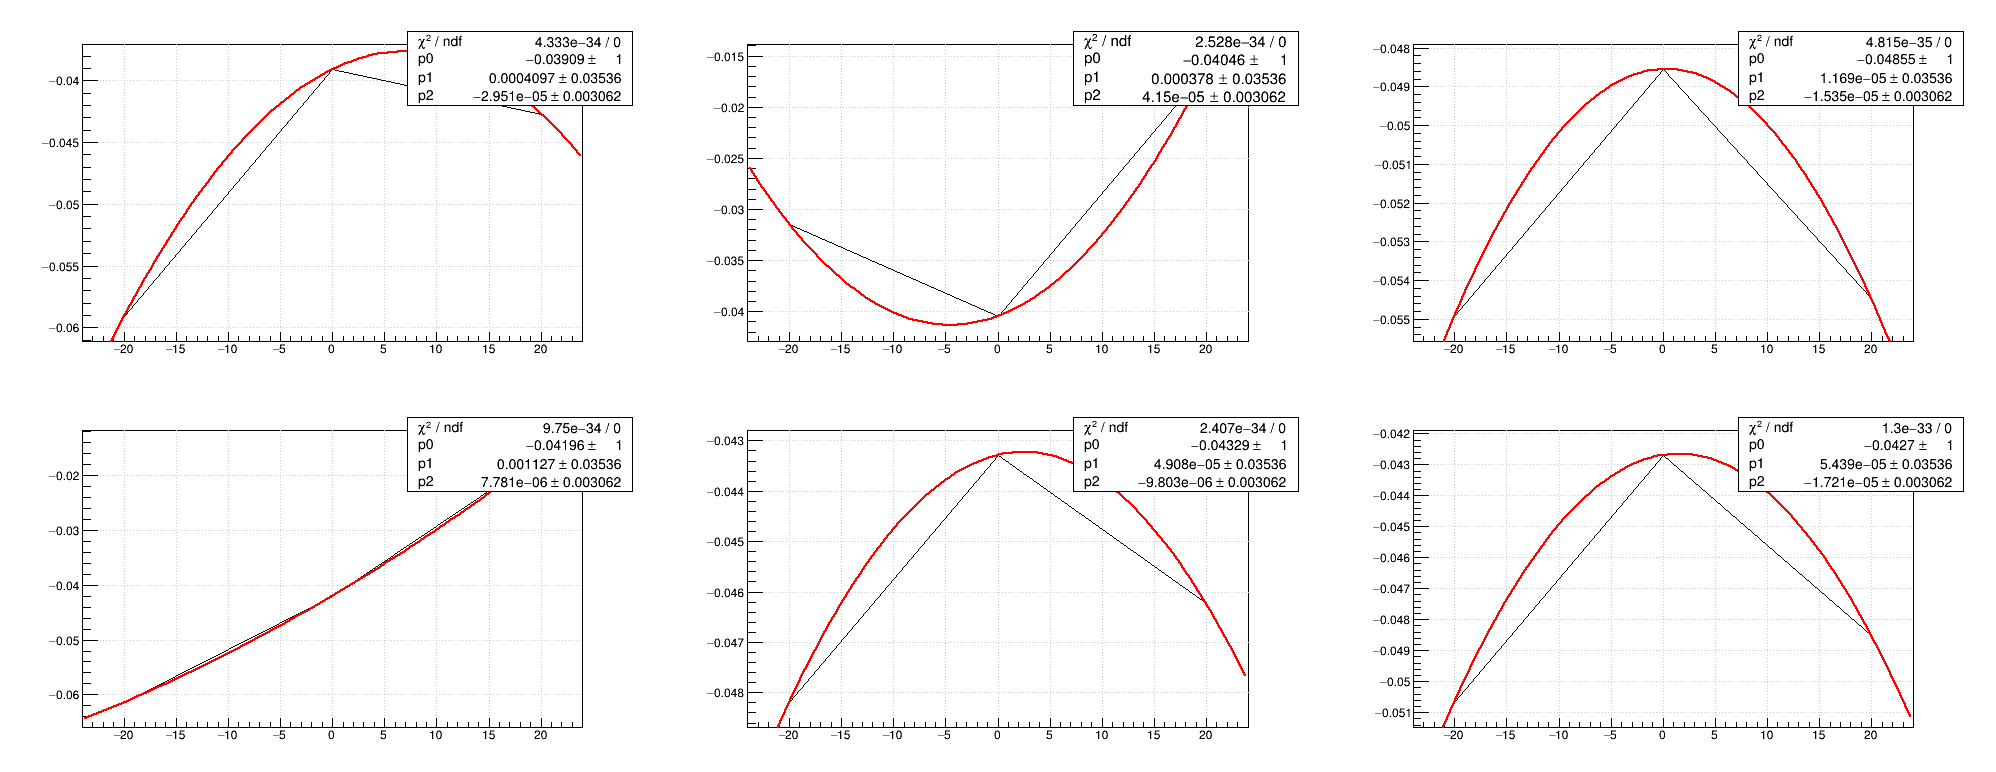

In [16]:
line =  ROOT.TLine(-20, 0, 0, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.01,0.01)
c1.Draw()
c1.cd(1)
xlims = [-20,0,20]
y1 = [dpp11.fdp.GetParameter(1),dpp12.fdp.GetParameter(1),dpp13.fdp.GetParameter(1)]

dpphi11 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi11.SetPoint(dpphi11.GetN(),x,y)
    count = count + 1
    t1 = ROOT.TF1("f1","pol2",-200,200)
    dpphi11.Fit(t1,"QA")
#NewFit(dpphi11,y1)
dpphi11.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(2)
xlims = [-20,0,20]
y1 = [dpp21.fdp.GetParameter(1),dpp22.fdp.GetParameter(1),dpp23.fdp.GetParameter(1)]

dpphi21 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi21.SetPoint(dpphi21.GetN(),x,y)
    count = count + 1
    t2 = ROOT.TF1("f1","pol2",-200,200)
    dpphi21.Fit(t2,"QA")
#NewFit(dpphi11,y1)
dpphi21.Draw("")
#line.SetLineColor(2)
#line.Draw("")


c1.cd(3)
xlims = [-20,0,20]
y1 = [dpp31.fdp.GetParameter(1),dpp32.fdp.GetParameter(1),dpp33.fdp.GetParameter(1)]

dpphi31 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi31.SetPoint(dpphi31.GetN(),x,y)
    count = count + 1
    t3 = ROOT.TF1("f1","pol2",-200,200)
    dpphi31.Fit(t3,"QA")
#NewFit(dpphi11,y1)
dpphi31.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(4)
xlims = [-20,0,20]
y1 = [dpp41.fdp.GetParameter(1),dpp42.fdp.GetParameter(1),dpp43.fdp.GetParameter(1)]

dpphi41 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi41.SetPoint(dpphi41.GetN(),x,y)
    count = count + 1
    t4 = ROOT.TF1("f1","pol2",-200,200)
    dpphi41.Fit(t4,"QA")
#NewFit(dpphi11,y1)
dpphi41.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(5)
xlims = [-20,0,20]
y1 = [dpp51.fdp.GetParameter(1),dpp52.fdp.GetParameter(1),dpp53.fdp.GetParameter(1)]

dpphi51 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi51.SetPoint(dpphi51.GetN(),x,y)
    count = count + 1
    t5 = ROOT.TF1("f1","pol2",-200,200)
    dpphi51.Fit(t5,"QA")
#NewFit(dpphi11,y1)
dpphi51.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(6)
xlims = [-20,0,20]
y1 = [dpp61.fdp.GetParameter(1),dpp62.fdp.GetParameter(1),dpp63.fdp.GetParameter(1)]

dpphi61 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi61.SetPoint(dpphi61.GetN(),x,y)
    count = count + 1
    t6 = ROOT.TF1("f1","pol2",-200,200)
    dpphi61.Fit(t6,"QA")
#NewFit(dpphi11,y1)
dpphi61.Draw("")
#line.SetLineColor(2)
#line.Draw("")

print1 = "("+str(format(t1.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t1.GetParameter(1),".4E") )+ "*pimPhi + " + str(format(t1.GetParameter(0),".4E")) + ")*ppPim + " +str(format(t10.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t10.GetParameter(1),".4E"))+ "*pimPhi + " +str(format(t10.GetParameter(0),".4E"))
print2 = "("+str(format(t2.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t2.GetParameter(1),".4E"))+ "*pimPhi + " + str(format(t2.GetParameter(0),".4E")) + ")*ppPim  + " +str(format(t20.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t20.GetParameter(1),".4E"))+ "*pimPhi + " +str(format(t20.GetParameter(0),".4E"))
print3 = "("+str(format(t3.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t3.GetParameter(1),".4E") )+ "*pimPhi + " + str(format(t3.GetParameter(0),".4E")) + ")*ppPim  + " +str(format(t30.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t30.GetParameter(1),".4E"))+ "*pimPhi + " +str(format(t30.GetParameter(0),".4E"))
print4 = "("+str(format(t4.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t4.GetParameter(1),".4E") )+ "*pimPhi + " + str(format(t4.GetParameter(0),".4E")) + ")*ppPim  + " +str(format(t40.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t40.GetParameter(1),".4E"))+ "*pimPhi + " +str(format(t40.GetParameter(0),".4E"))
print5 = "("+str(format(t5.GetParameter(2),".4E"))+"*pimPhi*pimPhi + " +str(format(t5.GetParameter(1),".4E") )+ "*pimPhi + " + str(format(t5.GetParameter(0),".4E")) + ")*ppPim  + " +str(format(t50.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t50.GetParameter(1),".4E"))+ "*pimPhi + " +str(format(t50.GetParameter(0),".4E"))
print6 = "("+str(format(t6.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t6.GetParameter(1),".4E") )+ "*pimPhi + " + str(format(t6.GetParameter(0),".4E")) + ")*ppPim  + " +str(format(t60.GetParameter(2),".4E"))+"*pimPhi*pimPhi + " +str(format(t60.GetParameter(1),".4E"))+ "*pimPhi + " +str(format(t60.GetParameter(0),".4E"))

print(print1)
print(print2)
print(print3)
print(print4)
print(print5)
print(print6)

(7.0012E-06*pimPhi*pimPhi + -5.1123E-05*pimPhi + 4.9707E-03)*ppPim*ppPim +(-2.9510E-05*pimPhi*pimPhi + 4.0965E-04*pimPhi + -3.9091E-02)*ppPim + 2.2818E-05*pimPhi*pimPhi + -3.0163E-04*pimPhi + 5.7720E-02
(-1.0349E-05*pimPhi*pimPhi + -5.7161E-05*pimPhi + 5.1826E-03)*ppPim*ppPim +(4.1503E-05*pimPhi*pimPhi + 3.7803E-04*pimPhi + -4.0465E-02)*ppPim  + -3.0650E-05*pimPhi*pimPhi + -3.6109E-04*pimPhi + 5.6128E-02
(3.8235E-06*pimPhi*pimPhi + 3.1026E-06*pimPhi + 6.4670E-03)*ppPim*ppPim +(-1.5355E-05*pimPhi*pimPhi + 1.1692E-05*pimPhi + -4.8549E-02)*ppPim  + 1.2213E-05*pimPhi*pimPhi + -4.1566E-05*pimPhi + 6.6383E-02
(-2.6127E-06*pimPhi*pimPhi + -2.1896E-04*pimPhi + 5.3241E-03)*ppPim*ppPim +(7.7809E-06*pimPhi*pimPhi + 1.1273E-03*pimPhi + -4.1962E-02)*ppPim  + -5.4515E-06*pimPhi*pimPhi + -1.1430E-03*pimPhi + 6.1686E-02
(1.3350E-06*pimPhi*pimPhi + -1.1790E-05*pimPhi + 4.4759E-03)*ppPim*ppPim +(-9.8032E-06*pimPhi*pimPhi + 4.9079E-05*pimPhi + -4.3290E-02)*ppPim  + 1.0140E-05*pimPhi*pimPhi + -1.1833E-04*

Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed


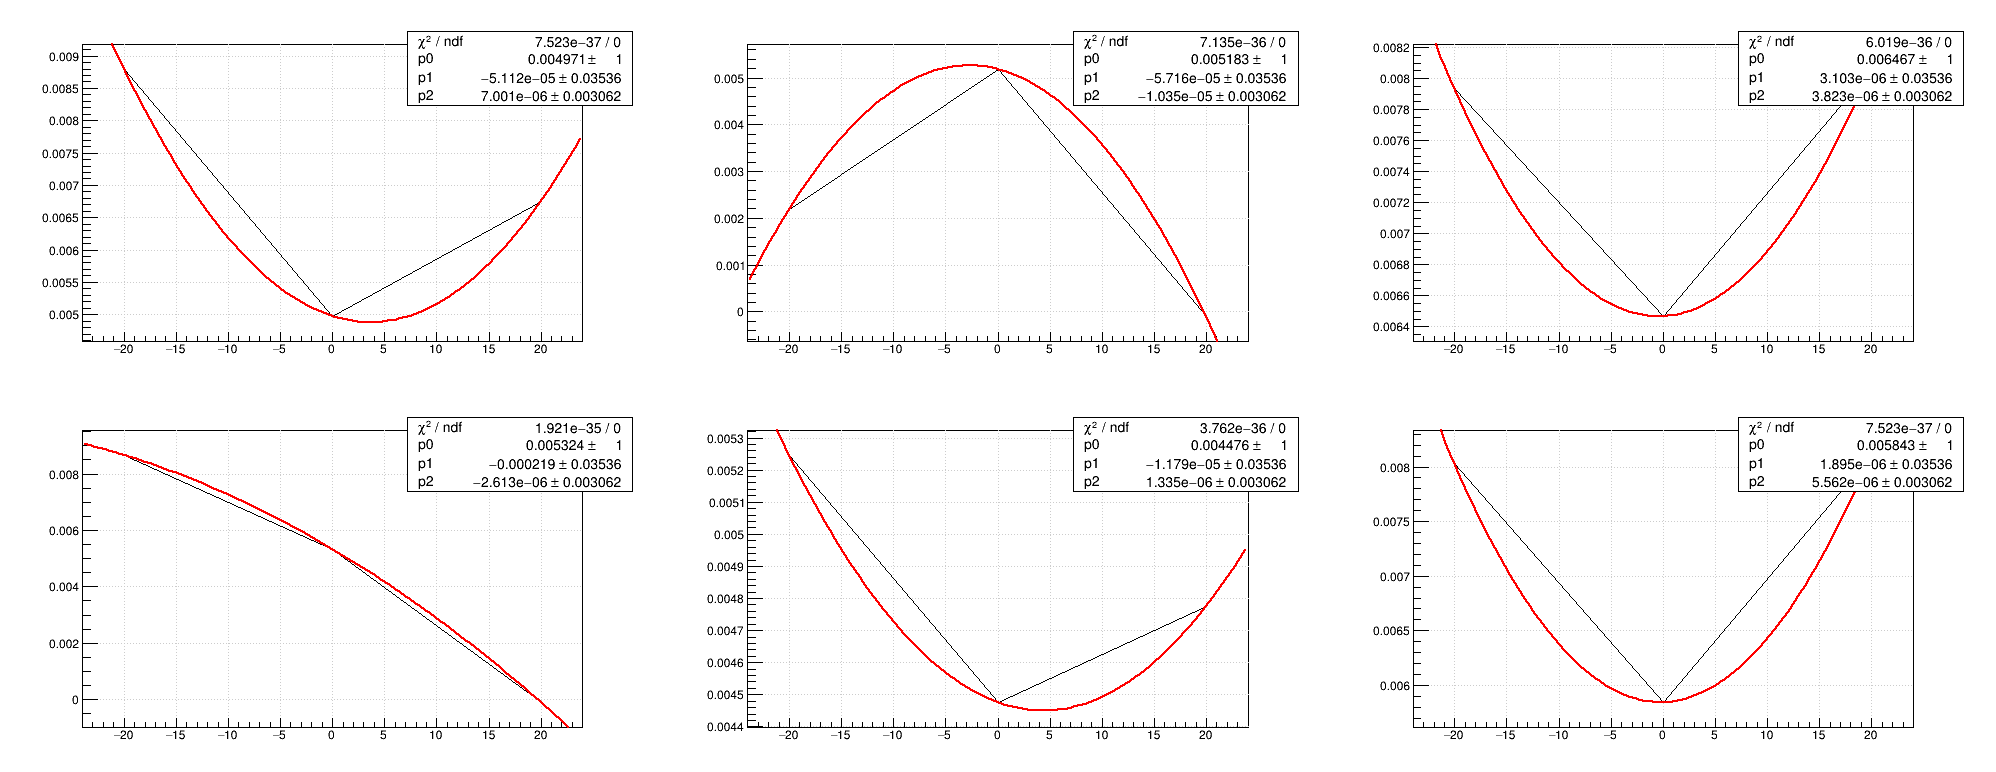

In [17]:
line =  ROOT.TLine(-20, 0, 0, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.01,0.01)
c1.Draw()
c1.cd(1)
xlims = [-20,0,20]
y1 = [dpp11.fdp.GetParameter(2),dpp12.fdp.GetParameter(2),dpp13.fdp.GetParameter(2)]

dpphi11 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi11.SetPoint(dpphi11.GetN(),x,y)
    count = count + 1
    t21 = ROOT.TF1("f1","pol2",-200,200)
    dpphi11.Fit(t21,"QA")
#NewFit(dpphi11,y1)
dpphi11.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(2)
xlims = [-20,0,20]
y1 = [dpp21.fdp.GetParameter(2),dpp22.fdp.GetParameter(2),dpp23.fdp.GetParameter(2)]

dpphi21 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi21.SetPoint(dpphi21.GetN(),x,y)
    count = count + 1
    t22 = ROOT.TF1("f1","pol2",-200,200)
    dpphi21.Fit(t22,"QA")
#NewFit(dpphi11,y1)
dpphi21.Draw("")
#line.SetLineColor(2)
#line.Draw("")


c1.cd(3)
xlims = [-20,0,20]
y1 = [dpp31.fdp.GetParameter(2),dpp32.fdp.GetParameter(2),dpp33.fdp.GetParameter(2)]

dpphi31 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi31.SetPoint(dpphi31.GetN(),x,y)
    count = count + 1
    t23 = ROOT.TF1("f1","pol2",-200,200)
    dpphi31.Fit(t23,"QA")
#NewFit(dpphi11,y1)
dpphi31.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(4)
xlims = [-20,0,20]
y1 = [dpp41.fdp.GetParameter(2),dpp42.fdp.GetParameter(2),dpp43.fdp.GetParameter(2)]

dpphi41 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi41.SetPoint(dpphi41.GetN(),x,y)
    count = count + 1
    t24 = ROOT.TF1("f1","pol2",-200,200)
    dpphi41.Fit(t24,"QA")
#NewFit(dpphi11,y1)
dpphi41.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(5)
xlims = [-20,0,20]
y1 = [dpp51.fdp.GetParameter(2),dpp52.fdp.GetParameter(2),dpp53.fdp.GetParameter(2)]

dpphi51 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi51.SetPoint(dpphi51.GetN(),x,y)
    count = count + 1
    t25 = ROOT.TF1("f1","pol2",-200,200)
    dpphi51.Fit(t25,"QA")
#NewFit(dpphi11,y1)
dpphi51.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(6)
xlims = [-20,0,20]
y1 = [dpp61.fdp.GetParameter(2),dpp62.fdp.GetParameter(2),dpp63.fdp.GetParameter(2)]

dpphi61 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi61.SetPoint(dpphi61.GetN(),x,y)
    count = count + 1
    t26 = ROOT.TF1("f1","pol2",-200,200)
    dpphi61.Fit(t26,"QA")
#NewFit(dpphi11,y1)
dpphi61.Draw("")
#line.SetLineColor(2)
#line.Draw("")

print("("+str(format(t21.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t21.GetParameter(1),".4E") )+ "*pimPhi + " + str(format(t21.GetParameter(0),".4E") ) +")*ppPim*ppPim +" + print1)
print("("+str(format(t22.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t22.GetParameter(1),".4E") )+ "*pimPhi + " + str(format(t22.GetParameter(0),".4E")) +")*ppPim*ppPim +" + print2)
print("("+str(format(t23.GetParameter(2),".4E"))+"*pimPhi*pimPhi + " +str(format(t23.GetParameter(1),".4E")  )+ "*pimPhi + " + str(format(t23.GetParameter(0),".4E")) +")*ppPim*ppPim +" +  print3)
print("("+str(format(t24.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t24.GetParameter(1),".4E")  )+ "*pimPhi + " + str(format(t24.GetParameter(0),".4E")) +")*ppPim*ppPim +" +  print4)
print("("+str(format(t25.GetParameter(2),".4E") )+"*pimPhi*pimPhi + " +str(format(t25.GetParameter(1),".4E")  )+ "*pimPhi + " + str(format(t25.GetParameter(0),".4E")) +")*ppPim*ppPim +" +  print5)
print("("+str(format(t26.GetParameter(2),".4E"))+"*pimPhi*pimPhi + " +str(format(t26.GetParameter(1),".4E")  )+ "*pimPhi + " + str(format(t26.GetParameter(0),".4E")) +")*ppPim*ppPim +" +  print6)



In [17]:



def fit2d2(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 6,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.3,mx+0.3)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)

sec1E1 = rdf.Filter("pipphi < -10 && pipsec == 1")
MMsec1E1 = sec1E1.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec1E2 = rdf.Filter("pipphi > -10 && pipphi < 10 && pipsec == 1")
MMsec1E2 = sec1E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec1E3 = rdf.Filter("pipphi > 10 && pipsec == 1")
MMsec1E3 = sec1E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec2E1 = rdf.Filter("pipphi < -10 && pipsec == 2")
MMsec2E1 = sec2E1.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec2E2 = rdf.Filter("pipphi > -10 && pipphi < 10 && pipsec == 2")
MMsec2E2 = sec2E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec2E3 = rdf.Filter("pipphi > 10 && pipsec == 2")
MMsec2E3 = sec2E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec3E1 = rdf.Filter("pipphi < -10 && pipsec == 3")
MMsec3E1 = sec3E1.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec3E2 = rdf.Filter("pipphi > -10 && pipphi < 10 && pipsec == 3")
MMsec3E2 = sec3E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec3E3 = rdf.Filter("pipphi > 10 && pipsec == 3")
MMsec3E3 = sec3E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec4E1 = rdf.Filter("pipphi < -10 && pipsec == 4")
MMsec4E1 = sec4E1.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec4E2 = rdf.Filter("pipphi > -10 && pipphi < 10 && pipsec == 4")
MMsec4E2 = sec4E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec4E3 = rdf.Filter("pipphi > 10 && pipsec == 4")
MMsec4E3 = sec4E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")


sec5E1 = rdf.Filter("pipphi < -10 && pipsec == 5")
MMsec5E1 = sec5E1.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec5E2 = rdf.Filter("pipphi > -10 && pipphi < 10 && pipsec == 5")
MMsec5E2 = sec5E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec5E3 = rdf.Filter("pipphi > 10 && pipsec == 5")
MMsec5E3 = sec5E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec6E1 = rdf.Filter("pipphi < -10 && pipsec == 6")
MMsec6E1 = sec6E1.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec6E2 = rdf.Filter("pipphi > -10 && pipphi < 10 && pipsec == 6")
MMsec6E2 = sec6E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec6E3 = rdf.Filter("pipphi >10 && pipsec == 6")
MMsec6E3 = sec6E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

line =  ROOT.TLine(0, 0.938, 6, 0.938)
fit2d2(MMsec1E1,1)
fit2d2(MMsec1E2,1)
fit2d2(MMsec1E3,1)

fit2d2(MMsec2E1,2)
fit2d2(MMsec2E2,2)
fit2d2(MMsec2E3,2)

fit2d2(MMsec3E1,3)
fit2d2(MMsec3E2,3)
fit2d2(MMsec3E3,3)

fit2d2(MMsec4E1,4)
fit2d2(MMsec4E2,4)
fit2d2(MMsec4E3,4)

fit2d2(MMsec5E1,5)
fit2d2(MMsec5E2,5)
fit2d2(MMsec5E3,5)

fit2d2(MMsec6E1,6)
fit2d2(MMsec6E2,6)
fit2d2(MMsec6E3,6)

In [18]:

MMsec1E1P = sec1E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec1E2P = sec1E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec1E3P = sec1E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

MMsec2E1P = sec2E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec2E2P = sec2E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec2E3P = sec2E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")


MMsec3E1P = sec3E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec3E2P = sec3E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec3E3P = sec3E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

MMsec4E1P = sec4E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec4E2P = sec4E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec4E3P = sec4E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")


MMsec5E1P = sec5E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec5E2P = sec5E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec5E3P = sec5E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

MMsec6E1P = sec6E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec6E2P = sec6E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec6E3P = sec6E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

line =  ROOT.TLine(0, 0.938, 6, 0.938)
fit2d2(MMsec1E1P,1)
fit2d2(MMsec1E2P,1)
fit2d2(MMsec1E3P,1)

fit2d2(MMsec2E1P,2)
fit2d2(MMsec2E2P,2)
fit2d2(MMsec2E3P,2)

fit2d2(MMsec3E1P,3)
fit2d2(MMsec3E2P,3)
fit2d2(MMsec3E3P,3)

fit2d2(MMsec4E1P,4)
fit2d2(MMsec4E2P,4)
fit2d2(MMsec4E3P,4)

fit2d2(MMsec5E1P,5)
fit2d2(MMsec5E2P,5)
fit2d2(MMsec5E3P,5)

fit2d2(MMsec6E1P,6)
fit2d2(MMsec6E2P,6)
fit2d2(MMsec6E3P,6)

# e-, $\pi^+$ , $\pi^-$ corrected

In [5]:
%reset -f 
import ROOT, numpy

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/skim8_005*")
rdf = ROOT.RDataFrame("h22","/lustre19/expphy/volatile/clas12/trotta/wagon/RhoWagon/PyAnalysis/data/outb/epPipPim.outb.qa.nSidis_005*")



rdf = rdf.Define("vals","""
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pip = ROOT::Math::PxPyPzMVector(pipx,pipy,pipz,0.1395);
auto pim = ROOT::Math::PxPyPzMVector(pimx,pimy,pimz,0.1395);
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);

   
double elePh = ele.Phi()*TMath::RadToDeg();


  if(((esec == 4 || esec == 3) && elePh < 0) || (esec > 4 && elePh < 90)){
          elePh = ele.Phi()*TMath::RadToDeg()+360;
    }


    elePh = elePh- (esec - 1)*60;
   
auto elePhi = elePh-30/ele.P();

 double xx[] = {
0.0219879, 0.00406117, 0.000287491, 0.0244179, 0.0169383, 0.000121762,
0.0209204, -0.000675913, -0.00874854, 0.025209, 0.0113607, -0.0104661,
0.0211029, 0.00524283, 0.0116993, 0.0242328, 0.00706621, -0.0185997,
0.0240847, 0.0054933, 0.00358604, 0.0264154, 0.0111607, -0.00691424,
0.0243936, -1.30348e-06, -0.0157793, 0.0222698, 0.0123583, -0.00728148,
0.0224922, 0.0200913, 0.0337443, 0.0262862, 0.0170036, -0.00152548
};

  double pars[6][2][3];
  int ipar=0;
  for(int isec=0;isec<6;isec++)
  for(int ivec=0;ivec<2;ivec++) {
      if (ivec==0) {
      double dp1=xx[ipar++], dp5=xx[ipar++], dp9=xx[ipar++];

      pars[isec][ivec][0] = (dp1 - 2*dp5 + dp9)/32.;
      pars[isec][ivec][1] = (-7*dp1)/16. + (5*dp5)/8. - (3*dp9)/16.;
      pars[isec][ivec][2] = (45*dp1)/32. - (9*dp5)/16. + (5*dp9)/32.;
    } else {
      double dp1=xx[ipar++], dp2=xx[ipar++], dp4=xx[ipar++];

      double a = (dp4 - 3*dp2 + 2*dp1) / 6.0;
      double b = dp2 - dp1 - 3*a;
      double c = dp1 - a -b;

      pars[isec][ivec][0] = a;
      pars[isec][ivec][1] = b;
      pars[isec][ivec][2] = c;
    }
  }


    double pp = sqrt(ex*ex + ey*ey + ez*ez);
    auto sec = (int) esec;

    int ivec = 0==1 ? 1 : 0;
    double a=pars[sec-1][ivec][0],
           b=pars[sec-1][ivec][1],
           c=pars[sec-1][ivec][2];

    double dpEle = a*pp*pp + b*pp + c;
    
    
    
    
    
 if(sec == 1){
                    dpEle = ((-7.68e-06)*elePhi*elePhi + (4.636e-05)*elePhi + (4.7165e-04))*pp*pp + ((1.2086e-04)*elePhi*elePhi + (2.09591e-05)*elePhi + (-0.01582))*pp + ((-4.1002e-04)*elePhi*elePhi + (1.7298e-04)*elePhi + (0.10544));
                    dpEle = dpEle + ((7.51e-06)*elePhi*elePhi + (6.45e-06)*elePhi + (-0.00152778))*pp*pp + ((-0.00011089)*elePhi*elePhi + (-0.00017683)*elePhi + (0.02131197))*pp + ((0.00037962)*elePhi*elePhi + (0.00060197)*elePhi + (-0.06886547));

                }

                if(sec == 2){
                    dpEle = ((-2.69e-06)*elePhi*elePhi + (9.252e-05)*elePhi + (5.1693e-04))*pp*pp + ((3.016e-05)*elePhi*elePhi + (-6.0141e-04)*elePhi + (-0.0146))*pp + ((-6.09e-05)*elePhi*elePhi + (1.604e-03)*elePhi + (0.09208));
                    dpEle = dpEle + ((1.24e-06)*elePhi*elePhi + (-4.735e-05)*elePhi + (-0.00150312))*pp*pp + ((-2.097e-05)*elePhi*elePhi + (0.00049518)*elePhi + (0.01920915))*pp + ((7.474e-05)*elePhi*elePhi + (-0.00132086)*elePhi + (-0.05686766));

                }

                if(sec == 3){
                    dpEle = ((-1.045e-05)*elePhi*elePhi + (-6.491e-05)*elePhi + (1.1362e-03))*pp*pp + ((1.2512e-04)*elePhi*elePhi + (5.3421e-04)*elePhi + (-0.0174))*pp + ((-3.0891e-04)*elePhi*elePhi + (-1.5332e-03)*elePhi + (0.09389));
                    dpEle = dpEle + ((6.94e-06)*elePhi*elePhi + (4.271e-05)*elePhi + (-0.00182765))*pp*pp + ((-8.322e-05)*elePhi*elePhi + (-0.00042238)*elePhi + (0.01994986))*pp + ((0.00021956)*elePhi*elePhi + (0.00103844)*elePhi + (-0.04956505));

                }

                if(sec == 4){
                    dpEle = ((-7.37e-06)*elePhi*elePhi + (-8.13e-06)*elePhi + (9.2425e-04))*pp*pp + ((1.1312e-04)*elePhi*elePhi + (-5.24444e-05)*elePhi + (-0.022944))*pp + ((-3.518e-04)*elePhi*elePhi + (3.1893e-04)*elePhi + (0.1323));
                    dpEle = dpEle + ((8.74e-06)*elePhi*elePhi + (-1.617e-05)*elePhi + (-0.00173764))*pp*pp + ((-0.00011774)*elePhi*elePhi + (0.00024329)*elePhi + (0.02310896))*pp + ((0.00036368)*elePhi*elePhi + (-0.00076238)*elePhi + (-0.07050779));

                }

                if(sec == 5){
                    dpEle = ((-8.17e-06)*elePhi*elePhi + (-1.681e-05)*elePhi + (7.8066e-04))*pp*pp + ((1.4176e-04)*elePhi*elePhi + (4.1096e-04)*elePhi + (-0.026944))*pp + ((-4.4153e-04)*elePhi*elePhi + (-1.3535e-03)*elePhi + (0.1486));
                    dpEle = dpEle + ((7.69e-06)*elePhi*elePhi + (1.774e-05)*elePhi + (-1.57552e-03))*pp*pp + ((-1.0778e-04)*elePhi*elePhi + (-2.6133e-04)*elePhi + (0.02076174))*pp + ((3.196e-04)*elePhi*elePhi + (8.8134e-04)*elePhi + (-0.06204126));

                }

                if(sec == 6){
                    dpEle = ((1.63e-06)*elePhi*elePhi + (6.251e-05)*elePhi + (-2.2457e-04))*pp*pp + ((8.18e-06)*elePhi*elePhi + (-6.688e-04)*elePhi + (4.2875e-04))*pp + ((-2.172e-05)*elePhi*elePhi + (1.5467e-03)*elePhi + (0.05676));
                    dpEle = dpEle + ((1.34e-06)*elePhi*elePhi + (-1.574e-05)*elePhi + (-0.00133653))*pp*pp + ((-1.991e-05)*elePhi*elePhi + (0.00024404)*elePhi + (0.01428837))*pp + ((5.149e-05)*elePhi*elePhi + (-0.0007992)*elePhi + (-0.03467815));

                }

            



    
double pipPh = pip.Phi()*TMath::RadToDeg();

auto pppip = pip.P();
 
 
   if(((pipsec == 4 || pipsec == 3) && pipPh < 0) || (pipsec > 4 && pipPh < 90)){
          pipPh = pip.Phi()*TMath::RadToDeg()+360;
    }


    pipPh = pipPh- (pipsec - 1)*60;
 

auto pipphi = pipPh + (32/(pip.P()-0.05));
double dppip;


            if(pipsec == 1){
                    dppip = ((5.7e-07)*pipphi*pipphi + (-2.531e-05)*pipphi + (3.2253e-04))*pppip*pppip + ((2.12e-06)*pipphi*pipphi + (-3.6741e-04)*pipphi + (-0.01378))*pppip + ((-1.215e-05)*pipphi*pipphi + (4.275e-04)*pipphi + (0.04561));
                    dppip = dppip + ((-2.12e-06)*pipphi*pipphi + (3.185e-05)*pipphi + (0.00178389))*pppip*pppip + ((1.262e-05)*pipphi*pipphi + (-0.00012324)*pipphi + (-0.01494883))*pppip + ((-1.422e-05)*pipphi*pipphi + (0.00021045)*pipphi + (0.02590949));

                }

                if(pipsec == 2){
                    dppip = ((-4e-08)*pipphi*pipphi + (-9.836e-05)*pipphi + (3.142e-04))*pppip*pppip + ((8.6e-07)*pipphi*pipphi + (4.6073e-04)*pipphi + (-0.0136))*pppip + ((8.09e-06)*pipphi*pipphi + (-6.0253e-04)*pipphi + (0.03594));
                    dppip = dppip + ((-9.8e-07)*pipphi*pipphi + (3.974e-05)*pipphi + (0.00159441))*pppip*pppip + ((6.61e-06)*pipphi*pipphi + (-0.00023934)*pipphi + (-0.01295355))*pppip + ((-1.087e-05)*pipphi*pipphi + (0.00027704)*pipphi + (0.02013232));

                }

                if(pipsec == 3){
                    dppip = ((-1.37e-06)*pipphi*pipphi + (3.759e-05)*pipphi + (7.4895e-04))*pppip*pppip + ((8.45e-06)*pipphi*pipphi + (1.464e-04)*pipphi + (-0.01952))*pppip + ((-1.41e-06)*pipphi*pipphi + (-3.5781e-04)*pipphi + (0.0353));
                    dppip = dppip + ((-3.2e-07)*pipphi*pipphi + (-2.98e-06)*pipphi + (0.00144252))*pppip*pppip + ((2.9e-06)*pipphi*pipphi + (-5.719e-05)*pipphi + (-0.01197579))*pppip + ((-5.74e-06)*pipphi*pipphi + (0.00024614)*pipphi + (0.02228774));

                }

                if(pipsec == 4){
                    dppip = ((2.7e-06)*pipphi*pipphi + (5.028e-05)*pipphi + (9.007e-04))*pppip*pppip + ((-1.548e-05)*pipphi*pipphi + (-6.141e-05)*pipphi + (-0.0151))*pppip + ((2.063e-05)*pipphi*pipphi + (1.7882e-04)*pipphi + (0.03522));
                    dppip = dppip + ((-8.2e-07)*pipphi*pipphi + (-2.606e-05)*pipphi + (0.00102121))*pppip*pppip + ((6.32e-06)*pipphi*pipphi + (0.00013252)*pipphi + (-0.00898872))*pppip + ((-9.79e-06)*pipphi*pipphi + (-0.00017861)*pipphi + (0.01654247));

                }

                if(pipsec == 5){
                    dppip = ((2.2e-06)*pipphi*pipphi + (-1.554e-05)*pipphi + (5.465e-04))*pppip*pppip + ((-1.06e-05)*pipphi*pipphi + (1.226e-04)*pipphi + (-0.01651))*pppip + ((1.039e-05)*pipphi*pipphi + (-2.062e-04)*pipphi + (0.0436));
                    dppip = dppip + ((-5.8e-07)*pipphi*pipphi + (-1.4e-07)*pipphi + (0.00129068))*pppip*pppip + ((5.43e-06)*pipphi*pipphi + (-2.262e-05)*pipphi + (-0.01076443))*pppip + ((-7.78e-06)*pipphi*pipphi + (0.00010021)*pipphi + (0.01975448));

                }

                if(pipsec == 6){
                    dppip = ((1.11e-06)*pipphi*pipphi + (-1e-08)*pipphi + (6.88e-05))*pppip*pppip + ((-8.86e-06)*pipphi*pipphi + (-5.94e-05)*pipphi + (-0.01133))*pppip + ((1.919e-05)*pipphi*pipphi + (-2.444e-04)*pipphi + (0.03491));
                    dppip = dppip + ((-1.15e-06)*pipphi*pipphi + (6.34e-06)*pipphi + (0.00196799))*pppip*pppip + ((1.196e-05)*pipphi*pipphi + (-0.00010685)*pipphi + (-0.01774286))*pppip + ((-2.573e-05)*pipphi*pipphi + (0.00042626)*pipphi + (0.03688378));

                }



auto ppPim = pim.P();
double pimPh = pim.Phi()*TMath::RadToDeg();


if(((pimsec == 4 || pimsec == 3) && pimPh < 0) || (pimsec > 4 && pimPh < 90)){
          pimPh = pim.Phi()*TMath::RadToDeg()+360;
    }


    pimPh = pimPh- (pimsec - 1)*60;


auto pimPhi = pimPh - (32/(pim.P()-0.05));
double dppim;

    
    if(pimsec == 1){
        dppim = (7.0012E-06*pimPhi*pimPhi + -5.1123E-05*pimPhi + 4.9707E-03)*ppPim*ppPim +(-2.9510E-05*pimPhi*pimPhi + 4.0965E-04*pimPhi + -3.9091E-02)*ppPim + 2.2818E-05*pimPhi*pimPhi + -3.0163E-04*pimPhi + 5.7720E-02 - 0.015;        
    } else if(pimsec == 2){
         dppim =(-1.0349E-05*pimPhi*pimPhi + -5.7161E-05*pimPhi + 5.1826E-03)*ppPim*ppPim +(4.1503E-05*pimPhi*pimPhi + 3.7803E-04*pimPhi + -4.0465E-02)*ppPim  + -3.0650E-05*pimPhi*pimPhi + -3.6109E-04*pimPhi + 5.6128E-02 - 0.015;    
    } else if(pimsec == 3){
         dppim =(3.8235E-06*pimPhi*pimPhi + 3.1026E-06*pimPhi + 6.4670E-03)*ppPim*ppPim +(-1.5355E-05*pimPhi*pimPhi + 1.1692E-05*pimPhi + -4.8549E-02)*ppPim  + 1.2213E-05*pimPhi*pimPhi + -4.1566E-05*pimPhi + 6.6383E-02 - 0.015;    
    } else if(pimsec == 4){
         dppim =(-2.6127E-06*pimPhi*pimPhi + -2.1896E-04*pimPhi + 5.3241E-03)*ppPim*ppPim +(7.7809E-06*pimPhi*pimPhi + 1.1273E-03*pimPhi + -4.1962E-02)*ppPim  + -5.4515E-06*pimPhi*pimPhi + -1.1430E-03*pimPhi + 6.1686E-02 - 0.015;      
    } else if(pimsec == 5){
         dppim = (1.3350E-06*pimPhi*pimPhi + -1.1790E-05*pimPhi + 4.4759E-03)*ppPim*ppPim +(-9.8032E-06*pimPhi*pimPhi + 4.9079E-05*pimPhi + -4.3290E-02)*ppPim  + 1.0140E-05*pimPhi*pimPhi + -1.1833E-04*pimPhi + 6.4325E-02 - 0.015;         
    } else if(pimsec == 6){
         dppim =(5.5624E-06*pimPhi*pimPhi + 1.8953E-06*pimPhi + 5.8432E-03)*ppPim*ppPim +(-1.7214E-05*pimPhi*pimPhi + 5.4390E-05*pimPhi + -4.2698E-02)*ppPim  + 1.1067E-05*pimPhi*pimPhi + -9.2312E-05*pimPhi + 6.1462E-02 - 0.015;      
    }
    
    
    
    
    

pp = ele.P();
auto fpip = (dppip/pppip) +1;
auto fe = (dpEle/pp)+1;
auto fpim = (dppim/ppPim) +1;

auto exC = ex*fe;
auto eyC = ey*fe;
auto ezC = ez*fe;

auto pipxC = pipx*fpip;
auto pipyC = pipy*fpip;
auto pipzC = pipz*fpip;

auto pimxC = pimx*fpim;
auto pimyC = pimy*fpim;
auto pimzC = pimz*fpim;

auto eleC = ROOT::Math::PxPyPzMVector(exC,eyC,ezC,0);
auto pipC = ROOT::Math::PxPyPzMVector(pipxC,pipyC,pipzC,0.13957);
auto pimC = ROOT::Math::PxPyPzMVector(pimxC,pimyC,pimzC,0.13957);


auto ePipPimX = beam + targ - ele- pip - pim;
auto ePipPimXC = beam + targ - eleC - pipC - pimC;




std::vector<double> vals = {ePipPimXC.M(),pimC.P(),pimPhi,ePipPimX.M(),ele.P(),pip.P(),elePhi,pim.P(),eleC.P()};
return vals;
""")


rdf = rdf.Define("eppxMC","vals[0]")
rdf = rdf.Define("eppxM","vals[3]")
rdf = rdf.Define("pimPC","vals[1]")
rdf = rdf.Define("pimphi","vals[2]")
rdf = rdf.Define("eleP","vals[4]")
rdf = rdf.Define("pipP","vals[5]")
rdf = rdf.Define("elephi","vals[6]")
rdf = rdf.Define("pimP","vals[7]")
rdf = rdf.Define("elePC","vals[8]")









def fit2d(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-1,mx+1)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)




rdf = rdf.Filter("vals[0] < 1.1")

def fit2d2(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.125,mx+0.125)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
    
    
def fit2d3(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.75,mx+0.75)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)





sec1E1 = rdf.Filter("pimphi < -10 && pimsec == 1")
MMsec1E1 = sec1E1.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec1E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pimsec == 1")
MMsec1E2 = sec1E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec1E3 = rdf.Filter("pimphi > 10 && pimsec == 1")
MMsec1E3 = sec1E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")

sec2E1 = rdf.Filter("pimphi < -10 && pimsec == 2")
MMsec2E1 = sec2E1.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec2E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pimsec == 2")
MMsec2E2 = sec2E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec2E3 = rdf.Filter("pimphi > 10 && pimsec == 2")
MMsec2E3 = sec2E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")

sec3E1 = rdf.Filter("pimphi < -10 && pimsec == 3")
MMsec3E1 = sec3E1.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec3E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pimsec == 3")
MMsec3E2 = sec3E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec3E3 = rdf.Filter("pimphi > 10 && pimsec == 3")
MMsec3E3 = sec3E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")

sec4E1 = rdf.Filter("pimphi < -10 && pimsec == 4")
MMsec4E1 = sec4E1.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec4E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pimsec == 4")
MMsec4E2 = sec4E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec4E3 = rdf.Filter("pimphi > 10 && pimsec == 4")
MMsec4E3 = sec4E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")


sec5E1 = rdf.Filter("pimphi < -10 && pimsec == 5")
MMsec5E1 = sec5E1.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec5E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pimsec == 5")
MMsec5E2 = sec5E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec5E3 = rdf.Filter("pimphi > 10 && pimsec == 5")
MMsec5E3 = sec5E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")

sec6E1 = rdf.Filter("pimphi < -10 && pimsec == 6")
MMsec6E1 = sec6E1.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec6E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pimsec == 6")
MMsec6E2 = sec6E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")
sec6E3 = rdf.Filter("pimphi >10 && pimsec == 6")
MMsec6E3 = sec6E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimPC","eppxMC")

line =  ROOT.TLine(0, 0.938, 6, 0.938)
fit2d(MMsec1E1,1)
fit2d(MMsec1E2,1)
fit2d(MMsec1E3,1)

fit2d3(MMsec2E1,2)
fit2d(MMsec2E2,2)
fit2d(MMsec2E3,2)

fit2d(MMsec3E1,3)
fit2d(MMsec3E2,3)
fit2d(MMsec3E3,3)

fit2d(MMsec4E1,4)
fit2d(MMsec4E2,4)
fit2d(MMsec4E3,4)

fit2d(MMsec5E1,5)
fit2d(MMsec5E2,5)
fit2d(MMsec5E3,5)

fit2d(MMsec6E1,6)
fit2d(MMsec6E2,6)
fit2d(MMsec6E3,6)



In [11]:


    
    

    



MMsec1E1P = sec1E1.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec1E2P = sec1E2.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec1E3P = sec1E3.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")


MMsec2E1P = sec2E1.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec2E2P = sec2E2.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec2E3P = sec2E3.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")

MMsec3E1P = sec3E1.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec3E2P = sec3E2.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec3E3P = sec3E3.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")

MMsec4E1P = sec4E1.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec4E2P = sec4E2.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec4E3P = sec4E3.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")


MMsec5E1P = sec5E1.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec5E2P = sec5E2.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec5E3P = sec5E3.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")

MMsec6E1P = sec6E1.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec6E2P = sec6E2.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")
MMsec6E3P = sec6E3.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",200,1,4,200,0.4,1.5),"pimP","eppxM")

fit2d(MMsec1E1P,1)
fit2d(MMsec1E2P,1)
fit2d(MMsec1E3P,1)

fit2d(MMsec2E1P,2)
fit2d(MMsec2E2P,2)
fit2d(MMsec2E3P,2)

fit2d(MMsec3E1P,3)
fit2d(MMsec3E2P,3)
fit2d2(MMsec3E3P,3)

fit2d2(MMsec4E1P,4)
fit2d(MMsec4E2P,4)
fit2d2(MMsec4E3P,4)

fit2d(MMsec5E1P,5)
fit2d(MMsec5E2P,5)
fit2d(MMsec5E3P,5)

fit2d(MMsec6E1P,6)
fit2d2(MMsec6E2P,6)
fit2d(MMsec6E3P,6)


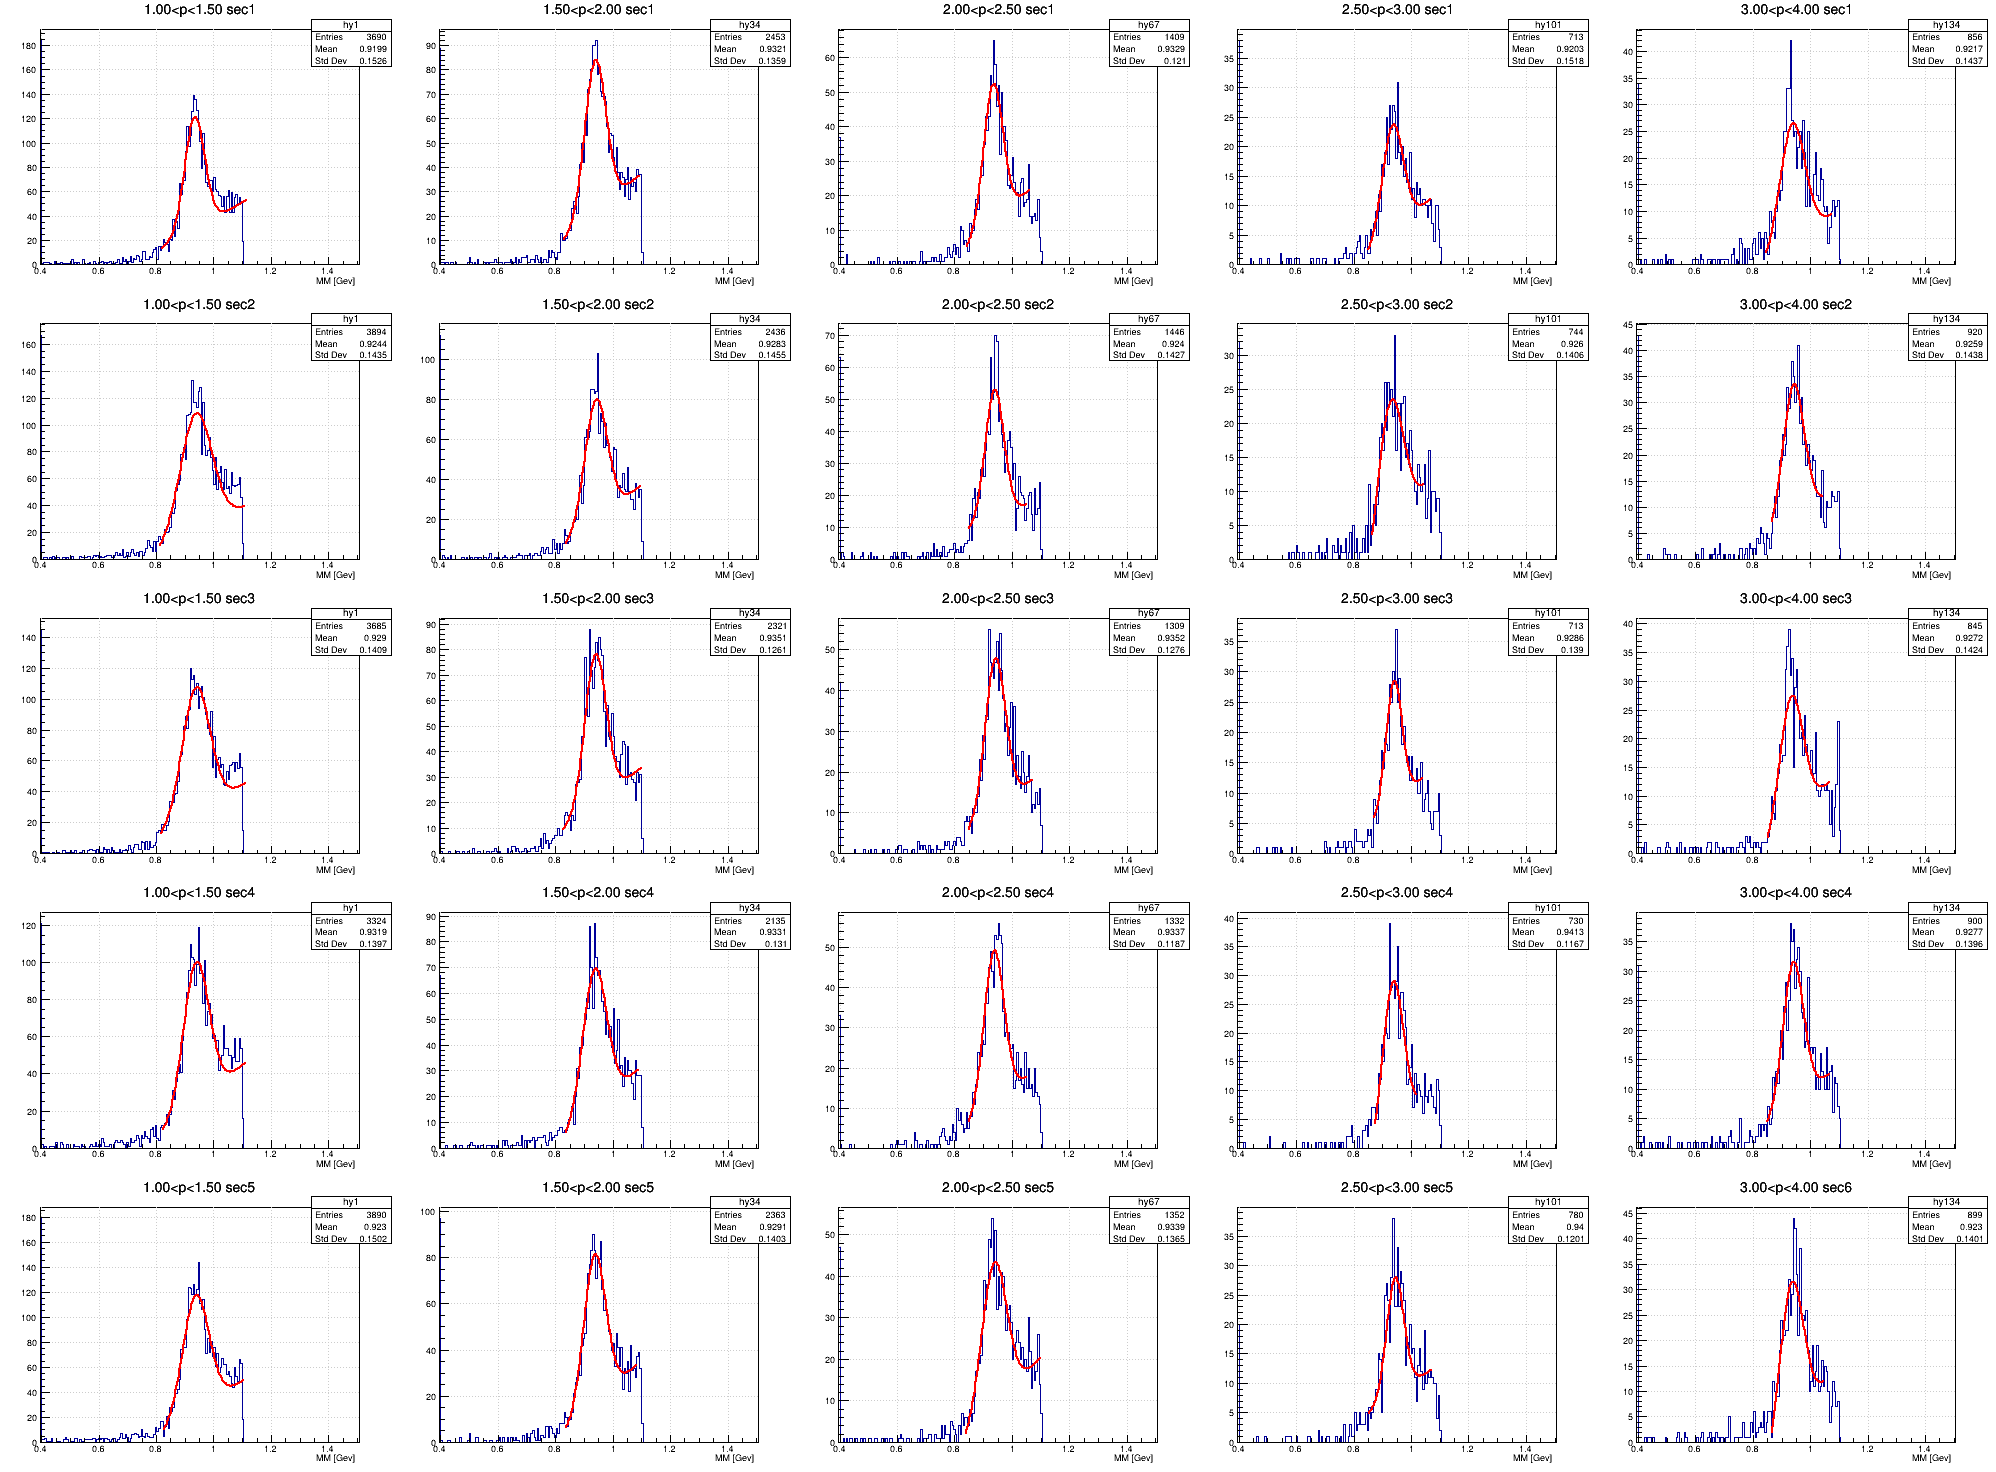

In [17]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,5,0.0001,0.0001)
c2.Draw()


for i in range(5):
    c2.cd(i+1)
    MMsec1E1.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E1.hys[i].Draw()   
for i in range(5):
    c2.cd(i+6)
    MMsec2E1.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E1.hys[i].Draw()   
for i in range(5):
    c2.cd(i+11)
    MMsec3E1.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E1.hys[i].Draw()   
for i in range(5):
    c2.cd(i+16)
    MMsec4E1.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E1.hys[i].Draw()   
for i in range(5):
    c2.cd(i+21)
    MMsec5E1.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E1.hys[i].Draw()   
for i in range(5):
    c2.cd(i+26)
    MMsec6E1.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E1.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

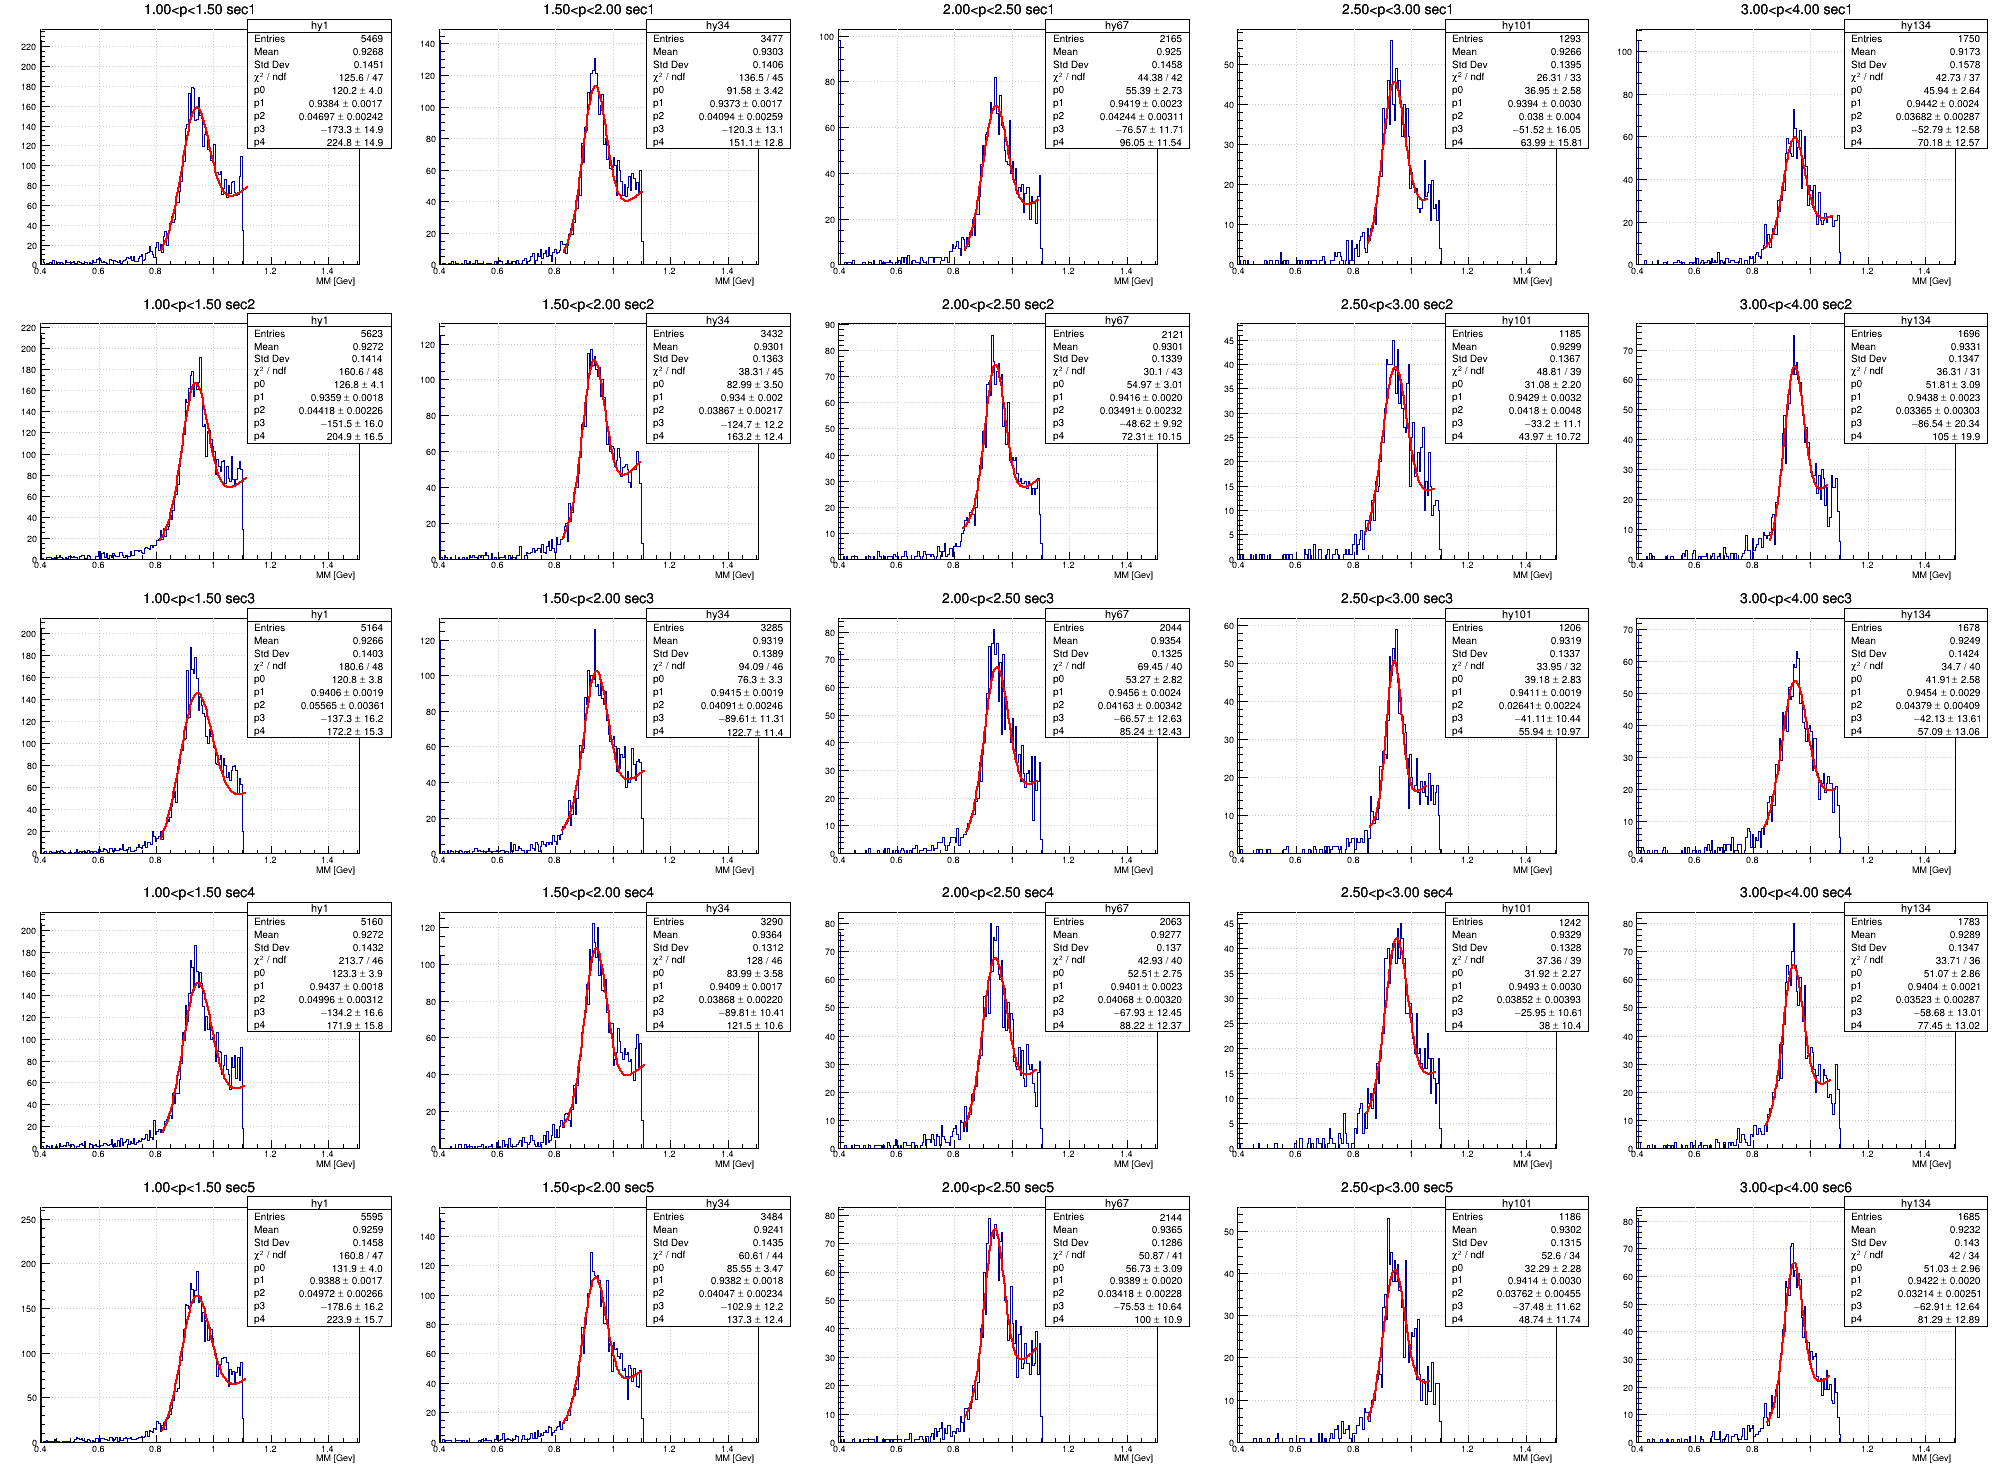

In [52]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,5,0.0001,0.0001)
c2.Draw()


for i in range(5):
    c2.cd(i+1)
    MMsec1E2.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E2.hys[i].Draw()   
for i in range(5):
    c2.cd(i+6)
    MMsec2E2.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E2.hys[i].Draw()   
for i in range(5):
    c2.cd(i+11)
    MMsec3E2.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E2.hys[i].Draw()   
for i in range(5):
    c2.cd(i+16)
    MMsec4E2.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E2.hys[i].Draw()   
for i in range(5):
    c2.cd(i+21)
    MMsec5E2.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E2.hys[i].Draw()   
for i in range(5):
    c2.cd(i+26)
    MMsec6E2.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E2.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_2.png")

In [ ]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,5,0.0001,0.0001)
c2.Draw()


for i in range(5):
    c2.cd(i+1)
    MMsec1E3.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E3.hys[i].Draw()   
for i in range(5):
    c2.cd(i+6)
    MMsec2E3.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E3.hys[i].Draw()   
for i in range(5):
    c2.cd(i+11)
    MMsec3E3.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E3.hys[i].Draw()   
for i in range(5):
    c2.cd(i+16)
    MMsec4E3.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E3.hys[i].Draw()   
for i in range(5):
    c2.cd(i+21)
    MMsec5E3.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E3.hys[i].Draw()   
for i in range(5):
    c2.cd(i+26)
    MMsec6E3.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E3.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_3.png")

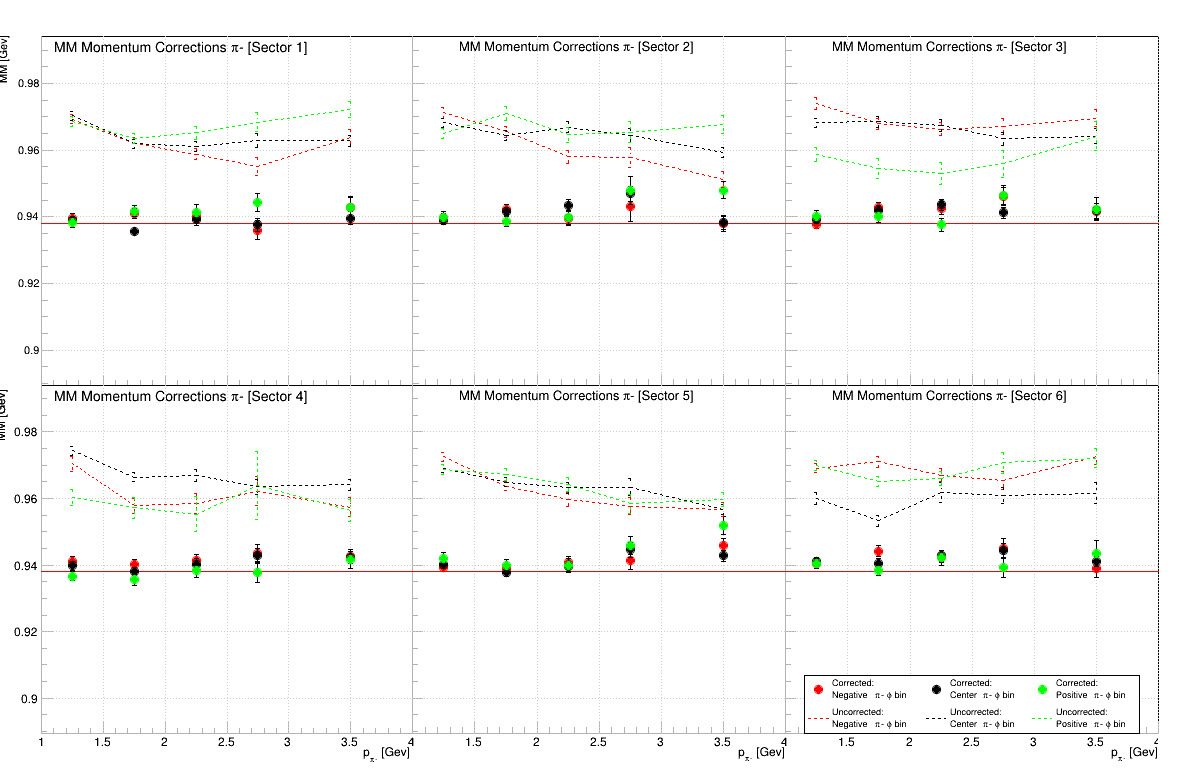

In [12]:
c3 = ROOT.TCanvas("c1","Inbending",1200,800)
c3.Divide(3, 2, 0.000, 0.000)
c3.SetGrid()
ROOT.gStyle.SetAxisColor(16,'xy')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.45)
ROOT.gStyle.SetLegendTextSize(0.0275)
c3.Draw()

line =  ROOT.TLine(1, 0.938, 4, 0.938)

#legend = ROOT.TLegend(0.6,0.7,0.9,0.9);
legend = ROOT.TLegend(0.05, 0.25, 0.95, 0.1)
legend.SetNColumns(3)
legend.AddEntry(MMsec1E1.gr,"#splitline{Corrected:}{Negative #pi- #phi bin}","P")
legend.AddEntry(MMsec1E2.gr,"#splitline{Corrected:}{Center #pi- #phi bin}","P")
legend.AddEntry(MMsec1E3.gr,"#splitline{Corrected:}{Positive #pi- #phi bin}","P")
legend.AddEntry(MMsec1E1P.gr,"#splitline{Uncorrected:}{Negative #pi- #phi bin}","l")
legend.AddEntry(MMsec1E2P.gr,"#splitline{Uncorrected:}{Center #pi- #phi bin}","l")
legend.AddEntry(MMsec1E3P.gr,"#splitline{Uncorrected:}{Positive #pi- #phi bin}","l")







c3.cd(1)
MMsec1E1.Draw("axis")

MMsec1E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec1E1.SetStats(False)
MMsec1E1.gr.SetMarkerColor(2)
MMsec1E1.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec1E2.gr.Draw("P")
MMsec1E3.gr.SetMarkerColor(3)
MMsec1E3.gr.Draw("P")

MMsec1E1P.gr.SetLineColor(2)
MMsec1E1P.gr.SetLineStyle(2)
MMsec1E1P.gr.Draw("same")
MMsec1E2P.gr.SetLineStyle(2)
MMsec1E2P.gr.Draw("same")
MMsec1E3P.gr.SetLineColor(3)
MMsec1E3P.gr.SetLineStyle(2)
MMsec1E3P.gr.Draw("same")
#legend.Draw() 

c3.cd(2)
MMsec2E1.Draw("axis")
MMsec2E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec2E1.SetStats(False)
MMsec2E1.gr.SetMarkerColor(2)
MMsec2E1.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec2E2.gr.Draw("P")
MMsec2E3.gr.SetMarkerColor(3)
MMsec2E3.gr.Draw("P")



MMsec2E1P.gr.SetLineColor(2)
MMsec2E1P.gr.SetLineStyle(2)
MMsec2E1P.gr.Draw("same")
MMsec2E2P.gr.SetLineStyle(2)
MMsec2E2P.gr.Draw("same")
MMsec2E3P.gr.SetLineColor(3)
MMsec2E3P.gr.SetLineStyle(2)
MMsec2E3P.gr.Draw("same")
#legend.Draw() 

c3.cd(3)
MMsec3E1.Draw("axis")
MMsec3E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec3E1.SetStats(False)
MMsec3E1.gr.SetMarkerColor(2)
MMsec3E1.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec3E2.gr.Draw("P")
MMsec3E3.gr.SetMarkerColor(3)
MMsec3E3.gr.Draw("P")


MMsec3E1P.gr.SetLineColor(2)
MMsec3E1P.gr.SetLineStyle(2)
MMsec3E1P.gr.Draw("same")
MMsec3E2P.gr.SetLineStyle(2)
MMsec3E2P.gr.Draw("same")
MMsec3E3P.gr.SetLineColor(3)
MMsec3E3P.gr.SetLineStyle(2)
MMsec3E3P.gr.Draw("same")
#legend.Draw() 


c3.cd(4)
MMsec4E1.Draw("axis")
MMsec4E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec4E1.SetStats(False)
MMsec4E1.gr.SetMarkerColor(2)
MMsec4E1.gr.Draw("p")
line.SetLineColor(2)
line.Draw("")
MMsec4E2.gr.Draw("p")
MMsec4E3.gr.SetMarkerColor(3)
MMsec4E3.gr.Draw("p")




MMsec4E1P.gr.SetLineColor(2)
MMsec4E1P.gr.SetLineStyle(2)
MMsec4E1P.gr.Draw("same")
MMsec4E2P.gr.SetLineStyle(2)
MMsec4E2P.gr.Draw("same")
MMsec4E3P.gr.SetLineColor(3)
MMsec4E3P.gr.SetLineStyle(2)
MMsec4E3P.gr.Draw("same")
#legend.Draw() 

c3.cd(5)
MMsec5E1.Draw("axis")
MMsec5E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec5E1.SetStats(False)
MMsec5E1.gr.SetMarkerColor(2)
MMsec5E1.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec5E2.gr.Draw("P")
MMsec5E3.gr.SetMarkerColor(3)
MMsec5E3.gr.Draw(" P")



MMsec5E1P.gr.SetLineColor(2)
MMsec5E1P.gr.SetLineStyle(2)
MMsec5E1P.gr.Draw("same")
MMsec5E2P.gr.SetLineStyle(2)
MMsec5E2P.gr.Draw("same")
MMsec5E3P.gr.SetLineColor(3)
MMsec5E3P.gr.SetLineStyle(2)
MMsec5E3P.gr.Draw("same")
#legend.Draw() 

c3.cd(6)
MMsec6E1.Draw("axis")
MMsec6E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec6E1.SetStats(False)
MMsec6E1.gr.SetMarkerColor(2)
MMsec6E1.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec6E2.gr.Draw("P")
MMsec6E3.gr.SetMarkerColor(3)
MMsec6E3.gr.Draw("P")
#legend.Draw() 
MMsec6E1P.gr.SetLineColor(2)
MMsec6E1P.gr.SetLineStyle(2)
MMsec6E1P.gr.Draw("same")

MMsec6E2P.gr.SetLineStyle(2)
MMsec6E2P.gr.Draw("same")
MMsec6E3P.gr.SetLineColor(3)
MMsec6E3P.gr.SetLineStyle(2)
MMsec6E3P.gr.Draw("same")
legend.Draw() 
c3.Print("pics/Cont_phi/Pim_phi_correction.png")


In [13]:

    
    
    
def fit2d(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.75,mx+0.75)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
    
def fit2d2(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.15,mx+0.15)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
    
def fit2d3(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.3,mx+0.3)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
    
def fit2d4(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.075,mx+0.075)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)


    
    
    

sec1E1 = rdf.Filter("elephi < -5 && esec == 1")
MMsec1E1e = sec1E1.Histo2D(("hpth","MM Momentum Corrections e- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec1E2 = rdf.Filter("elephi > -5 && elephi < 5 && esec == 1")
MMsec1E2e = sec1E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec1E3 = rdf.Filter("elephi > 5 && esec == 1")
MMsec1E3e = sec1E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")

sec2E1 = rdf.Filter("elephi < -5 && esec == 2")
MMsec2E1e = sec2E1.Histo2D(("hpth","MM Momentum Corrections e- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec2E2 = rdf.Filter("elephi > -5 && elephi < 5 && esec == 2")
MMsec2E2e = sec2E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec2E3 = rdf.Filter("elephi > 5 && esec == 2")
MMsec2E3e = sec2E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")

sec3E1 = rdf.Filter("elephi < -5 && esec == 3")
MMsec3E1e = sec3E1.Histo2D(("hpth","MM Momentum Corrections e- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec3E2 = rdf.Filter("elephi > -5 && elephi < 5 && esec == 3")
MMsec3E2e = sec3E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec3E3 = rdf.Filter("elephi > 5 && esec == 3")
MMsec3E3e = sec3E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")

sec4E1 = rdf.Filter("elephi < -5 && esec == 4")
MMsec4E1e = sec4E1.Histo2D(("hpth","MM Momentum Corrections e- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec4E2 = rdf.Filter("elephi > -5 && elephi < 5 && esec == 4")
MMsec4E2e = sec4E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec4E3 = rdf.Filter("elephi > 5 && esec == 4")
MMsec4E3e = sec4E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxMC")


sec5E1 = rdf.Filter("elephi < -5 && esec == 5")
MMsec5E1e = sec5E1.Histo2D(("hpth","MM Momentum Corrections e- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec5E2 = rdf.Filter("elephi > -5 && elephi < 5 && esec == 5")
MMsec5E2e = sec5E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec5E3 = rdf.Filter("elephi > 5 && esec == 5")
MMsec5E3e = sec5E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")

sec6E1 = rdf.Filter("elephi < -5 && esec == 6")
MMsec6E1e = sec6E1.Histo2D(("hpth","MM Momentum Corrections e- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec6E2 = rdf.Filter("elephi > -5 && elephi < 5 && esec == 6")
MMsec6E2e = sec6E2.Histo2D(("hpth","MM Momentum Corrections e- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")
sec6E3 = rdf.Filter("elephi >5 && esec == 6")
MMsec6E3e = sec6E3.Histo2D(("hpth","MM Momentum Corrections e- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"elePC","eppxMC")

line =  ROOT.TLine(2, 0.938, 9, 0.938)
fit2d2(MMsec1E1e,1)
fit2d3(MMsec1E2e,1)
fit2d(MMsec1E3e,1)

fit2d(MMsec2E1e,2)
fit2d(MMsec2E2e,2)
fit2d(MMsec2E3e,2)

fit2d2(MMsec3E1e,3)
fit2d3(MMsec3E2e,3)
fit2d(MMsec3E3e,3)

fit2d(MMsec4E1e,4)
fit2d(MMsec4E2e,4)
fit2d(MMsec4E3e,4)

fit2d3(MMsec5E1e,5)
fit2d(MMsec5E2e,5)
fit2d(MMsec5E3e,5)

fit2d2(MMsec6E1e,6)
fit2d2(MMsec6E2e,6)
fit2d2(MMsec6E3e,6)



    
def fit2d(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.15,mx+0.15)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
    
def fit2d2(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.5,mx+0.5)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
    
    
def fit2d3(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.1,mx+0.1)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
def fit2d4(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.12,mx+0.12)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
    
def fit2d5(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(3,6,1), numpy.arange(6, 8,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.2,mx+0.2)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    






    
    

    


MMsec1E1Pe = sec1E1.Histo2D(("hpth","MM Momentum e- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec1E2Pe = sec1E2.Histo2D(("hpth","MM Momentum e- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec1E3Pe = sec1E3.Histo2D(("hpth","MM Momentum e- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")


MMsec2E1Pe = sec2E1.Histo2D(("hpth","MM Momentum e- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec2E2Pe = sec2E2.Histo2D(("hpth","MM Momentum e- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec2E3Pe = sec2E3.Histo2D(("hpth","MM Momentum e- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")

MMsec3E1Pe = sec3E1.Histo2D(("hpth","MM Momentum e- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec3E2Pe = sec3E2.Histo2D(("hpth","MM Momentum e- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec3E3Pe = sec3E3.Histo2D(("hpth","MM Momentum e- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")

MMsec4E1Pe = sec4E1.Histo2D(("hpth","MM Momentum e- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec4E2Pe = sec4E2.Histo2D(("hpth","MM Momentum e- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec4E3Pe = sec4E3.Histo2D(("hpth","MM Momentum e- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")


MMsec5E1Pe = sec5E1.Histo2D(("hpth","MM Momentum e- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec5E2Pe = sec5E2.Histo2D(("hpth","MM Momentum e- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec5E3Pe = sec5E3.Histo2D(("hpth","MM Momentum e- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")

MMsec6E1Pe = sec6E1.Histo2D(("hpth","MM Momentum e- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec6E2Pe = sec6E2.Histo2D(("hpth","MM Momentum e- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")
MMsec6E3Pe = sec6E3.Histo2D(("hpth","MM Momentum e- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",200,2,9,200,0.4,1.5),"eleP","eppxM")

fit2d4(MMsec1E1Pe,1)
fit2d2(MMsec1E2Pe,1)
fit2d(MMsec1E3Pe,1)

fit2d(MMsec2E1Pe,2)
fit2d4(MMsec2E2Pe,2)
fit2d(MMsec2E3Pe,2)

fit2d(MMsec3E1Pe,3)
fit2d(MMsec3E2Pe,3)
fit2d3(MMsec3E3Pe,3)

fit2d2(MMsec4E1Pe,4)
fit2d4(MMsec4E2Pe,4)
fit2d(MMsec4E3Pe,4)

fit2d(MMsec5E1Pe,5)
fit2d5(MMsec5E2Pe,5)
fit2d(MMsec5E3Pe,5)

fit2d4(MMsec6E1Pe,6)
fit2d3(MMsec6E2Pe,6)
fit2d4(MMsec6E3Pe,6)


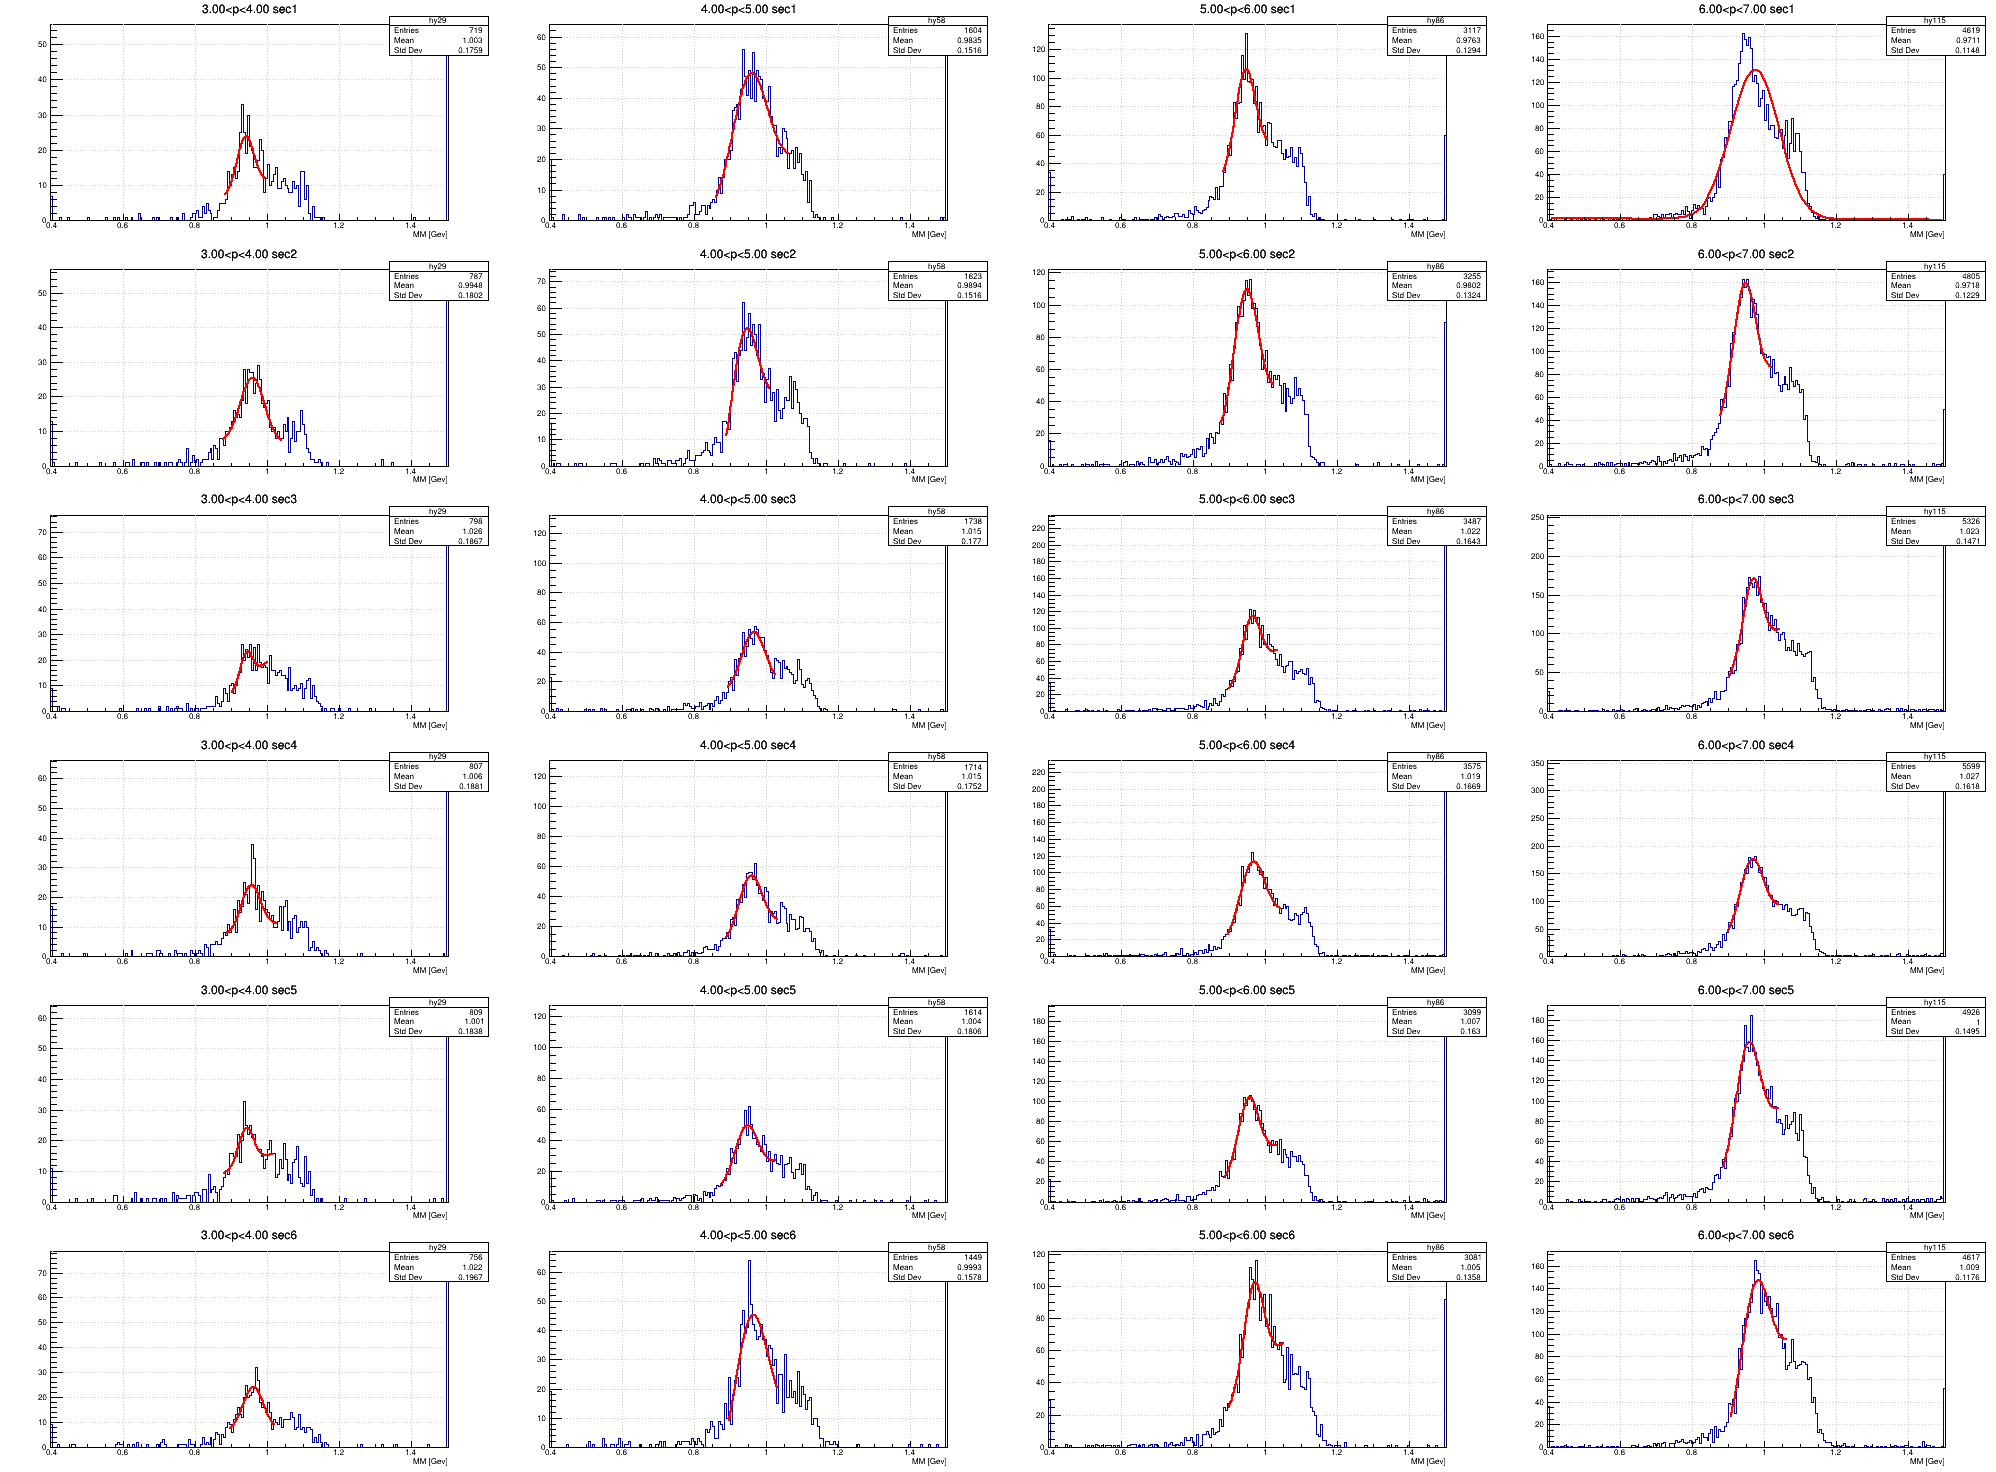

In [147]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(4,6,0.0001,0.0001)
c2.Draw()


for i in range(4):
    c2.cd(i+1)
    MMsec1E1Pe.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E1Pe.hys[i].Draw()   
for i in range(4):
    c2.cd(i+5)
    MMsec2E1Pe.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E1Pe.hys[i].Draw()   
for i in range(4):
    c2.cd(i+9)
    MMsec3E1Pe.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E1Pe.hys[i].Draw()   
for i in range(4):
    c2.cd(i+13)
    MMsec4E1Pe.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E1Pe.hys[i].Draw()   
for i in range(4):
    c2.cd(i+17)
    MMsec5E1Pe.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E1Pe.hys[i].Draw()   
for i in range(4):
    c2.cd(i+21)
    MMsec6E1Pe.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E1Pe.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

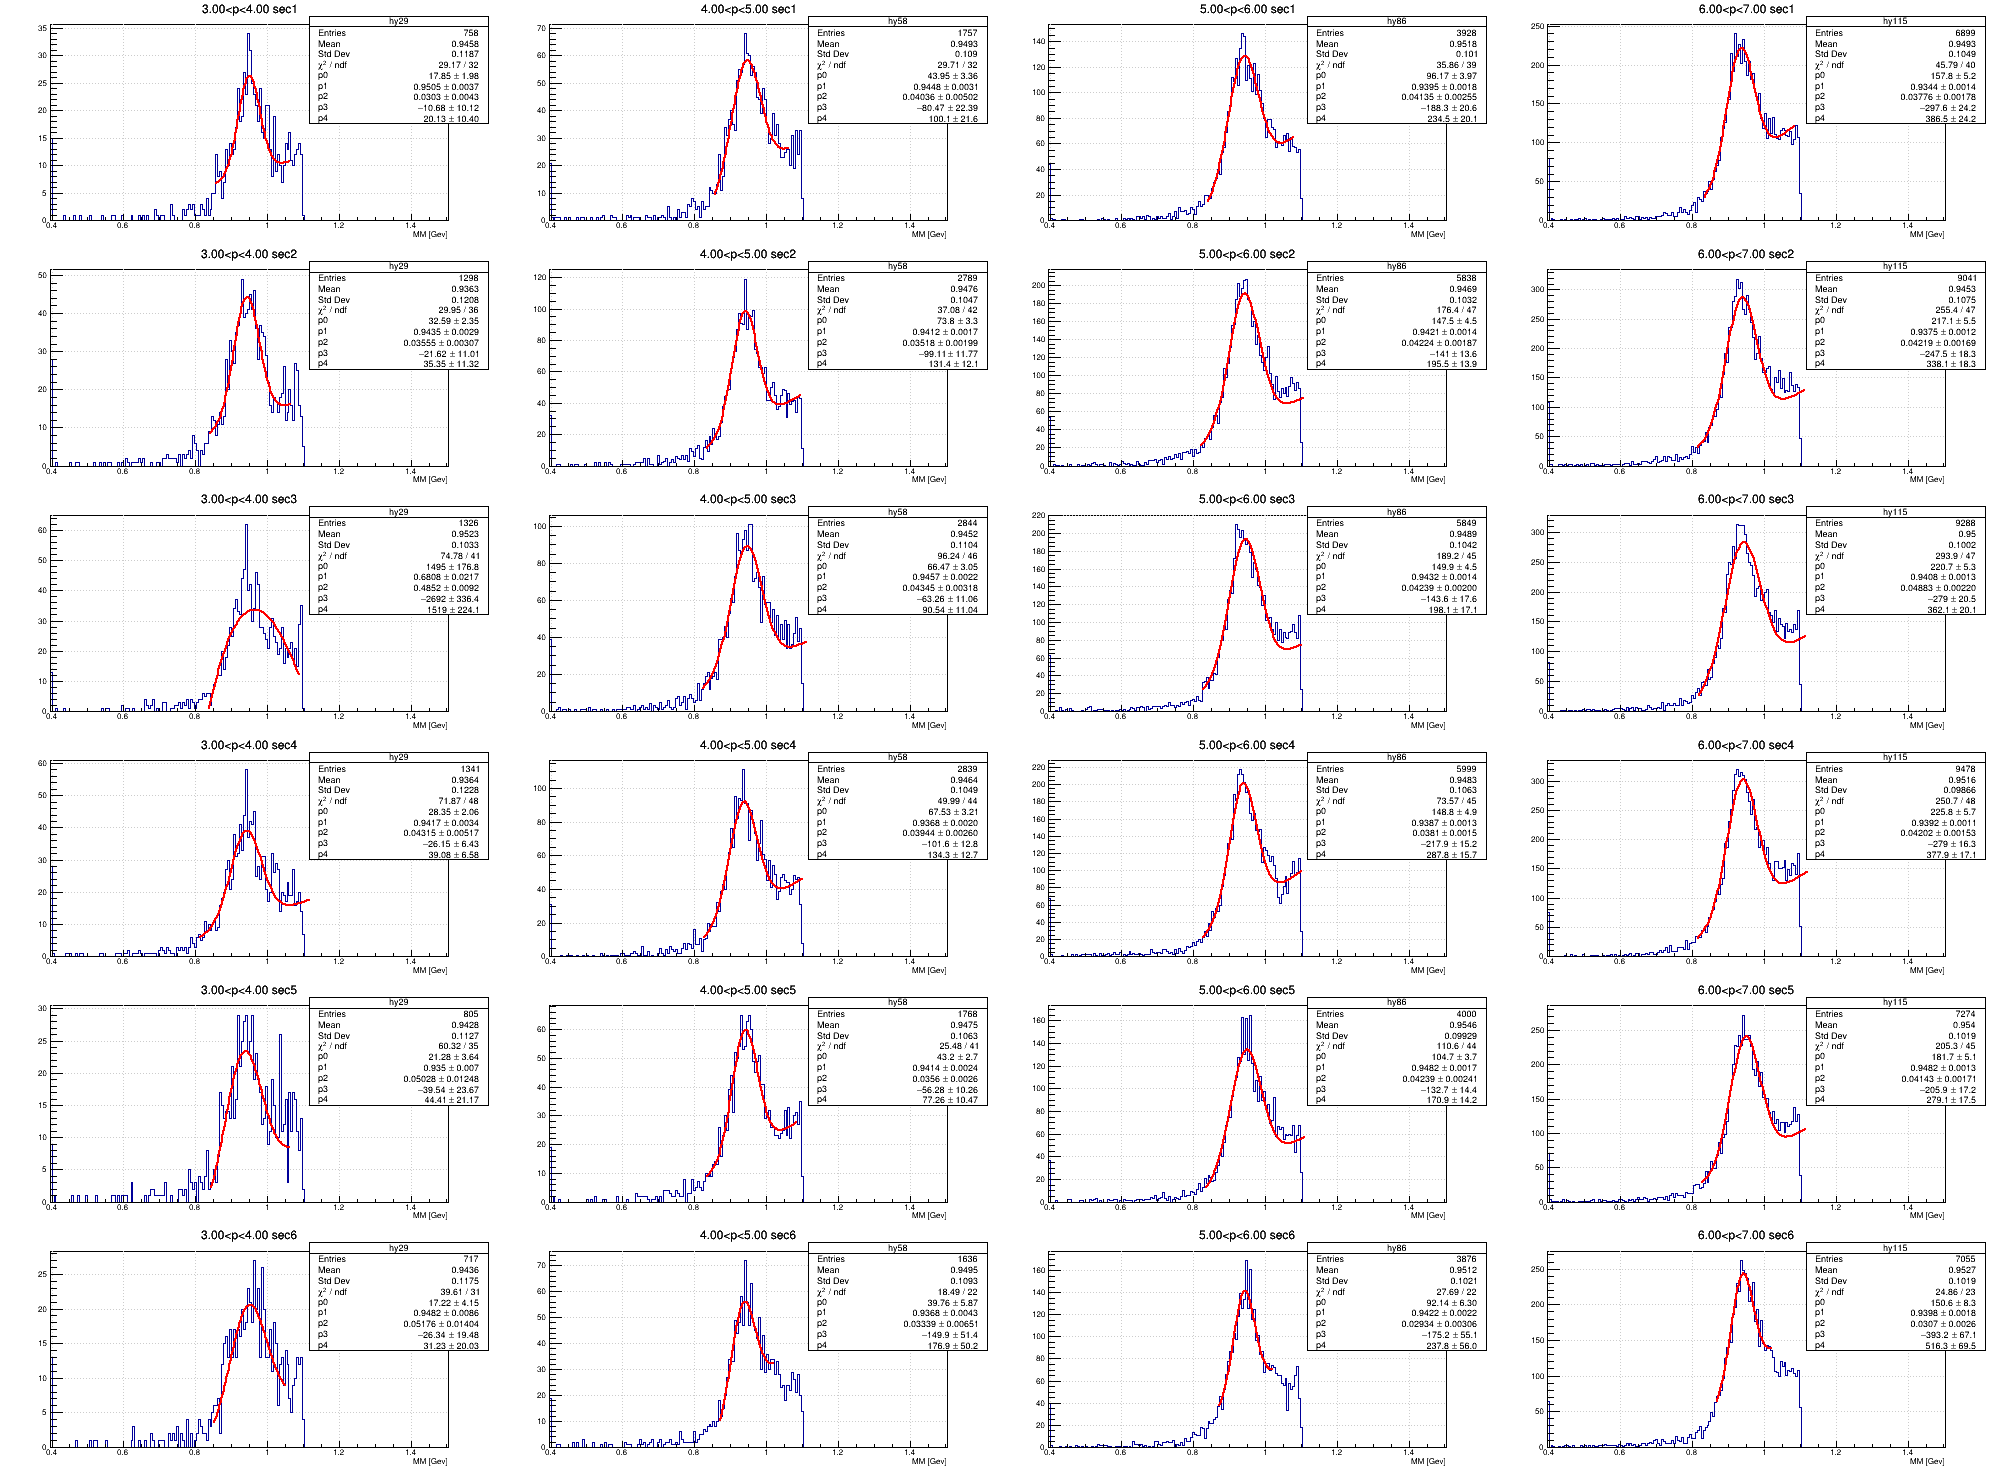

In [72]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(4,6,0.0001,0.0001)
c2.Draw()


for i in range(4):
    c2.cd(i+1)
    MMsec1E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E2e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+5)
    MMsec2E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E1e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+9)
    MMsec3E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E1e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+13)
    MMsec4E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E1e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+17)
    MMsec5E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E2e.hys[i].Draw()   
for i in range(4):
    c2.cd(i+21)
    MMsec6E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E2e.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

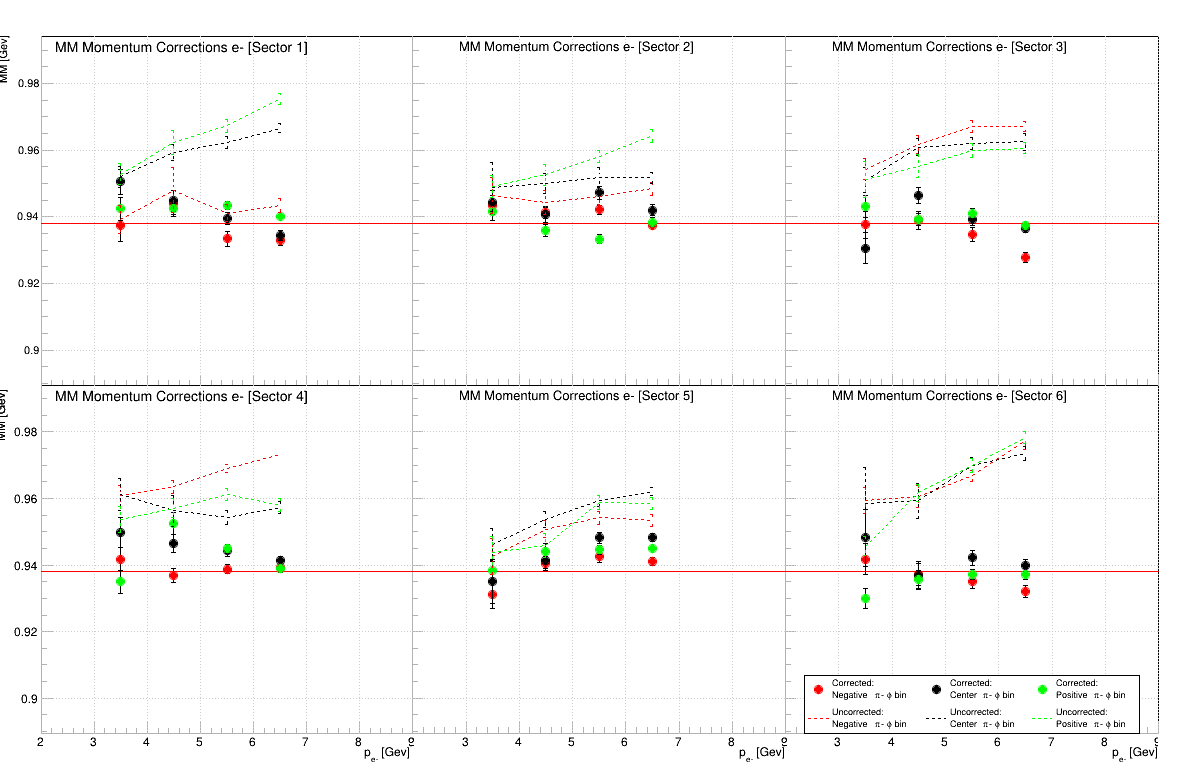

In [14]:
c3 = ROOT.TCanvas("c1","Inbending",1200,800)
c3.Divide(3, 2, 0.000, 0.000)
c3.SetGrid()
ROOT.gStyle.SetAxisColor(16,'xy')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.45)
ROOT.gStyle.SetLegendTextSize(0.0275)
c3.Draw()

line =  ROOT.TLine(2, 0.938, 9, 0.938)

#legend = ROOT.TLegend(0.6,0.7,0.9,0.9);
legend = ROOT.TLegend(0.05, 0.25, 0.95, 0.1)
legend.SetNColumns(3)
legend.AddEntry(MMsec1E1e.gr,"#splitline{Corrected:}{Negative #pi- #phi bin}","P")
legend.AddEntry(MMsec1E2e.gr,"#splitline{Corrected:}{Center #pi- #phi bin}","P")
legend.AddEntry(MMsec1E3e.gr,"#splitline{Corrected:}{Positive #pi- #phi bin}","P")
legend.AddEntry(MMsec1E1Pe.gr,"#splitline{Uncorrected:}{Negative #pi- #phi bin}","l")
legend.AddEntry(MMsec1E2Pe.gr,"#splitline{Uncorrected:}{Center #pi- #phi bin}","l")
legend.AddEntry(MMsec1E3Pe.gr,"#splitline{Uncorrected:}{Positive #pi- #phi bin}","l")


c3.cd(1)
MMsec1E1e.Draw("axis")
MMsec1E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec1E1e.SetStats(False)
MMsec1E1e.gr.SetMarkerColor(2)
MMsec1E1e.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec1E2e.gr.Draw("P")
MMsec1E3e.gr.SetMarkerColor(3)
MMsec1E3e.gr.Draw("P")

MMsec1E1Pe.gr.SetLineColor(2)
MMsec1E1Pe.gr.SetLineStyle(2)
MMsec1E1Pe.gr.Draw("L")
MMsec1E2Pe.gr.SetLineStyle(2)
MMsec1E2Pe.gr.Draw("L")
MMsec1E3Pe.gr.SetLineColor(3)
MMsec1E3Pe.gr.SetLineStyle(2)
MMsec1E3Pe.gr.Draw("L")
#legend.Draw() 

c3.cd(2)
MMsec2E1e.Draw("axis")
MMsec2E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec2E1e.SetStats(False)
MMsec2E1e.gr.SetMarkerColor(2)
MMsec2E1e.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec2E2e.gr.Draw("P")
MMsec2E3e.gr.SetMarkerColor(3)
MMsec2E3e.gr.Draw("P")


MMsec2E1Pe.gr.SetLineColor(2)
MMsec2E1Pe.gr.SetLineStyle(2)
MMsec2E1Pe.gr.Draw("L")
MMsec2E2Pe.gr.SetLineStyle(2)
MMsec2E2Pe.gr.Draw("L")
MMsec2E3Pe.gr.SetLineColor(3)
MMsec2E3Pe.gr.SetLineStyle(2)
MMsec2E3Pe.gr.Draw("L")
#legend.Draw() 

c3.cd(3)
MMsec3E1e.Draw("axis")
MMsec3E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec3E1e.SetStats(False)
MMsec3E1e.gr.SetMarkerColor(2)
MMsec3E1e.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec3E2e.gr.Draw("P")
MMsec3E3e.gr.SetMarkerColor(3)
MMsec3E3e.gr.Draw("P") 

MMsec3E1Pe.gr.SetLineColor(2)
MMsec3E1Pe.gr.SetLineStyle(2)
MMsec3E1Pe.gr.Draw("L")
MMsec3E2Pe.gr.SetLineStyle(2)
MMsec3E2Pe.gr.Draw("L")
MMsec3E3Pe.gr.SetLineColor(3)
MMsec3E3Pe.gr.SetLineStyle(2)
MMsec3E3Pe.gr.Draw("L")
#legend.Draw() 


c3.cd(4)
MMsec4E1e.Draw("axis")
MMsec4E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec4E1e.SetStats(False)
MMsec4E1e.gr.SetMarkerColor(2)
MMsec4E1e.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec4E2e.gr.Draw("P")
MMsec4E3e.gr.SetMarkerColor(3)
MMsec4E3e.gr.Draw("P")




MMsec4E1Pe.gr.SetLineColor(2)
MMsec4E1Pe.gr.SetLineStyle(2)
MMsec4E1Pe.gr.Draw("L")
MMsec4E2Pe.gr.SetLineStyle(2)
MMsec4E2Pe.gr.Draw("L")
MMsec4E3Pe.gr.SetLineColor(3)
MMsec4E3Pe.gr.SetLineStyle(2)
MMsec4E3Pe.gr.Draw("L")
#legend.Draw() 

c3.cd(5)
MMsec5E1e.Draw("axis")
MMsec5E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec5E1e.SetStats(False)
MMsec5E1e.gr.SetMarkerColor(2)
MMsec5E1e.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec5E2e.gr.Draw("P")
MMsec5E3e.gr.SetMarkerColor(3)
MMsec5E3e.gr.Draw("P")



MMsec5E1Pe.gr.SetLineColor(2)
MMsec5E1Pe.gr.SetLineStyle(2)
MMsec5E1Pe.gr.Draw("L")
MMsec5E2Pe.gr.SetLineStyle(2)
MMsec5E2Pe.gr.Draw("L")
MMsec5E3Pe.gr.SetLineColor(3)
MMsec5E3Pe.gr.SetLineStyle(2)
MMsec5E3Pe.gr.Draw("L")
#legend.Draw() 

c3.cd(6)
MMsec6E1e.Draw("axis")
MMsec6E1e.GetYaxis().SetRangeUser(0.89,0.99)
MMsec6E1e.SetStats(False)
MMsec6E1e.gr.SetMarkerColor(2)
MMsec6E1e.gr.Draw(" P")
line.SetLineColor(2)
line.Draw("")
MMsec6E2e.gr.Draw(" P")
MMsec6E3e.gr.SetMarkerColor(3)
MMsec6E3e.gr.Draw(" P")

MMsec6E1Pe.gr.SetLineColor(2)
MMsec6E1Pe.gr.SetLineStyle(2)
MMsec6E1Pe.gr.Draw(" L")
MMsec6E2Pe.gr.SetLineStyle(2)
MMsec6E2Pe.gr.Draw(" L")
MMsec6E3Pe.gr.SetLineColor(3)
MMsec6E3Pe.gr.SetLineStyle(2)
MMsec6E3Pe.gr.Draw(" L")
legend.Draw() 
c3.Print("pics/Cont_phi/Ele_phi_correction.png")


In [6]:

def fit2d(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.75,mx+0.75)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)

    
def fit2d2(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.2,mx+0.2)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    


sec1E1 = rdf.Filter("pimphi < -10 && pipsec == 1")
MMsec1E1p = sec1E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec1E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pipsec == 1")
MMsec1E2p = sec1E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec1E3 = rdf.Filter("pimphi > 10 && pipsec == 1")
MMsec1E3p = sec1E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec2E1 = rdf.Filter("pimphi < -10 && pipsec == 2")
MMsec2E1p = sec2E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec2E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pipsec == 2")
MMsec2E2p = sec2E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec2E3 = rdf.Filter("pimphi > 10 && pipsec == 2")
MMsec2E3p = sec2E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec3E1 = rdf.Filter("pimphi < -10 && pipsec == 3")
MMsec3E1p = sec3E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec3E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pipsec == 3")
MMsec3E2p= sec3E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec3E3 = rdf.Filter("pimphi > 10 && pipsec == 3")
MMsec3E3p = sec3E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec4E1 = rdf.Filter("pimphi < -10 && pipsec == 4")
MMsec4E1p = sec4E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec4E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pipsec == 4")
MMsec4E2p = sec4E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec4E3 = rdf.Filter("pimphi > 10 && pipsec == 4")
MMsec4E3p = sec4E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")


sec5E1 = rdf.Filter("pimphi < -10 && pipsec == 5")
MMsec5E1p = sec5E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec5E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pipsec == 5")
MMsec5E2p = sec5E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec5E3 = rdf.Filter("pimphi > 10 && pipsec == 5")
MMsec5E3p = sec5E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

sec6E1 = rdf.Filter("pimphi < -10 && pipsec == 6")
MMsec6E1p = sec6E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec6E2 = rdf.Filter("pimphi > -10 && pimphi < 10 && pipsec == 6")
MMsec6E2p = sec6E2.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")
sec6E3 = rdf.Filter("pimphi >10 && pipsec == 6")
MMsec6E3p = sec6E3.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxMC")

line =  ROOT.TLine(0, 0.938, 6, 0.938)
fit2d(MMsec1E1p,1)
fit2d(MMsec1E2p,1)
fit2d(MMsec1E3p,1)

fit2d(MMsec2E1p,2)
fit2d(MMsec2E2p,2)
fit2d(MMsec2E3p,2)

fit2d(MMsec3E1p,3)
fit2d(MMsec3E2p,3)
fit2d(MMsec3E3p,3)

fit2d(MMsec4E1p,4)
fit2d(MMsec4E2p,4)
fit2d(MMsec4E3p,4)

fit2d(MMsec5E1p,5)
fit2d(MMsec5E2p,5)
fit2d(MMsec5E3p,5)

fit2d(MMsec6E1p,6)
fit2d2(MMsec6E2p,6)
fit2d(MMsec6E3p,6)



def fit2d(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.75,mx+0.75)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)

    
def fit2d2(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(1,3,0.5), numpy.arange(3, 5,1)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.15,mx+0.15)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)

MMsec1E1Pp = sec1E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec1E2Pp = sec1E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec1E3Pp = sec1E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")


MMsec2E1Pp = sec2E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec2E2Pp = sec2E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec2E3Pp = sec2E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

MMsec3E1Pp = sec3E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec3E2Pp = sec3E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec3E3Pp = sec3E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

MMsec4E1Pp = sec4E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec4E2Pp = sec4E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec4E3Pp = sec4E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")


MMsec5E1Pp = sec5E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec5E2Pp = sec5E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec5E3Pp = sec5E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

MMsec6E1Pp = sec6E1.Histo2D(("hpth","MM Momentum #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec6E2Pp = sec6E2.Histo2D(("hpth","MM Momentum #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")
MMsec6E3Pp = sec6E3.Histo2D(("hpth","MM Momentum #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",200,0,6,200,0.4,1.5),"pipP","eppxM")

fit2d2(MMsec1E1Pp,1)
fit2d2(MMsec1E2Pp,1)
fit2d2(MMsec1E3Pp,1)

fit2d2(MMsec2E1Pp,2)
fit2d(MMsec2E2Pp,2)
fit2d(MMsec2E3Pp,2)

fit2d2(MMsec3E1Pp,3)
fit2d(MMsec3E2Pp,3)
fit2d2(MMsec3E3Pp,3)

fit2d(MMsec4E1Pp,4)
fit2d2(MMsec4E2Pp,4)
fit2d(MMsec4E3Pp,4)

fit2d2(MMsec5E1Pp,5)
fit2d2(MMsec5E2Pp,5)
fit2d2(MMsec5E3Pp,5)

fit2d2(MMsec6E1Pp,6)
fit2d2(MMsec6E2Pp,6)
fit2d2(MMsec6E3Pp,6)


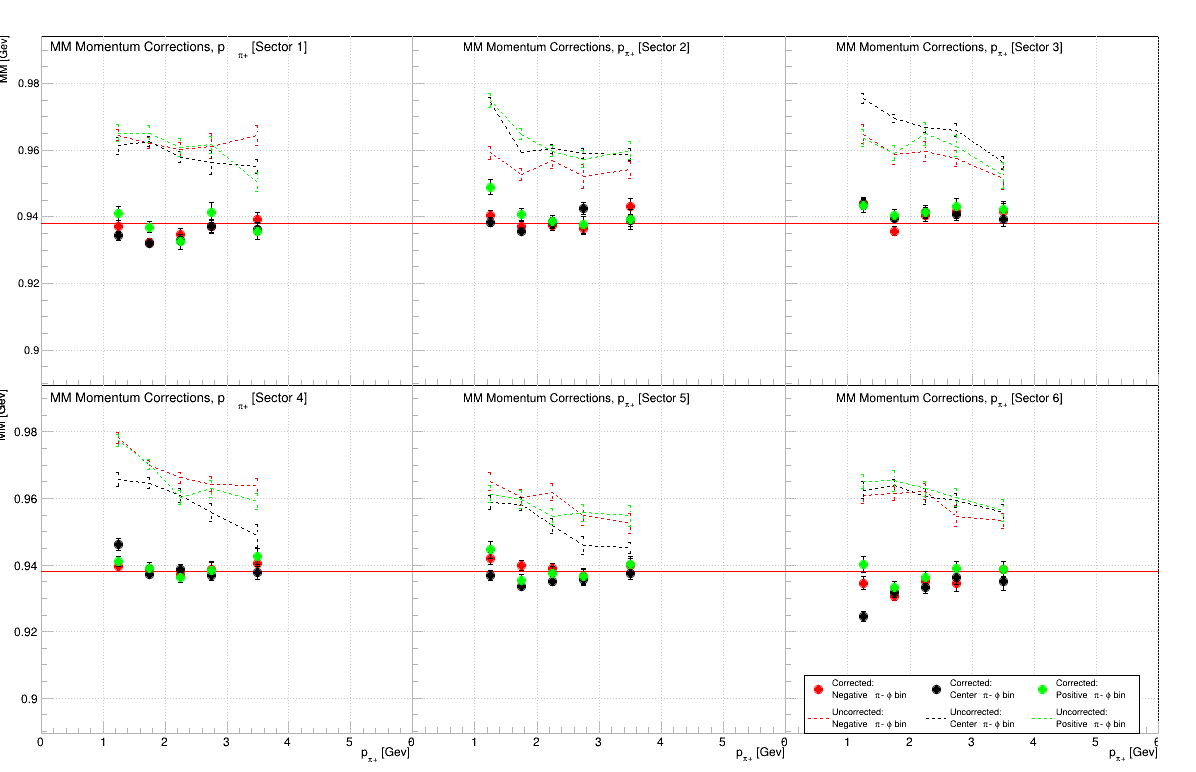

In [7]:
c3 = ROOT.TCanvas("c1","Inbending",1200,800)
c3.Divide(3, 2, 0.000, 0.000)
c3.SetGrid()
ROOT.gStyle.SetAxisColor(16,'xy')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.45)
ROOT.gStyle.SetLegendTextSize(0.0275)
c3.Draw()

line =  ROOT.TLine(0, 0.938, 6, 0.938)

#legend = ROOT.TLegend(0.6,0.7,0.9,0.9);
legend = ROOT.TLegend(0.05, 0.25, 0.95, 0.1)
legend.SetNColumns(3)
legend.AddEntry(MMsec1E1p.gr,"#splitline{Corrected:}{Negative #pi- #phi bin}","P")
legend.AddEntry(MMsec1E2p.gr,"#splitline{Corrected:}{Center #pi- #phi bin}","P")
legend.AddEntry(MMsec1E3p.gr,"#splitline{Corrected:}{Positive #pi- #phi bin}","P")
legend.AddEntry(MMsec1E1Pp.gr,"#splitline{Uncorrected:}{Negative #pi- #phi bin}","l")
legend.AddEntry(MMsec1E2Pp.gr,"#splitline{Uncorrected:}{Center #pi- #phi bin}","l")
legend.AddEntry(MMsec1E3Pp.gr,"#splitline{Uncorrected:}{Positive #pi- #phi bin}","l")



c3.cd(1)
MMsec1E1p.Draw("axis")
MMsec1E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec1E1p.SetStats(False)
MMsec1E1p.gr.SetMarkerColor(2)
MMsec1E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec1E2p.gr.Draw("P")
MMsec1E3p.gr.SetMarkerColor(3)
MMsec1E3p.gr.Draw("P")

MMsec1E1Pp.gr.SetLineColor(2)
MMsec1E1Pp.gr.SetLineStyle(2)
MMsec1E1Pp.gr.Draw("L")
MMsec1E2Pp.gr.SetLineStyle(2)
MMsec1E2Pp.gr.Draw("L")
MMsec1E3Pp.gr.SetLineColor(3)
MMsec1E3Pp.gr.SetLineStyle(2)
MMsec1E3Pp.gr.Draw("L")
#legend.Draw() 

c3.cd(2)
MMsec2E1p.Draw("axis")
MMsec2E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec2E1p.SetStats(False)
MMsec2E1p.gr.SetMarkerColor(2)
MMsec2E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec2E2p.gr.Draw("P")
MMsec2E3p.gr.SetMarkerColor(3)
MMsec2E3p.gr.Draw("P")
 


MMsec2E1Pp.gr.SetLineColor(2)
MMsec2E1Pp.gr.SetLineStyle(2)
MMsec2E1Pp.gr.Draw("L")
MMsec2E2Pp.gr.SetLineStyle(2)
MMsec2E2Pp.gr.Draw("L")
MMsec2E3Pp.gr.SetLineColor(3)
MMsec2E3Pp.gr.SetLineStyle(2)
MMsec2E3Pp.gr.Draw("L")
#legend.Draw() 

c3.cd(3)
MMsec3E1p.Draw("axis")
MMsec3E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec3E1p.SetStats(False)
MMsec3E1p.gr.SetMarkerColor(2)
MMsec3E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec3E2p.gr.Draw("P")
MMsec3E3p.gr.SetMarkerColor(3)
MMsec3E3p.gr.Draw("P")
 

MMsec3E1Pp.gr.SetLineColor(2)
MMsec3E1Pp.gr.SetLineStyle(2)
MMsec3E1Pp.gr.Draw("L")
MMsec3E2Pp.gr.SetLineStyle(2)
MMsec3E2Pp.gr.Draw("L")
MMsec3E3Pp.gr.SetLineColor(3)
MMsec3E3Pp.gr.SetLineStyle(2)
MMsec3E3Pp.gr.Draw("L")
#legend.Draw() 


c3.cd(4)
MMsec4E1p.Draw("axis")
MMsec4E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec4E1p.SetStats(False)
MMsec4E1p.gr.SetMarkerColor(2)
MMsec4E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec4E2p.gr.Draw("P")
MMsec4E3p.gr.SetMarkerColor(3)
MMsec4E3p.gr.Draw("P")
 



MMsec4E1Pp.gr.SetLineColor(2)
MMsec4E1Pp.gr.SetLineStyle(2)
MMsec4E1Pp.gr.Draw("L")
MMsec4E2Pp.gr.SetLineStyle(2)
MMsec4E2Pp.gr.Draw("L")
MMsec4E3Pp.gr.SetLineColor(3)
MMsec4E3Pp.gr.SetLineStyle(2)
MMsec4E3Pp.gr.Draw("L")
#legend.Draw() 

c3.cd(5)
MMsec5E1p.Draw("axis")
MMsec5E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec5E1p.SetStats(False)
MMsec5E1p.gr.SetMarkerColor(2)
MMsec5E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec5E2p.gr.Draw("P")
MMsec5E3p.gr.SetMarkerColor(3)
MMsec5E3p.gr.Draw("P")



MMsec5E1Pp.gr.SetLineColor(2)
MMsec5E1Pp.gr.SetLineStyle(2)
MMsec5E1Pp.gr.Draw("L")
MMsec5E2Pp.gr.SetLineStyle(2)
MMsec5E2Pp.gr.Draw("L")
MMsec5E3Pp.gr.SetLineColor(3)
MMsec5E3Pp.gr.SetLineStyle(2)
MMsec5E3Pp.gr.Draw("L")
#legend.Draw() 

c3.cd(6)
MMsec6E1p.Draw("axis")
MMsec6E1p.GetYaxis().SetRangeUser(0.89,0.99)
MMsec6E1p.SetStats(False)
MMsec6E1p.gr.SetMarkerColor(2)
MMsec6E1p.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")

MMsec6E2p.gr.Draw("P")
MMsec6E3p.gr.SetMarkerColor(3)
MMsec6E3p.gr.Draw("P")

MMsec6E1Pp.gr.SetLineColor(2)
MMsec6E1Pp.gr.SetLineStyle(2)
MMsec6E1Pp.gr.Draw("L")

MMsec6E2Pp.gr.SetLineStyle(2)
MMsec6E2Pp.gr.Draw("L")
MMsec6E3Pp.gr.SetLineColor(3)
MMsec6E3Pp.gr.SetLineStyle(2)
MMsec6E3Pp.gr.Draw("L")
legend.Draw() 
c3.Print("pics/Cont_phi/Pip_phi_correction.png")


## delta P Correction

In [24]:
%reset -f 
import ROOT, numpy

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/skim8_005*")
rdf = ROOT.RDataFrame("h22","/lustre19/expphy/volatile/clas12/trotta/wagon/RhoWagon/PyAnalysis/data/outb/epPipPim.outb.qa.nSidis_005*")




rdf = rdf.Define("vals","""
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pip = ROOT::Math::PxPyPzMVector(pipx,pipy,pipz,0.1395);
auto pim = ROOT::Math::PxPyPzMVector(pimx,pimy,pimz,0.1395);
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);

double elePh = ele.Phi()*TMath::RadToDeg();

    if(((esec == 4 || esec == 3) && elePh < 0) || (esec > 4 && elePh < 90)){
          elePh = ele.Phi()*TMath::RadToDeg()+360;
    }


    elePh = elePh- (esec - 1)*60;
auto elePhi = elePh-30/ele.P();

 double xx[] = {
0.0219879, 0.00406117, 0.000287491, 0.0244179, 0.0169383, 0.000121762,
0.0209204, -0.000675913, -0.00874854, 0.025209, 0.0113607, -0.0104661,
0.0211029, 0.00524283, 0.0116993, 0.0242328, 0.00706621, -0.0185997,
0.0240847, 0.0054933, 0.00358604, 0.0264154, 0.0111607, -0.00691424,
0.0243936, -1.30348e-06, -0.0157793, 0.0222698, 0.0123583, -0.00728148,
0.0224922, 0.0200913, 0.0337443, 0.0262862, 0.0170036, -0.00152548
};

  double pars[6][2][3];
  int ipar=0;
  for(int isec=0;isec<6;isec++)
  for(int ivec=0;ivec<2;ivec++) {
      if (ivec==0) {
      double dp1=xx[ipar++], dp5=xx[ipar++], dp9=xx[ipar++];

      pars[isec][ivec][0] = (dp1 - 2*dp5 + dp9)/32.;
      pars[isec][ivec][1] = (-7*dp1)/16. + (5*dp5)/8. - (3*dp9)/16.;
      pars[isec][ivec][2] = (45*dp1)/32. - (9*dp5)/16. + (5*dp9)/32.;
    } else {
      double dp1=xx[ipar++], dp2=xx[ipar++], dp4=xx[ipar++];

      double a = (dp4 - 3*dp2 + 2*dp1) / 6.0;
      double b = dp2 - dp1 - 3*a;
      double c = dp1 - a -b;

      pars[isec][ivec][0] = a;
      pars[isec][ivec][1] = b;
      pars[isec][ivec][2] = c;
    }
  }


    double pp = sqrt(ex*ex + ey*ey + ez*ez);
    auto sec = (int) esec;

    int ivec = 0==1 ? 1 : 0;
    double a=pars[sec-1][ivec][0],
           b=pars[sec-1][ivec][1],
           c=pars[sec-1][ivec][2];

    double dpEle = a*pp*pp + b*pp + c;
    if(sec == 1){
                    dpEle = ((-7.68e-06)*elePhi*elePhi + (4.636e-05)*elePhi + (4.7165e-04))*pp*pp + ((1.2086e-04)*elePhi*elePhi + (2.09591e-05)*elePhi + (-0.01582))*pp + ((-4.1002e-04)*elePhi*elePhi + (1.7298e-04)*elePhi + (0.10544));
                    dpEle = dpEle + ((7.51e-06)*elePhi*elePhi + (6.45e-06)*elePhi + (-0.00152778))*pp*pp + ((-0.00011089)*elePhi*elePhi + (-0.00017683)*elePhi + (0.02131197))*pp + ((0.00037962)*elePhi*elePhi + (0.00060197)*elePhi + (-0.06886547));

                }

                if(sec == 2){
                    dpEle = ((-2.69e-06)*elePhi*elePhi + (9.252e-05)*elePhi + (5.1693e-04))*pp*pp + ((3.016e-05)*elePhi*elePhi + (-6.0141e-04)*elePhi + (-0.0146))*pp + ((-6.09e-05)*elePhi*elePhi + (1.604e-03)*elePhi + (0.09208));
                    dpEle = dpEle + ((1.24e-06)*elePhi*elePhi + (-4.735e-05)*elePhi + (-0.00150312))*pp*pp + ((-2.097e-05)*elePhi*elePhi + (0.00049518)*elePhi + (0.01920915))*pp + ((7.474e-05)*elePhi*elePhi + (-0.00132086)*elePhi + (-0.05686766));

                }

                if(sec == 3){
                    dpEle = ((-1.045e-05)*elePhi*elePhi + (-6.491e-05)*elePhi + (1.1362e-03))*pp*pp + ((1.2512e-04)*elePhi*elePhi + (5.3421e-04)*elePhi + (-0.0174))*pp + ((-3.0891e-04)*elePhi*elePhi + (-1.5332e-03)*elePhi + (0.09389));
                    dpEle = dpEle + ((6.94e-06)*elePhi*elePhi + (4.271e-05)*elePhi + (-0.00182765))*pp*pp + ((-8.322e-05)*elePhi*elePhi + (-0.00042238)*elePhi + (0.01994986))*pp + ((0.00021956)*elePhi*elePhi + (0.00103844)*elePhi + (-0.04956505));

                }

                if(sec == 4){
                    dpEle = ((-7.37e-06)*elePhi*elePhi + (-8.13e-06)*elePhi + (9.2425e-04))*pp*pp + ((1.1312e-04)*elePhi*elePhi + (-5.24444e-05)*elePhi + (-0.022944))*pp + ((-3.518e-04)*elePhi*elePhi + (3.1893e-04)*elePhi + (0.1323));
                    dpEle = dpEle + ((8.74e-06)*elePhi*elePhi + (-1.617e-05)*elePhi + (-0.00173764))*pp*pp + ((-0.00011774)*elePhi*elePhi + (0.00024329)*elePhi + (0.02310896))*pp + ((0.00036368)*elePhi*elePhi + (-0.00076238)*elePhi + (-0.07050779));

                }

                if(sec == 5){
                    dpEle = ((-8.17e-06)*elePhi*elePhi + (-1.681e-05)*elePhi + (7.8066e-04))*pp*pp + ((1.4176e-04)*elePhi*elePhi + (4.1096e-04)*elePhi + (-0.026944))*pp + ((-4.4153e-04)*elePhi*elePhi + (-1.3535e-03)*elePhi + (0.1486));
                    dpEle = dpEle + ((7.69e-06)*elePhi*elePhi + (1.774e-05)*elePhi + (-1.57552e-03))*pp*pp + ((-1.0778e-04)*elePhi*elePhi + (-2.6133e-04)*elePhi + (0.02076174))*pp + ((3.196e-04)*elePhi*elePhi + (8.8134e-04)*elePhi + (-0.06204126));

                }

                if(sec == 6){
                    dpEle = ((1.63e-06)*elePhi*elePhi + (6.251e-05)*elePhi + (-2.2457e-04))*pp*pp + ((8.18e-06)*elePhi*elePhi + (-6.688e-04)*elePhi + (4.2875e-04))*pp + ((-2.172e-05)*elePhi*elePhi + (1.5467e-03)*elePhi + (0.05676));
                    dpEle = dpEle + ((1.34e-06)*elePhi*elePhi + (-1.574e-05)*elePhi + (-0.00133653))*pp*pp + ((-1.991e-05)*elePhi*elePhi + (0.00024404)*elePhi + (0.01428837))*pp + ((5.149e-05)*elePhi*elePhi + (-0.0007992)*elePhi + (-0.03467815));

                }

            



    
double pipPh = pip.Phi()*TMath::RadToDeg();

auto pppip = pip.P();
 
 
   if(((pipsec == 4 || pipsec == 3) && pipPh < 0) || (pipsec > 4 && pipPh < 90)){
          pipPh = pip.Phi()*TMath::RadToDeg()+360;
    }


    pipPh = pipPh- (pipsec - 1)*60;
 

auto pipphi = pipPh + (32/(pip.P()-0.05));
double dppip;


            if(pipsec == 1){
                    dppip = ((5.7e-07)*pipphi*pipphi + (-2.531e-05)*pipphi + (3.2253e-04))*pppip*pppip + ((2.12e-06)*pipphi*pipphi + (-3.6741e-04)*pipphi + (-0.01378))*pppip + ((-1.215e-05)*pipphi*pipphi + (4.275e-04)*pipphi + (0.04561));
                    dppip = dppip + ((-2.12e-06)*pipphi*pipphi + (3.185e-05)*pipphi + (0.00178389))*pppip*pppip + ((1.262e-05)*pipphi*pipphi + (-0.00012324)*pipphi + (-0.01494883))*pppip + ((-1.422e-05)*pipphi*pipphi + (0.00021045)*pipphi + (0.02590949));

                }

                if(pipsec == 2){
                    dppip = ((-4e-08)*pipphi*pipphi + (-9.836e-05)*pipphi + (3.142e-04))*pppip*pppip + ((8.6e-07)*pipphi*pipphi + (4.6073e-04)*pipphi + (-0.0136))*pppip + ((8.09e-06)*pipphi*pipphi + (-6.0253e-04)*pipphi + (0.03594));
                    dppip = dppip + ((-9.8e-07)*pipphi*pipphi + (3.974e-05)*pipphi + (0.00159441))*pppip*pppip + ((6.61e-06)*pipphi*pipphi + (-0.00023934)*pipphi + (-0.01295355))*pppip + ((-1.087e-05)*pipphi*pipphi + (0.00027704)*pipphi + (0.02013232));

                }

                if(pipsec == 3){
                    dppip = ((-1.37e-06)*pipphi*pipphi + (3.759e-05)*pipphi + (7.4895e-04))*pppip*pppip + ((8.45e-06)*pipphi*pipphi + (1.464e-04)*pipphi + (-0.01952))*pppip + ((-1.41e-06)*pipphi*pipphi + (-3.5781e-04)*pipphi + (0.0353));
                    dppip = dppip + ((-3.2e-07)*pipphi*pipphi + (-2.98e-06)*pipphi + (0.00144252))*pppip*pppip + ((2.9e-06)*pipphi*pipphi + (-5.719e-05)*pipphi + (-0.01197579))*pppip + ((-5.74e-06)*pipphi*pipphi + (0.00024614)*pipphi + (0.02228774));

                }

                if(pipsec == 4){
                    dppip = ((2.7e-06)*pipphi*pipphi + (5.028e-05)*pipphi + (9.007e-04))*pppip*pppip + ((-1.548e-05)*pipphi*pipphi + (-6.141e-05)*pipphi + (-0.0151))*pppip + ((2.063e-05)*pipphi*pipphi + (1.7882e-04)*pipphi + (0.03522));
                    dppip = dppip + ((-8.2e-07)*pipphi*pipphi + (-2.606e-05)*pipphi + (0.00102121))*pppip*pppip + ((6.32e-06)*pipphi*pipphi + (0.00013252)*pipphi + (-0.00898872))*pppip + ((-9.79e-06)*pipphi*pipphi + (-0.00017861)*pipphi + (0.01654247));

                }

                if(pipsec == 5){
                    dppip = ((2.2e-06)*pipphi*pipphi + (-1.554e-05)*pipphi + (5.465e-04))*pppip*pppip + ((-1.06e-05)*pipphi*pipphi + (1.226e-04)*pipphi + (-0.01651))*pppip + ((1.039e-05)*pipphi*pipphi + (-2.062e-04)*pipphi + (0.0436));
                    dppip = dppip + ((-5.8e-07)*pipphi*pipphi + (-1.4e-07)*pipphi + (0.00129068))*pppip*pppip + ((5.43e-06)*pipphi*pipphi + (-2.262e-05)*pipphi + (-0.01076443))*pppip + ((-7.78e-06)*pipphi*pipphi + (0.00010021)*pipphi + (0.01975448));

                }

                if(pipsec == 6){
                    dppip = ((1.11e-06)*pipphi*pipphi + (-1e-08)*pipphi + (6.88e-05))*pppip*pppip + ((-8.86e-06)*pipphi*pipphi + (-5.94e-05)*pipphi + (-0.01133))*pppip + ((1.919e-05)*pipphi*pipphi + (-2.444e-04)*pipphi + (0.03491));
                    dppip = dppip + ((-1.15e-06)*pipphi*pipphi + (6.34e-06)*pipphi + (0.00196799))*pppip*pppip + ((1.196e-05)*pipphi*pipphi + (-0.00010685)*pipphi + (-0.01774286))*pppip + ((-2.573e-05)*pipphi*pipphi + (0.00042626)*pipphi + (0.03688378));

                }





double pimPh = pim.Phi()*TMath::RadToDeg();

if(((pimsec == 4 || pimsec == 3) && pimPh < 0) || (pimsec > 4 && pimPh < 90)){
          pimPh = pim.Phi()*TMath::RadToDeg()+360;
    }


    pimPh = pimPh- (pimsec - 1)*60;


auto pimPhi = pimPh - (32/(pim.P()-0.05));

pp = ele.P();

auto fpip = (dppip/pppip) +1;
auto fe = (dpEle/pp)+1;
//auto fpim = (dppim/ppPim) +1;

auto exC = ex*fe;
auto eyC = ey*fe;
auto ezC = ez*fe;

auto pipxC = pipx*fpip;
auto pipyC = pipy*fpip;
auto pipzC = pipz*fpip;

/*auto pimxC = pimx*fpim;
auto pimyC = pimy*fpim;
auto pimzC = pimz*fpim;*/

auto eleC = ROOT::Math::PxPyPzMVector(exC,eyC,ezC,0);
auto pipC = ROOT::Math::PxPyPzMVector(pipxC,pipyC,pipzC,0.13957);
//auto pimC = ROOT::Math::PxPyPzMVector(pimxC,pimyC,pimzC,0.13957);



auto TbeamPim = ROOT::Math::VectorUtil::Angle(beam,pim);
auto TelePim = ROOT::Math::VectorUtil::Angle(eleC,pim);
auto TpipPim = ROOT::Math::VectorUtil::Angle(pipC,pim);
auto TbeamEle = ROOT::Math::VectorUtil::Angle(eleC,beam);
auto TbeamPip = ROOT::Math::VectorUtil::Angle(beam,pipC);
auto TelePip = ROOT::Math::VectorUtil::Angle(eleC,pipC);

auto K = 2*(eleC.E()+pipC.E()-beam.E()-targ.E());
auto Q = 2*(beam.P()*cos(TbeamPim)-eleC.P()*cos(TelePim)-pipC.P()*cos(TpipPim));
auto W1 = (pipC.M()*pipC.M()+pim.M()*pim.M()-2*beam.E()*eleC.E()+2*beam.P()*eleC.P()*cos(TbeamEle)-2*pipC.E()*beam.E()+2*beam.P()*pipC.P()*cos(TbeamPip));
auto W2 = -2*targ.E()*eleC.E()-2*targ.E()*pipC.E()+2*targ.E()*beam.E()+2*eleC.E()*pipC.E()-2*eleC.P()*pipC.P()*cos(TelePip);
auto W = W1+W2;


auto A = Q*Q-K*K;
auto B = 2*Q*W;
auto C = W*W - (pim.M()*pim.M())*(K*K);


auto pimP1 = (-B+sqrt(B*B-4*A*C))/(2*A);
auto pimP2 = (-B-sqrt(B*B-4*A*C))/(2*A);


auto ppPim = pim.P();
double dppim;

   if(pimsec == 1){
        dppim = (7.0012E-06*pimPhi*pimPhi + -5.1123E-05*pimPhi + 4.9707E-03)*ppPim*ppPim +(-2.9510E-05*pimPhi*pimPhi + 4.0965E-04*pimPhi + -3.9091E-02)*ppPim + 2.2818E-05*pimPhi*pimPhi + -3.0163E-04*pimPhi + 5.7720E-02 - 0.015;        
    } else if(pimsec == 2){
         dppim =(-1.0349E-05*pimPhi*pimPhi + -5.7161E-05*pimPhi + 5.1826E-03)*ppPim*ppPim +(4.1503E-05*pimPhi*pimPhi + 3.7803E-04*pimPhi + -4.0465E-02)*ppPim  + -3.0650E-05*pimPhi*pimPhi + -3.6109E-04*pimPhi + 5.6128E-02 - 0.015;    
    } else if(pimsec == 3){
         dppim =(3.8235E-06*pimPhi*pimPhi + 3.1026E-06*pimPhi + 6.4670E-03)*ppPim*ppPim +(-1.5355E-05*pimPhi*pimPhi + 1.1692E-05*pimPhi + -4.8549E-02)*ppPim  + 1.2213E-05*pimPhi*pimPhi + -4.1566E-05*pimPhi + 6.6383E-02 - 0.015;    
    } else if(pimsec == 4){
         dppim =(-2.6127E-06*pimPhi*pimPhi + -2.1896E-04*pimPhi + 5.3241E-03)*ppPim*ppPim +(7.7809E-06*pimPhi*pimPhi + 1.1273E-03*pimPhi + -4.1962E-02)*ppPim  + -5.4515E-06*pimPhi*pimPhi + -1.1430E-03*pimPhi + 6.1686E-02 - 0.015;      
    } else if(pimsec == 5){
         dppim = (1.3350E-06*pimPhi*pimPhi + -1.1790E-05*pimPhi + 4.4759E-03)*ppPim*ppPim +(-9.8032E-06*pimPhi*pimPhi + 4.9079E-05*pimPhi + -4.3290E-02)*ppPim  + 1.0140E-05*pimPhi*pimPhi + -1.1833E-04*pimPhi + 6.4325E-02 - 0.015;         
    } else if(pimsec == 6){
         dppim =(5.5624E-06*pimPhi*pimPhi + 1.8953E-06*pimPhi + 5.8432E-03)*ppPim*ppPim +(-1.7214E-05*pimPhi*pimPhi + 5.4390E-05*pimPhi + -4.2698E-02)*ppPim  + 1.1067E-05*pimPhi*pimPhi + -9.2312E-05*pimPhi + 6.1462E-02 - 0.015;      
    }
auto fpim = (dppim/ppPim) +1;



auto pimxC = pimx*fpim;
auto pimyC = pimy*fpim;
auto pimzC = pimz*fpim;

auto pimC = ROOT::Math::PxPyPzMVector(pimxC,pimyC,pimzC,0.13957);


auto dp =pimP1- pimC.P();

if(abs(pimP1 - pimC.P()) > abs(pimP2 - pimC.P())){
    dp = pimP2- pimC.P();
}

if(abs(pimP1 - pimC.P()) < abs(pimP2 - pimC.P())){
    dp =pimP1 - pimC.P();
    
} 


auto ePipPimX = beam + targ - eleC- pip - pim;
auto ePipPimXC = beam + targ - eleC - pipC - pim;



std::vector<double> vals = {ePipPimXC.M(),dp, pim.P(),pimPhi};
return vals;
""")


rdf = rdf.Define("eppxMC","vals[0]")
rdf = rdf.Define("dp","vals[1]")
rdf = rdf.Define("pimP","vals[2]")
rdf = rdf.Define("pimphi","vals[3]")




def fit2d(h2,sec):
    #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(0.5,4,0.5), numpy.arange(4, 5, 0.5)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-1,mx+1)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        #fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, 0.05) 
       # gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1)) 
        hy.Fit(fy,"QR")
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    fdp = ROOT.TF1("fdp","gaus(0)+pol1(0)",0.5,5)
    fdp.SetParameters(0,0,0)
    setattr(h2,"fdp",fdp)
    fdp.SetLineColor(6)
    gr.Fit(fdp, "QR")
    
    
rdf = rdf.Filter("vals[0] < 1.1")

nbins = 200# 350
d11 = rdf.Filter("pimsec == 1 && pimphi < -10")
dpp11 = d11.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d12 = rdf.Filter("pimsec == 1 && pimphi > -10 && pimphi < 10")
dpp12 = d12.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d13 = rdf.Filter("pimsec == 1 && pimphi > 10")
dpp13 = d13.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d21 = rdf.Filter("pimsec == 2 && pimphi < -10")
dpp21 = d21.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d22 = rdf.Filter("pimsec == 2 && pimphi > -10 && pimphi < 10")
dpp22 = d22.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d23 = rdf.Filter("pimsec == 2 && pimphi > 10")
dpp23 = d23.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")


d31 = rdf.Filter("pimsec == 3 && pimphi < -10")
dpp31 = d31.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d32 = rdf.Filter("pimsec == 3 && pimphi > -10 && pimphi < 10")
dpp32 = d32.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d33 = rdf.Filter("pimsec == 3 && pimphi > 10")
dpp33 = d33.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d41 = rdf.Filter("pimsec == 4 && pimphi < -10")
dpp41 = d41.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d42 = rdf.Filter("pimsec == 4 && pimphi > -10 && pimphi < 10")
dpp42 = d42.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d43 = rdf.Filter("pimsec == 4 && pimphi > 10")
dpp43 = d43.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d51 = rdf.Filter("pimsec == 5 && pimphi < -10")
dpp51 = d51.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 5 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d52 = rdf.Filter("pimsec == 5 && pimphi > -10 && pimphi < 10")
dpp52 = d52.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d53 = rdf.Filter("pimsec == 5 && pimphi > 10")
dpp53 = d53.Histo2D(("hpth","#DeltaP vs P for #pi- (sec5phi >10);p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d61 = rdf.Filter("pimsec == 6 && pimphi < -10")
dpp61 = d61.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d62 = rdf.Filter("pimsec == 6 && pimphi > -10 && pimphi < 10")
dpp62 = d62.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d63 = rdf.Filter("pimsec == 6 && pimphi > 10")
dpp63 = d63.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")


fit2d(dpp11,1)
fit2d(dpp21,2)
fit2d(dpp31,3)
fit2d(dpp41,4)
fit2d(dpp51,5)
fit2d(dpp61,6)

fit2d(dpp12,1)
fit2d(dpp22,2)
fit2d(dpp32,3)
fit2d(dpp42,4)
fit2d(dpp52,5)
fit2d(dpp62,6)



fit2d(dpp13,1)
fit2d(dpp23,2)
fit2d(dpp33,3)
fit2d(dpp43,4)
fit2d(dpp53,5)
fit2d(dpp63,6)




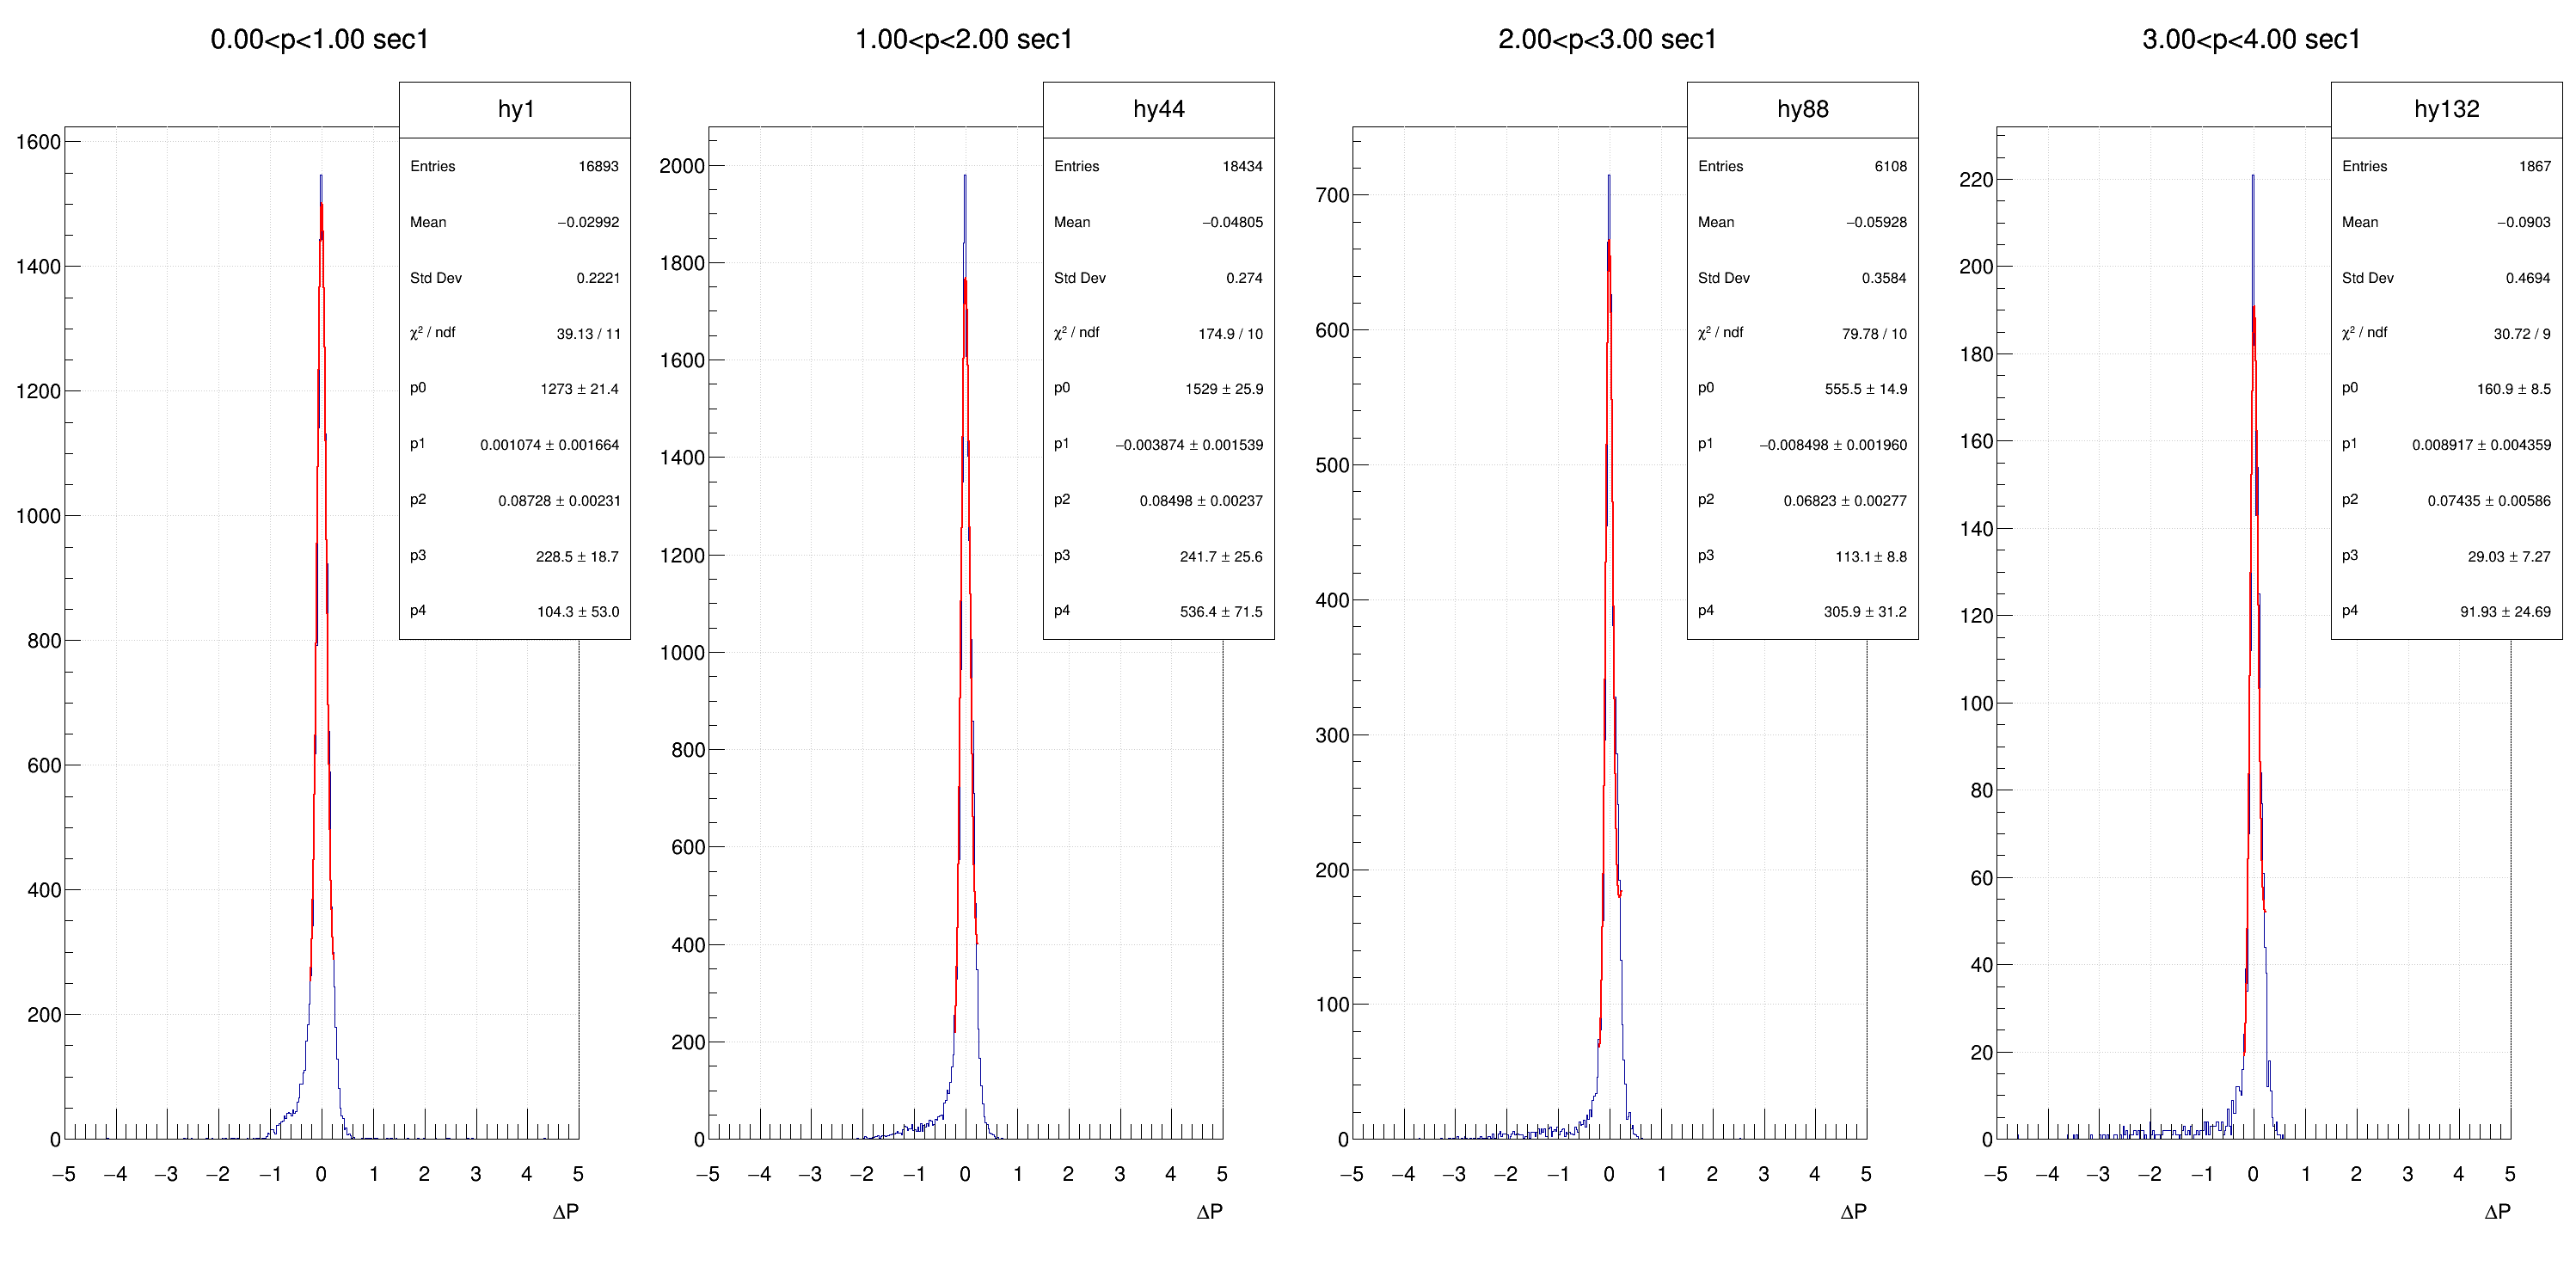

In [9]:
c2 = ROOT.TCanvas("c2","c2",3000,1500)
c2.Divide(4,1,0.0001,0.0001)
c2.Draw()
for i in range(4):
    c2.cd(i+1)
    #dpp11.hys[i].GetXaxis().SetRangeUser(-0.8,1)
    dpp11.hys[i].Draw()
    


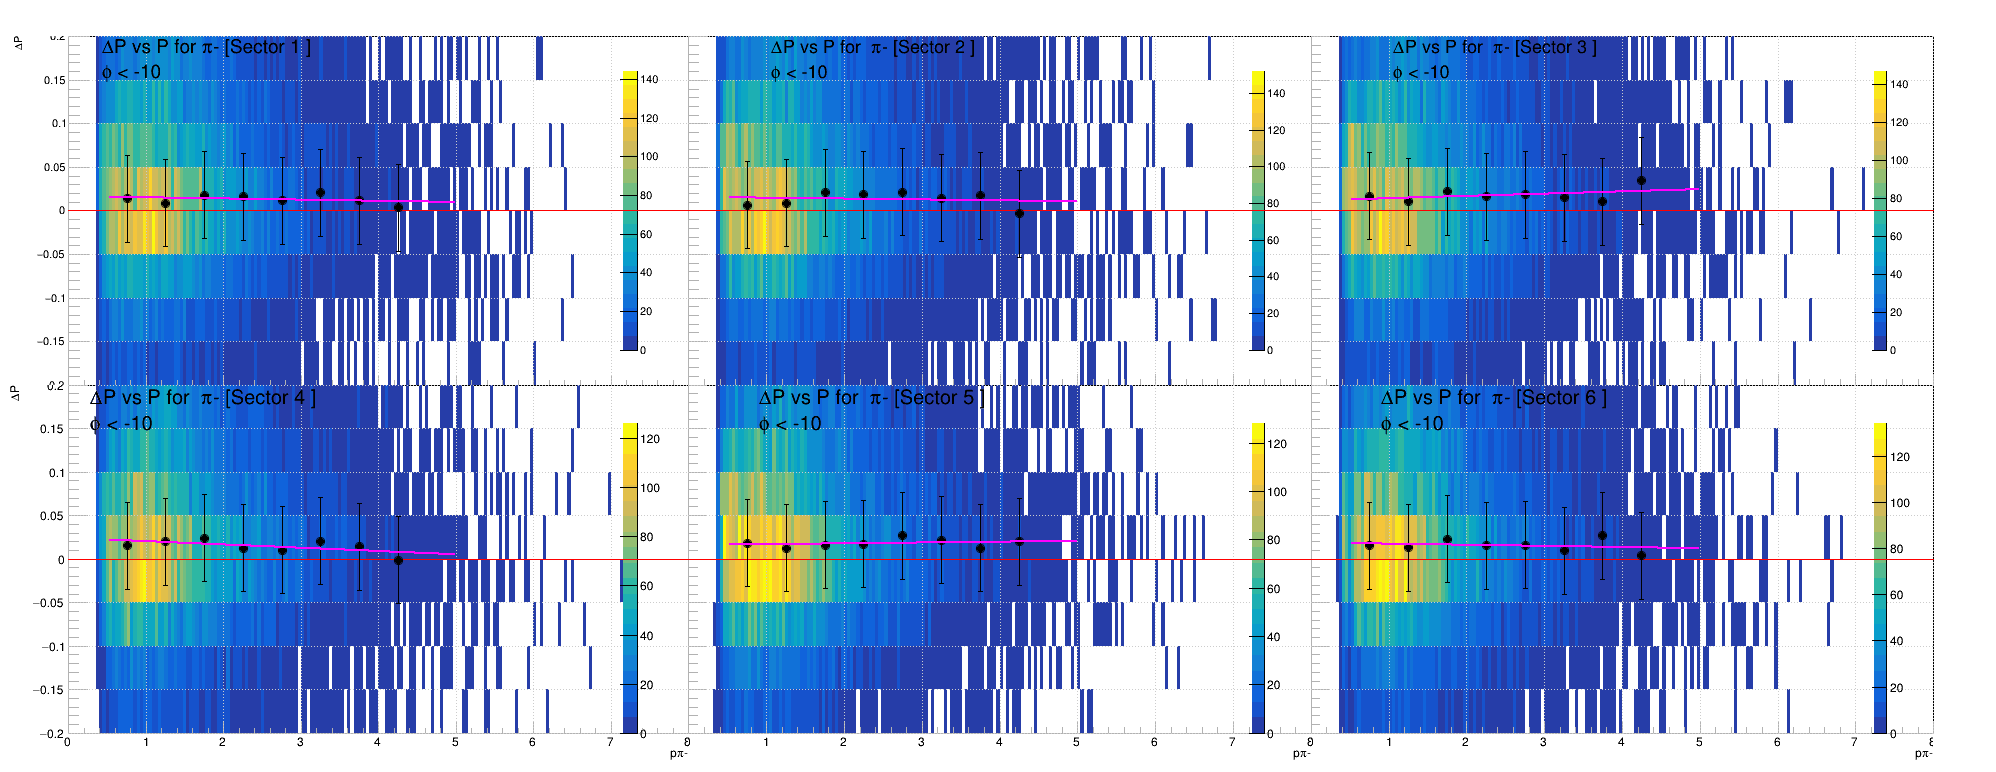

In [28]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
#ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)

ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
c1.Draw()
c1.cd(1)
dpp11.Draw("colz")
dpp11.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp11.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp11.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.cd(2)
dpp21.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp21.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp21.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp21.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp31.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp31.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp31.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp31.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(4)
dpp41.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp41.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp41.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp41.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp51.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp51.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp51.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp51.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(6)
dpp61.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp61.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp61.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp61.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.Print("pics/Cont_phi/phi_dp2d_1.png")

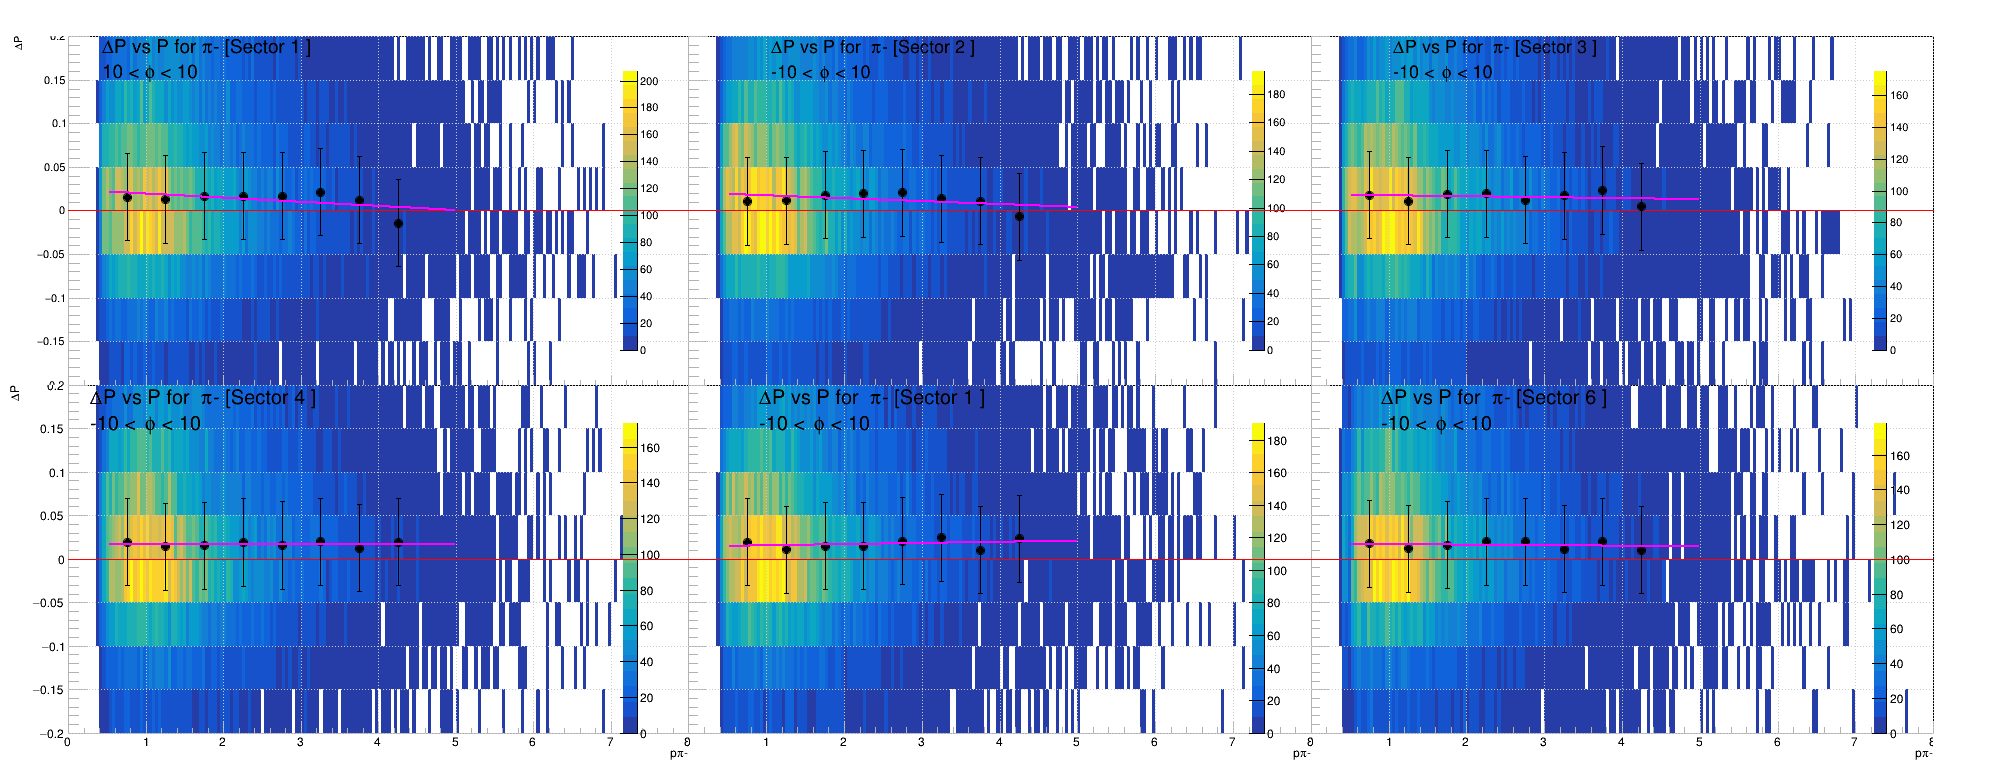

In [29]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)
c1.Draw()
c1.cd(1)
dpp12.Draw("colz")
dpp12.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp12.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp12.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)




c1.cd(2)
dpp22.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp22.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp22.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp22.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp32.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp32.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp32.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp32.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(4)
dpp42.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp42.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp42.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp42.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp52.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp52.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp52.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp52.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(6)
dpp62.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp62.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp62.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp62.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.Print("pics/Cont_phi/phi_dp2d_2.png")


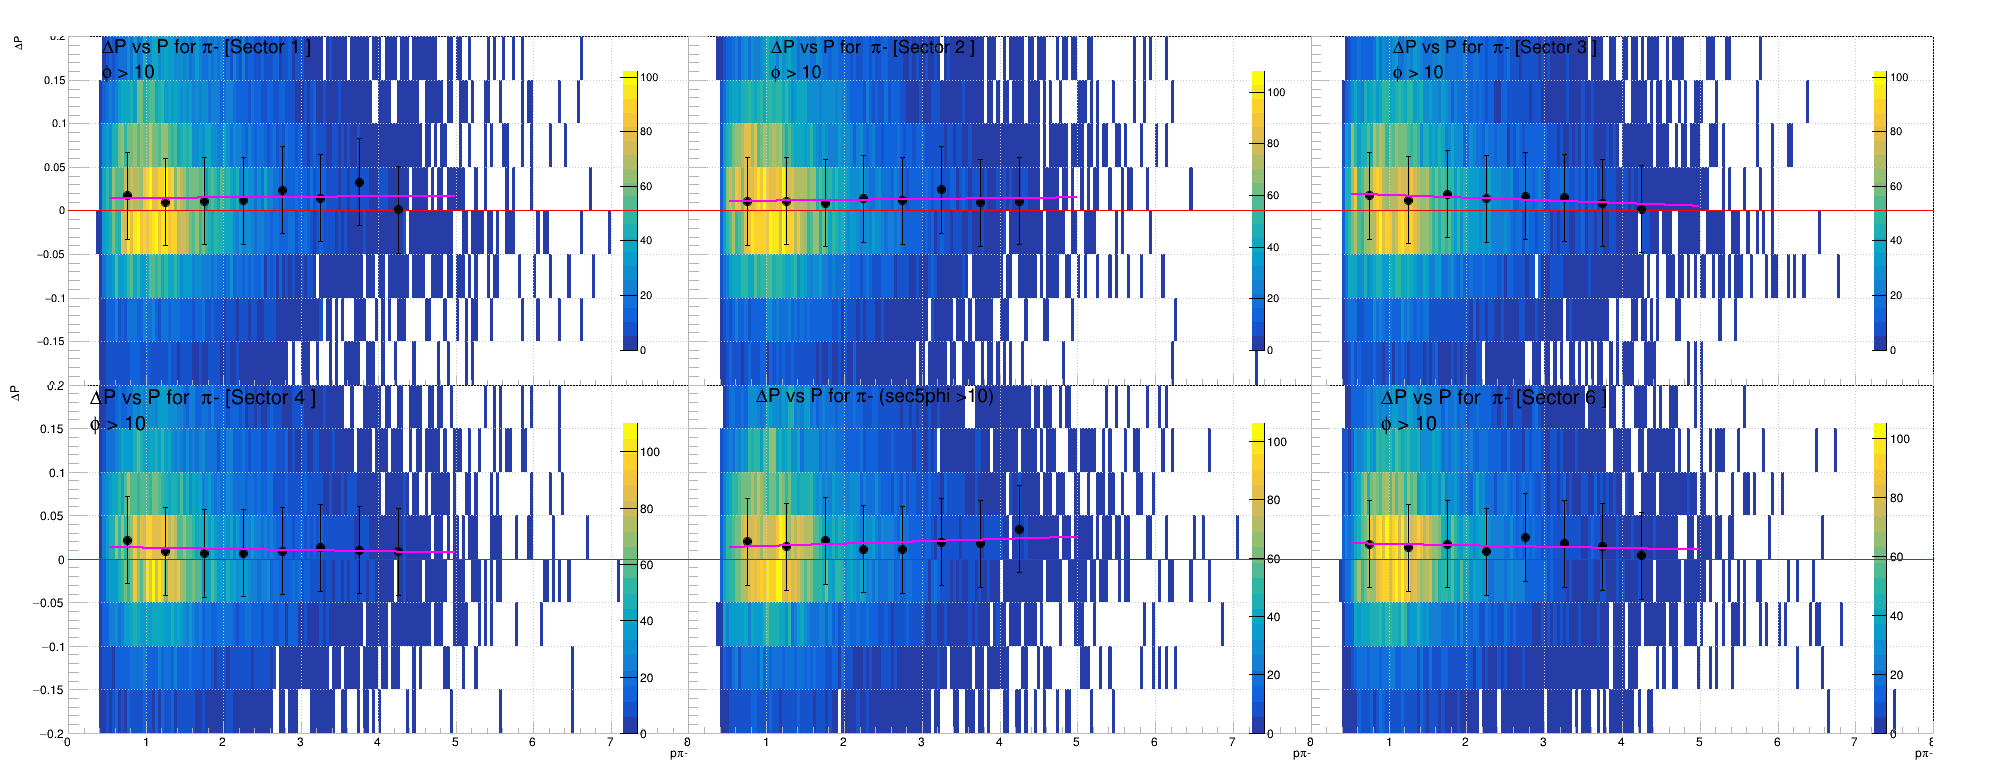

In [30]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)
c1.Draw()
c1.cd(1)
dpp13.Draw("colz")
dpp13.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp13.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp13.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)




c1.cd(2)
dpp23.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp23.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp23.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp23.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp33.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp33.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp33.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp33.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(4)
dpp43.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp43.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp43.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp43.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp53.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp53.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp53.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp53.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(6)
dpp63.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp63.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp63.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp63.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.Print("pics/Cont_phi/phi_dp2d_3.png")

